In [1]:

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

import config


def apply_base_style():
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams.update({
        # Figure
        'figure.figsize': (6, 4),
        'figure.dpi': 300,
        # Font
        'font.size': 11,
        'axes.titlesize': 13,
        'axes.labelsize': 10,
        # Grid
        'grid.color': '#cccccc',
        'grid.alpha': 0.6,
        'grid.linestyle': '--',
        'grid.linewidth': 0.5,
        # Axes
        'axes.edgecolor': 'black',
        'axes.linewidth': 0.8,
        # Ticks
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        # Legend
        'legend.frameon': True,  # turn on the box
        'legend.framealpha': 1.0,  # fully opaque
        'legend.facecolor': 'white',  # white background
        'legend.edgecolor': 'white',  # white border
        'legend.fontsize': 'small',  # shrink text size
        'legend.handlelength': 1.5,  # shorten the legend lines
        'legend.handletextpad': 0.5,  # tighten space between line & label
        'legend.borderaxespad': 0.5,  # padding between legend & axes
    })


In [2]:
def plot_line_chart(x, y_series, labels=None, title='', xlabel='', ylabel='', filename=None, loc='best', xlocator=None,
                    ylocator=None, y_min_zero=False, thousands=False):
    apply_base_style()
    fig, ax = plt.subplots(figsize=(6, 4))

    for idx, y in enumerate(y_series):
        label = labels[idx] if labels else None
        ax.plot(x, y, label=label)

    if xlocator:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
    if ylocator:
        ax.yaxis.set_major_locator(ticker.MultipleLocator(ylocator))

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.margins(x=0, y=0.1)

    if labels:
        ax.legend(loc=loc)
    if thousands:
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis with thousands separator
    if y_min_zero:
        ax.set_ylim(bottom=0)  # Ensure y-axis starts at 0

    plt.tight_layout()

    if filename:
        filename = config.DATA_DIR / 'figures' / filename
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    return fig, ax


In [3]:
def plot_bar_chart(categories, values, title='', xlabel='', ylabel='', filename=None, ylim=None, ):
    apply_base_style()
    fig, ax = plt.subplots(figsize=(6, 4))

    if xlabel.strip().lower() == 'year' or filename in ['current-account-balance.pdf', 'govt-lending-borrowing.pdf']:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    if ylim:
        ax.set_ylim(ylim)
    ax.bar(categories, values)
    if (values < 0).any():
        ax.axhline(0, color='black', linewidth=0.8)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.margins(x=0.05, y=0.1)  # Small margin on x for clarity

    plt.tight_layout()

    if filename:
        filename = config.DATA_DIR / 'figures' / filename
        plt.savefig(filename, format='PDF', dpi=300, bbox_inches='tight')

    return fig, ax


In [4]:
def plot_bar_and_line_chart(
        x,
        bar_values,
        line_values=None,
        bar_label='Bar Series',
        line_label='Line Series',
        title='',
        xlabel='',
        ylabel='',
        filename=None,
        ylim=None,
        loc='best'
):
    apply_base_style()
    fig, ax = plt.subplots(figsize=(6, 4))

    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    bar_col, line_col = colors[0], colors[1]

    # X-axis formatting for years
    if xlabel.strip().lower() == 'year':
        ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

    # Optional Y limits
    if ylim:
        ax.set_ylim(ylim)

    # Bar plot
    ax.bar(x, bar_values, label=bar_label, color=line_col)

    # Zero line if any negative values
    has_negative = (bar_values < 0).any()
    if line_values is not None:
        has_negative = has_negative or (line_values < 0).any()
    if has_negative:
        ax.axhline(0, color='black', linewidth=0.8)

    # Single line plot
    if line_values is not None:
        ax.plot(x, line_values, label=line_label, color='black', marker='.')

    # Labels and legend
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.margins(x=0.05, y=0.1)
    ax.legend(loc=loc)

    plt.tight_layout()

    # Save if requested
    if filename:
        filename = config.DATA_DIR / 'figures' / filename
        fig.savefig(filename, format='pdf', dpi=300, bbox_inches='tight')

    return fig, ax

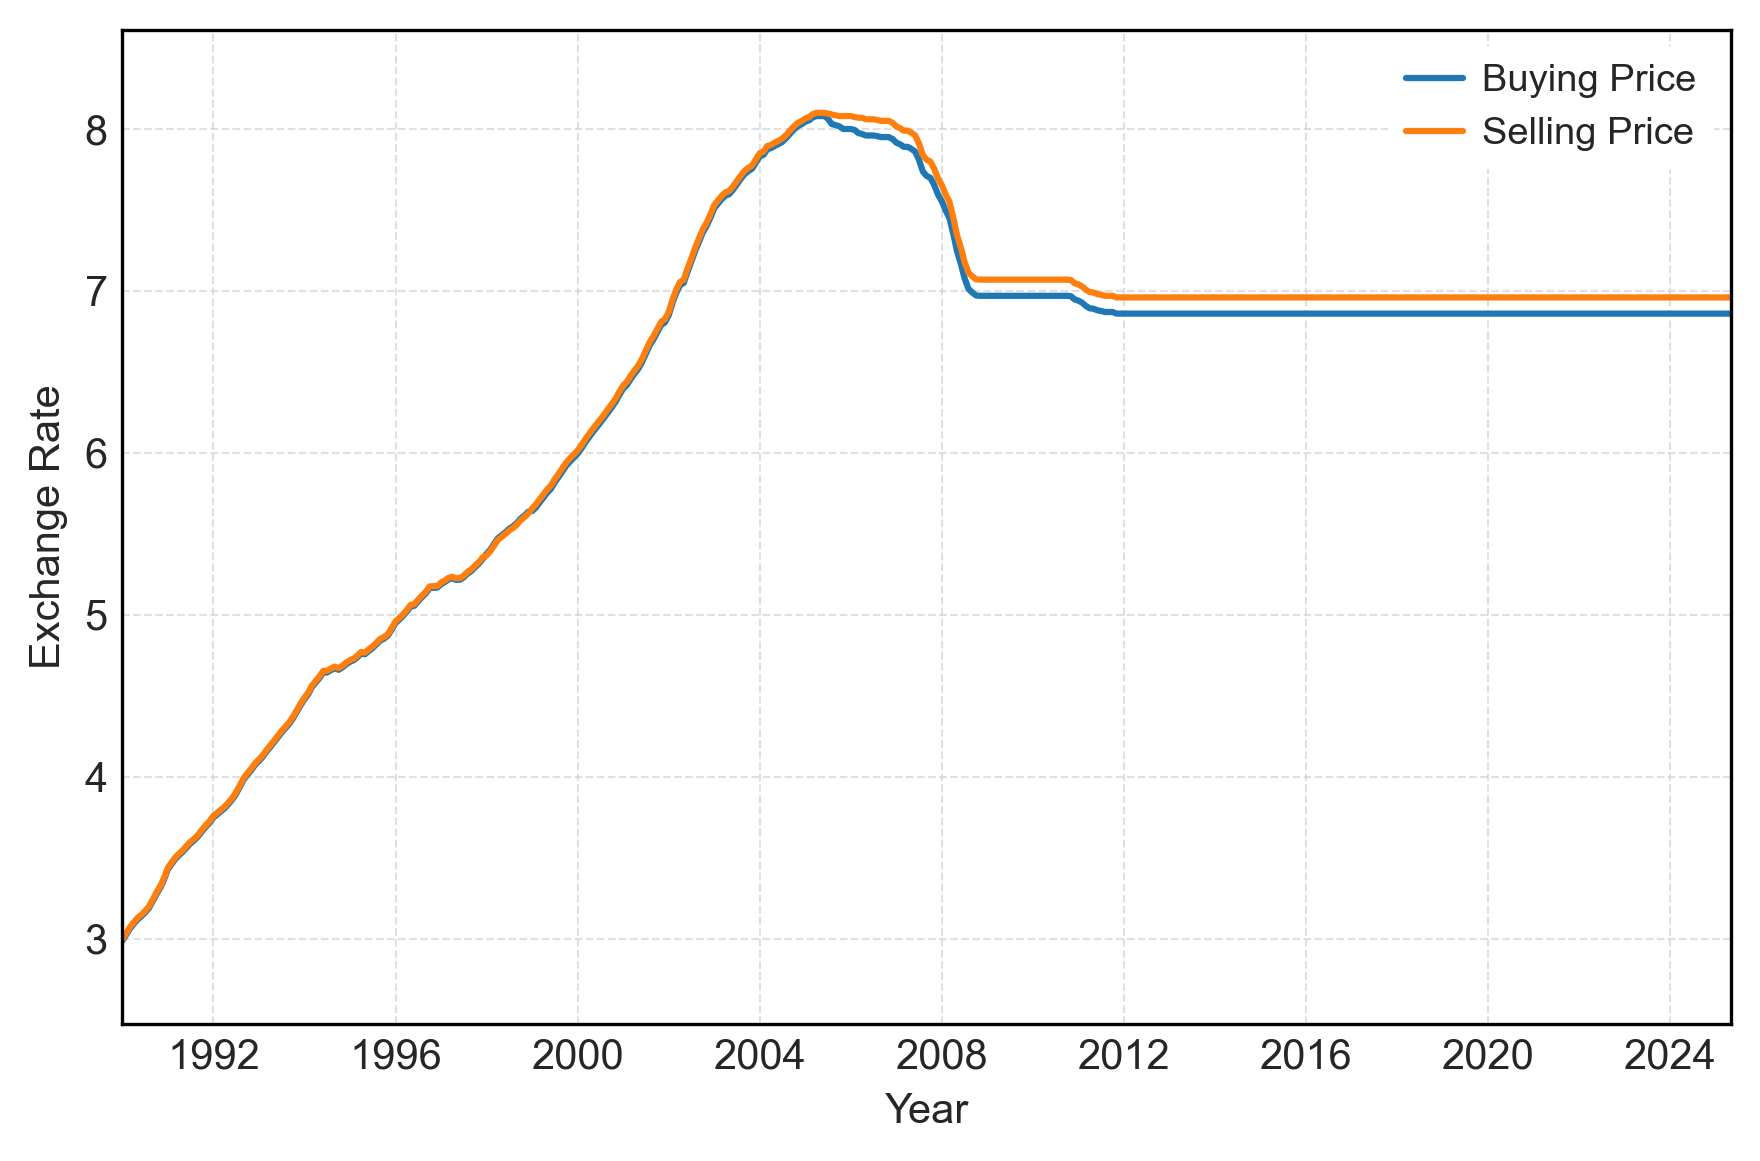

In [5]:
# FIGURE 1.1
file = config.DATA_DIR / 'various_thesis_data/official_exchange_rate_history.csv'
df = pd.read_csv(file)

df['Year'] = df['AÑO'].str.replace(',', '').astype(int)
month_map = {
    'ENE': 1, 'FEB': 2, 'MAR': 3, 'ABR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AGO': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DIC': 12
}
df['Month'] = df['MES'].map(month_map)
# Create a datetime column (first day of each month)
df['Date'] = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=1))
# Sort by date
df = df.sort_values('Date')

fig, ax = plot_line_chart(x=df['Date'], y_series=[df['COMPRA'], df['VENTA']], labels=['Buying Price', 'Selling Price'],
                          xlabel='Year', ylabel='Exchange Rate', filename='bob-price-history.pdf')

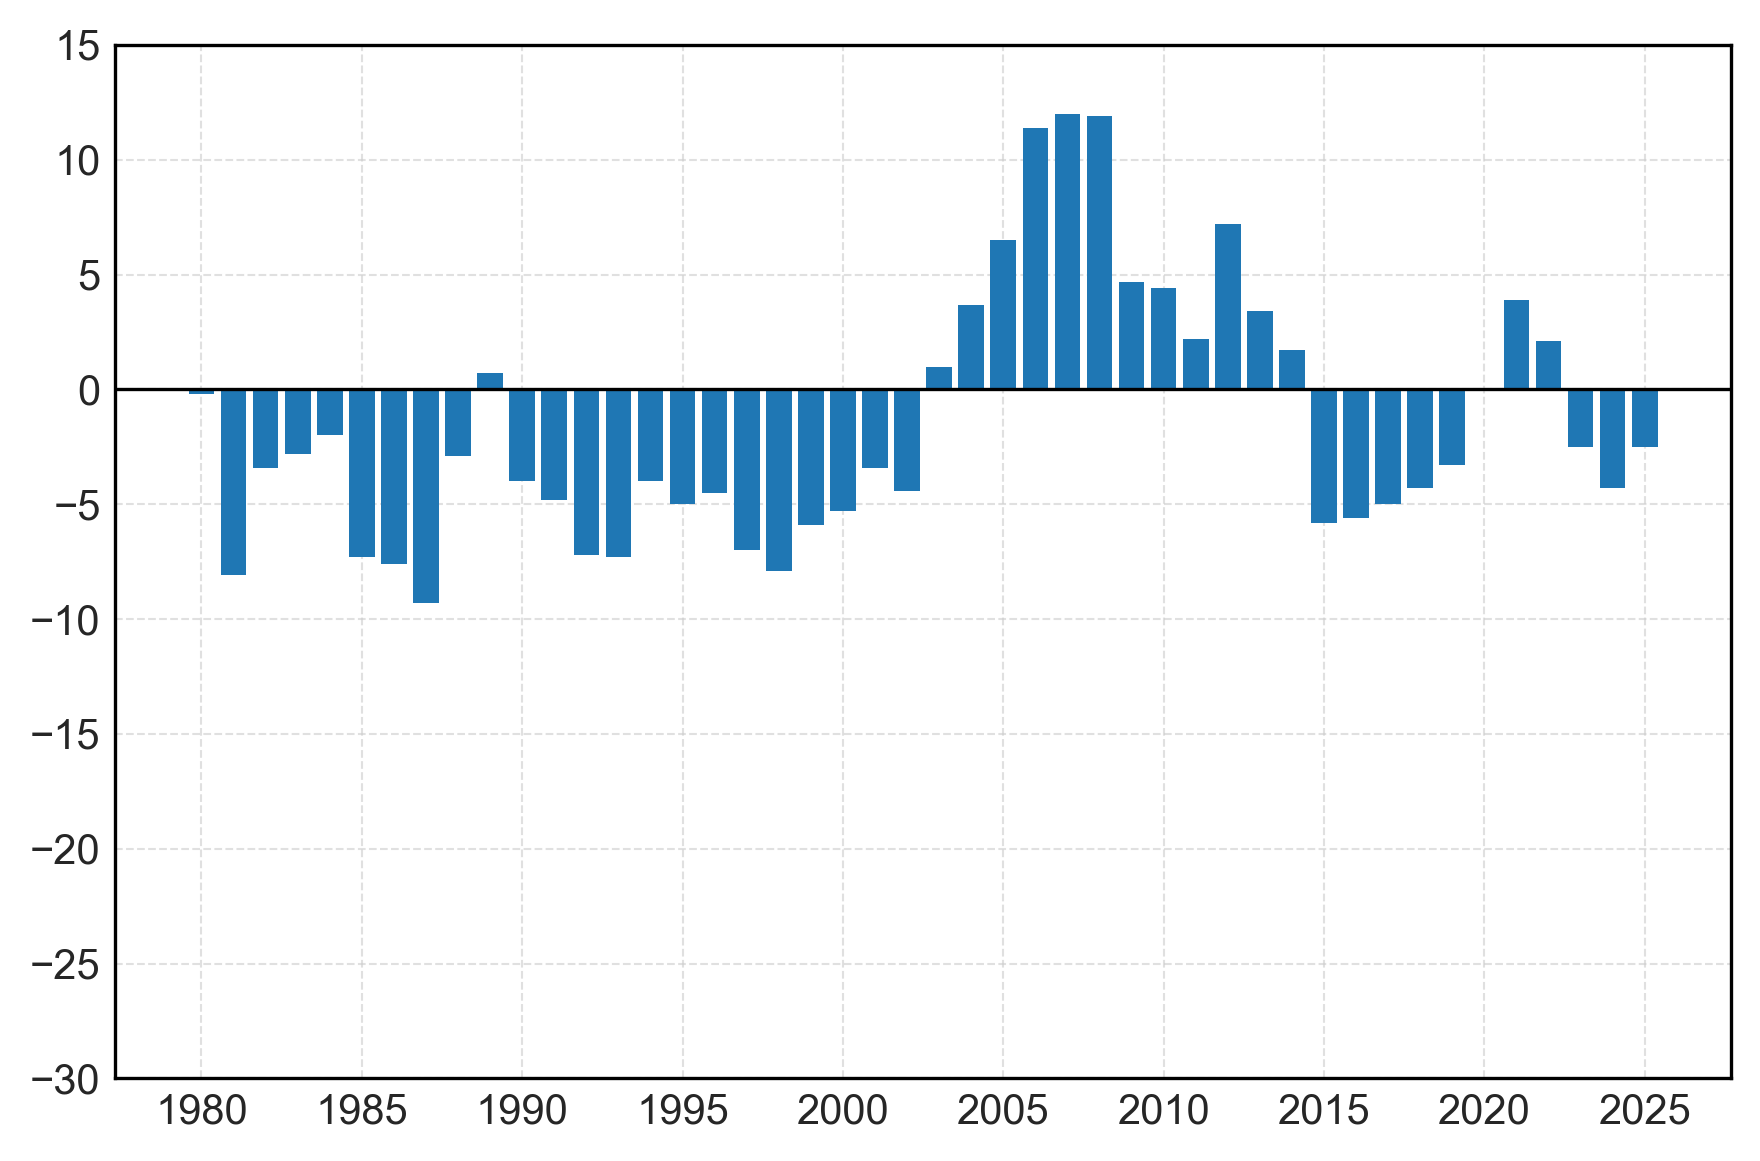

In [6]:
# FIGURE 1.2 (a)
file = config.DATA_DIR / 'various_thesis_data/current_account_balance.csv'
df = pd.read_csv(file, delimiter='\t', header=None, names=['Year', 'Balance'])
df['Year'] = df['Year'].astype(int)

fig, ax = plot_bar_chart(categories=df['Year'], values=df['Balance'],
                         filename='current-account-balance.pdf', ylim=(-30, 15))

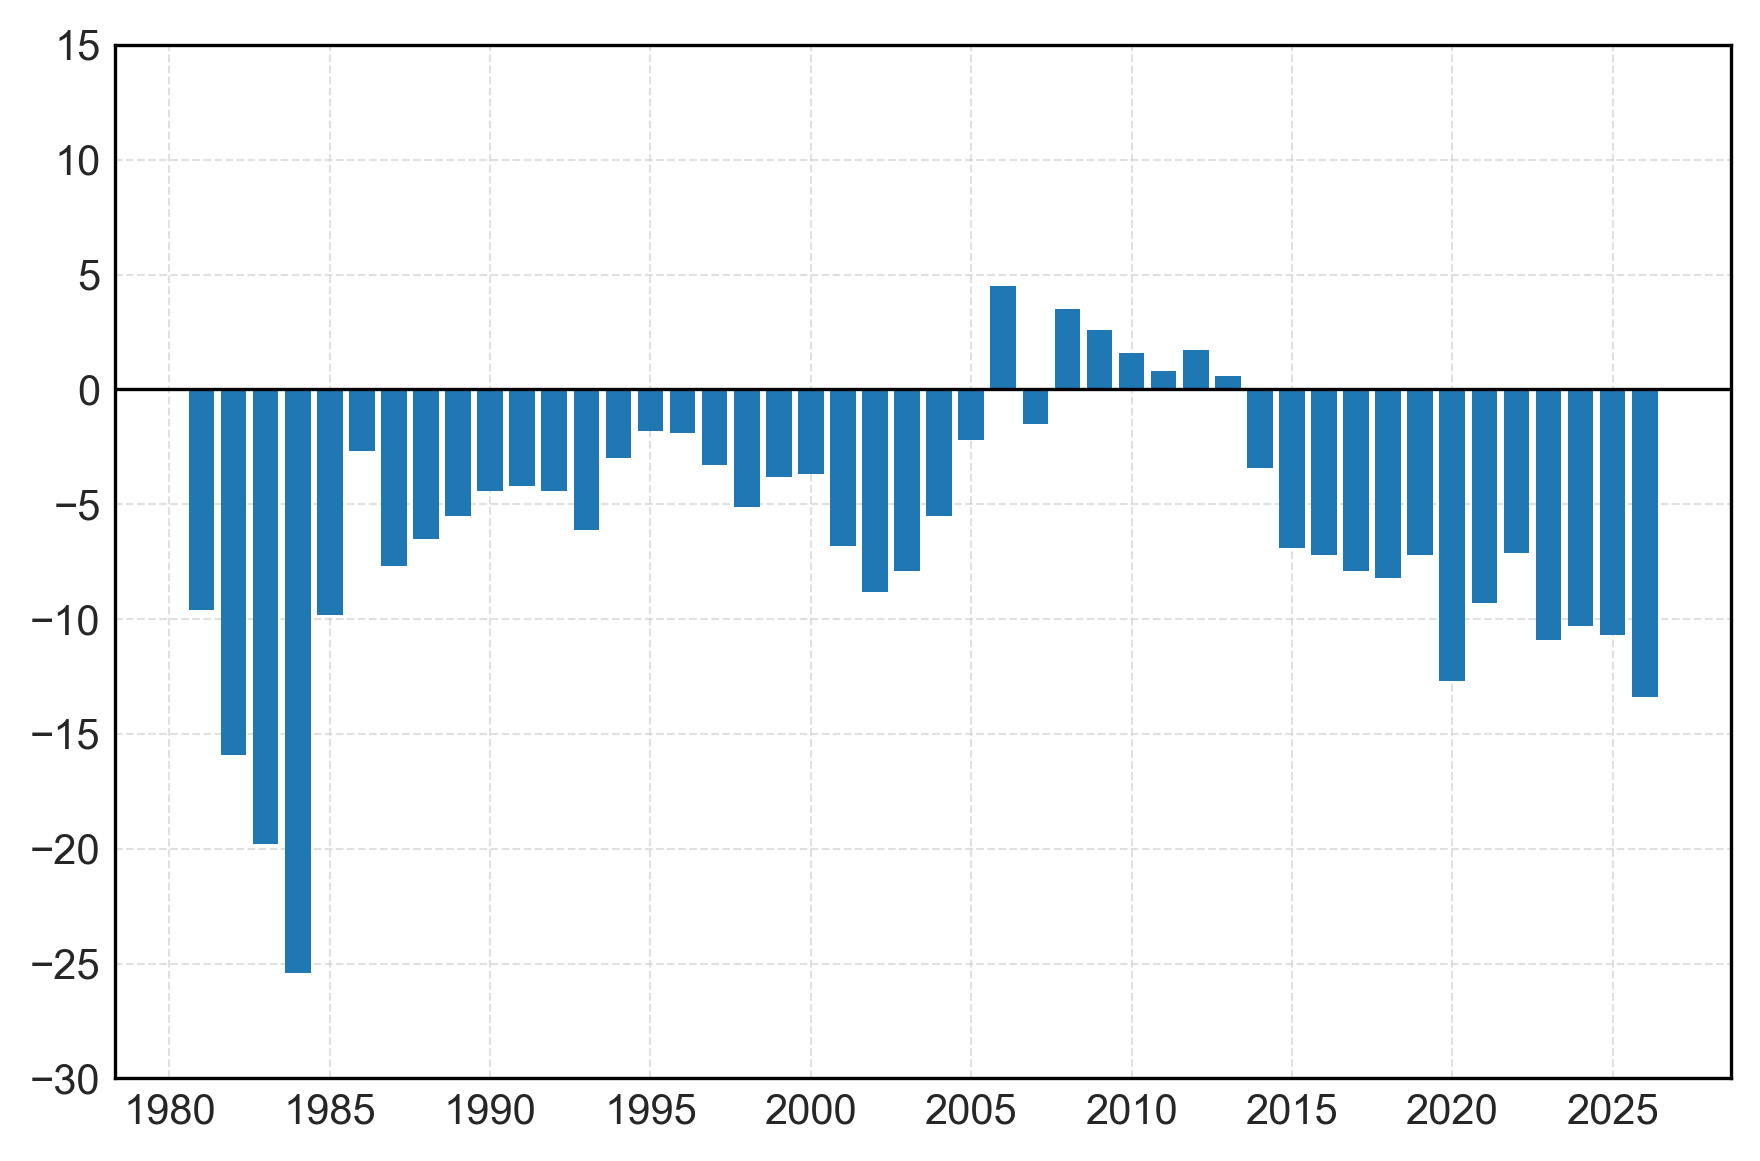

In [7]:
# FIGURE 1.2 (b)
file = config.DATA_DIR / 'various_thesis_data/govt_lending_borrowing.csv'
df = pd.read_csv(file, delimiter='\t', header=None, names=['Year', 'Net Lending/Borrowing'])
df['Year'] = df['Year'].astype(int)

fig, ax = plot_bar_chart(categories=df['Year'], values=df['Net Lending/Borrowing'],
                         filename='govt-lending-borrowing.pdf', ylim=(-30, 15))

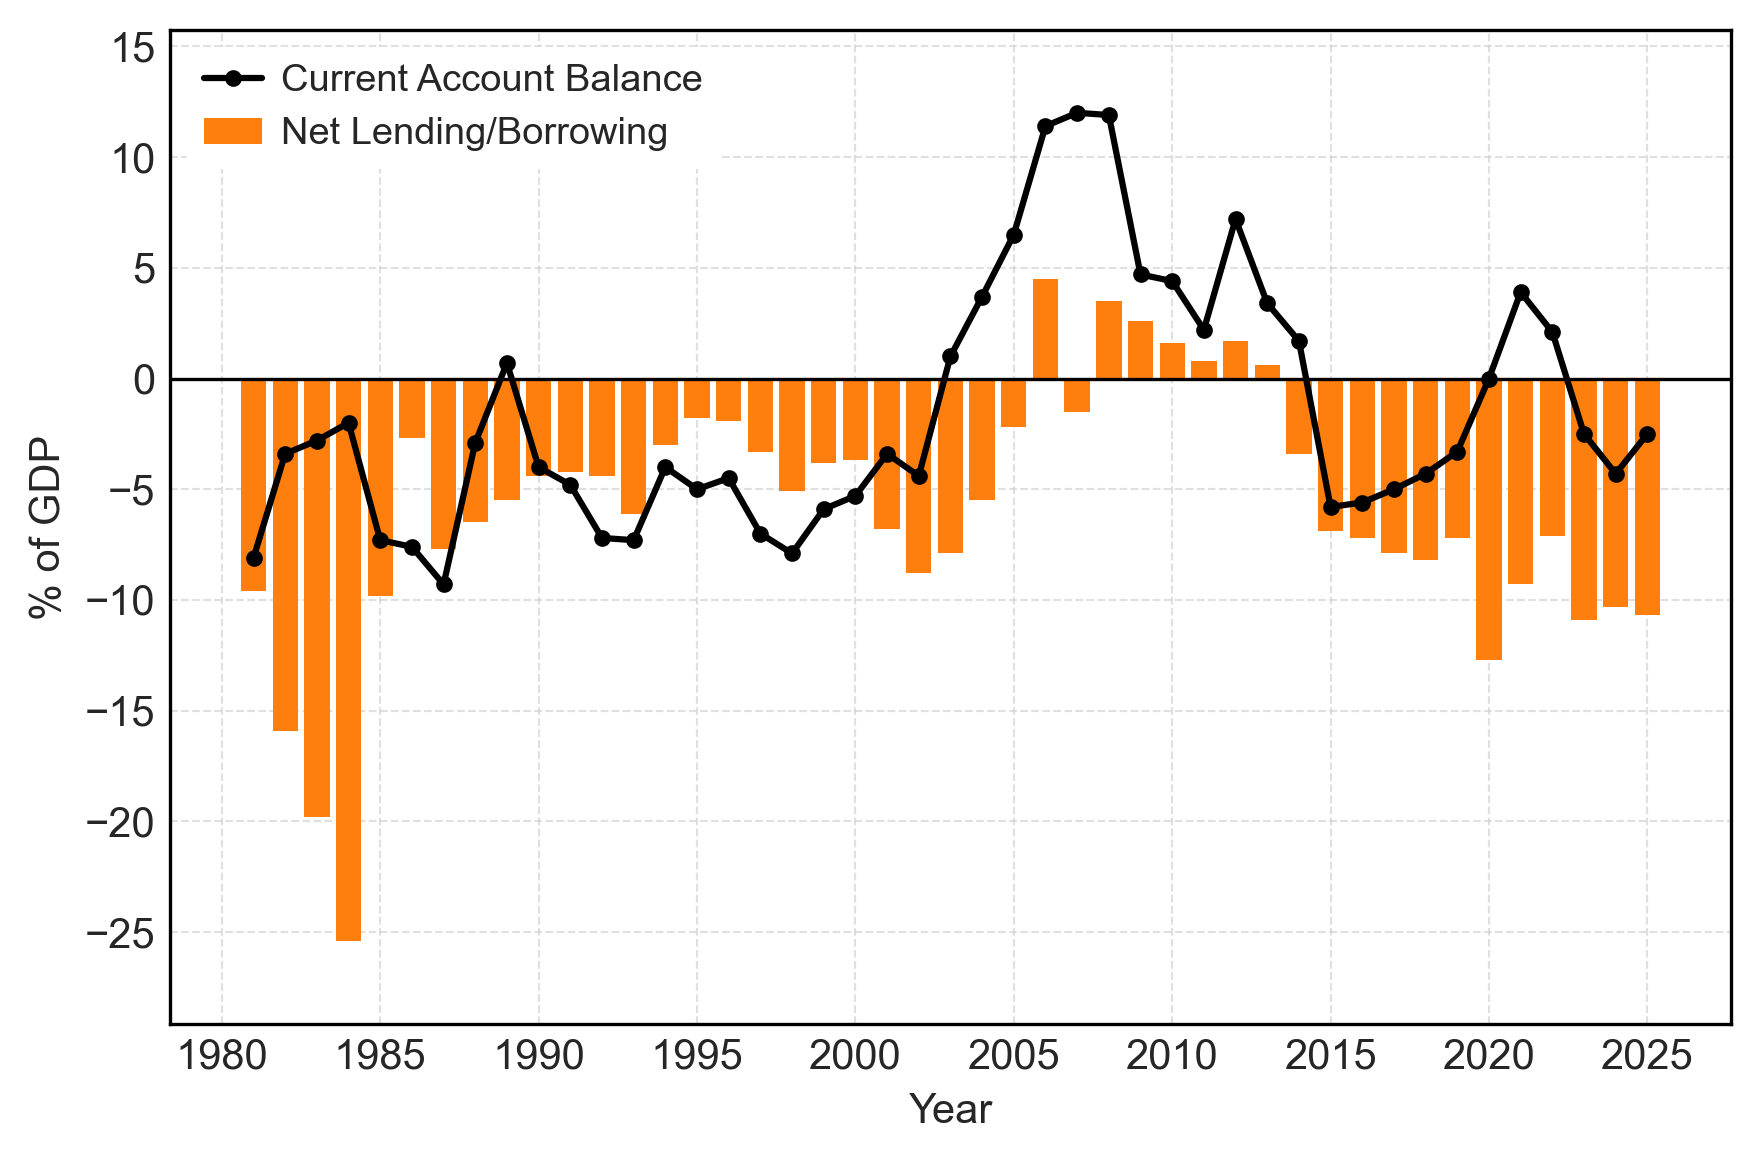

In [8]:
# FIGURE 1.3
file = config.DATA_DIR / 'various_thesis_data/twin_deficits.csv'
df = pd.read_csv(file, delimiter='\t', header=None, names=['Year', 'Net Lending/Borrowing', 'Current Account Balance'])
df['Year'] = df['Year'].astype(int)

fig, ax = plot_bar_and_line_chart(
    x=df['Year'],
    bar_values=df['Net Lending/Borrowing'],
    line_values=df['Current Account Balance'],
    bar_label='Net Lending/Borrowing',
    line_label='Current Account Balance',
    xlabel='Year', ylabel='% of GDP',
    filename='twin-deficits.pdf', loc='upper left'
)

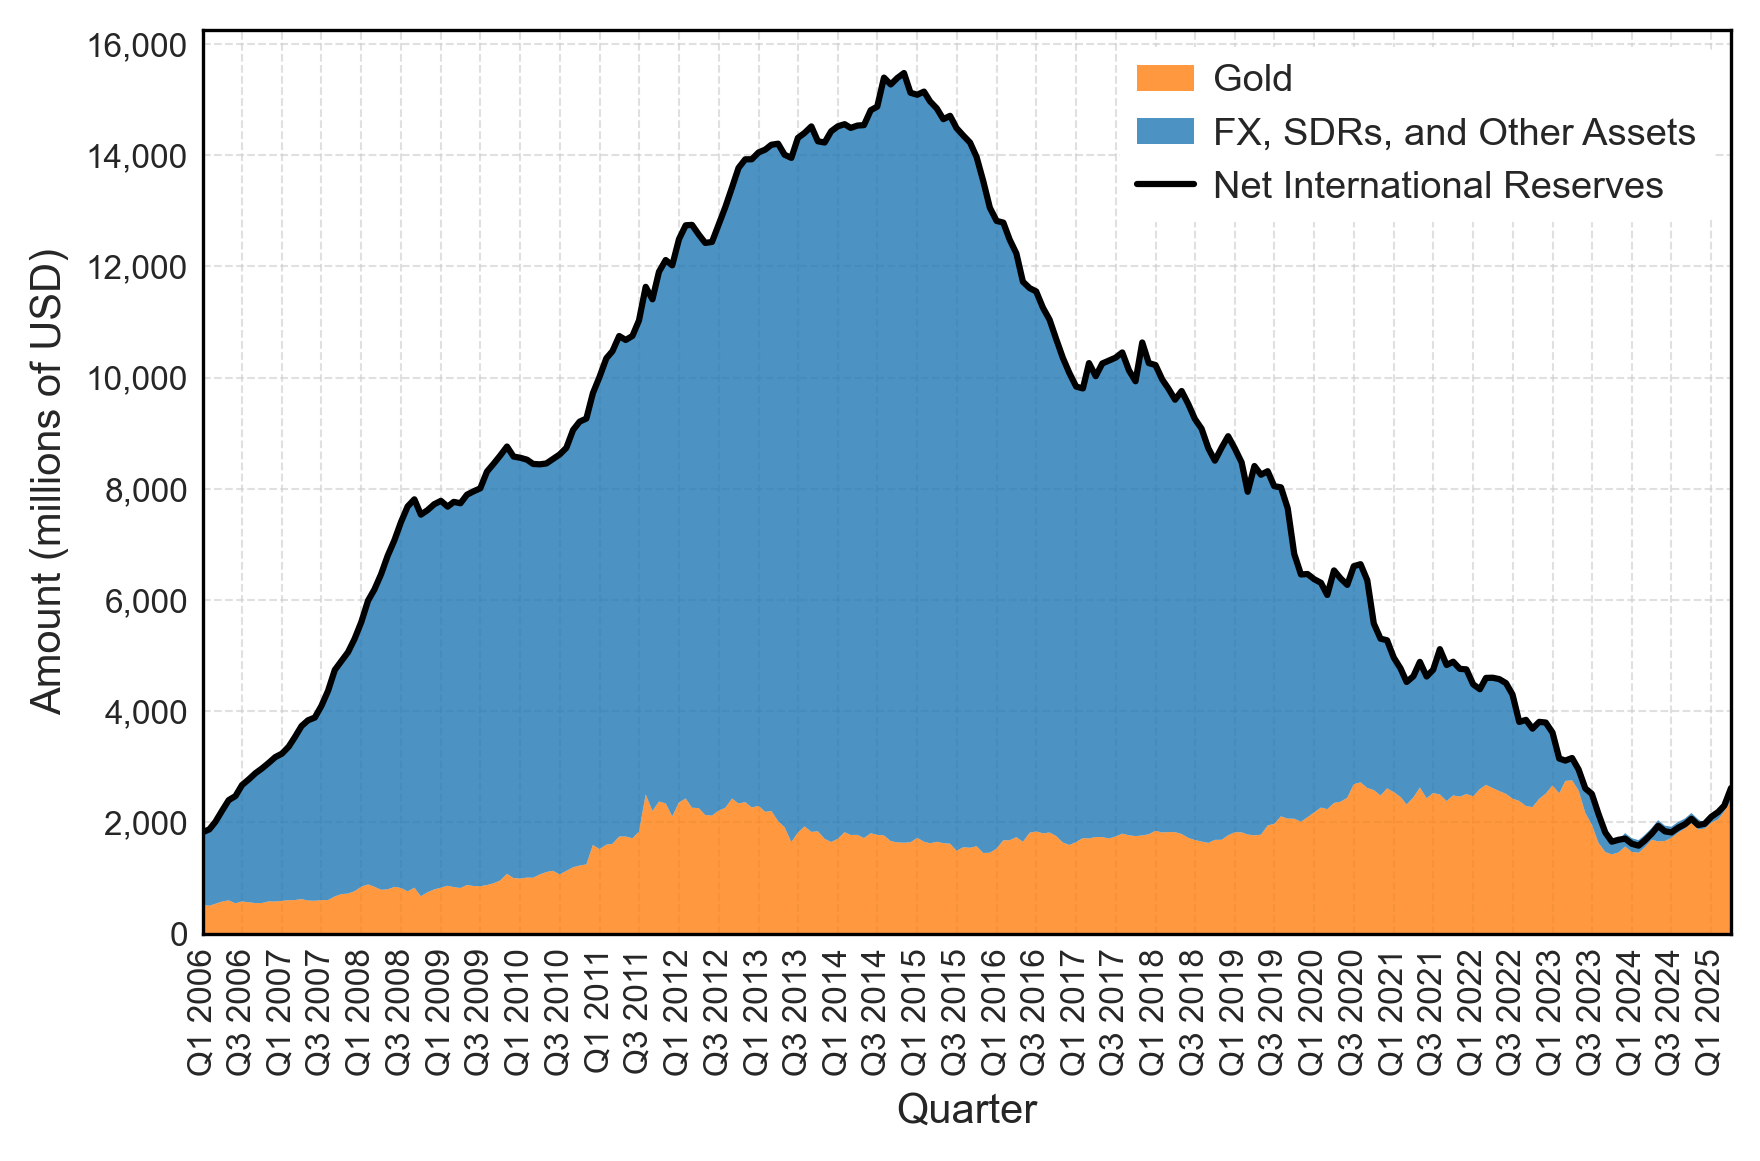

In [9]:
file = config.DATA_DIR / 'various_thesis_data/international_reserves.csv'
reserves_df = pd.read_csv(file, delimiter='\t', header=None, names=['date', 'nir', 'gold', 'currency'])
reserves_df['gold'] = pd.to_numeric(reserves_df['gold'].str.replace(',', ''), errors='coerce')
reserves_df['currency'] = pd.to_numeric(reserves_df['currency'].str.replace(',', ''), errors='coerce')
reserves_df['nir'] = pd.to_numeric(reserves_df['nir'].str.replace(',', ''), errors='coerce')

# 1) parse your "ENE 2022" style into real Timestamps
month_map = {
    'ENE': 1, 'FEB': 2, 'MAR': 3, 'ABR': 4,
    'MAY': 5, 'JUN': 6, 'JUL': 7, 'AGO': 8,
    'SEP': 9, 'OCT': 10, 'NOV': 11, 'DIC': 12
}
reserves_df[['month', 'year']] = reserves_df['date'].str.split(expand=True)
reserves_df['date_dt'] = pd.to_datetime(
    reserves_df['year'].astype(int).astype(str) + '-' +
    reserves_df['month'].map(month_map).astype(str) + '-01'
)
# 2) plot
apply_base_style()
fig, ax = plt.subplots(figsize=(6, 4))

# stacked area: gold then currency
ax.stackplot(
    reserves_df['date_dt'],
    reserves_df['gold'],
    reserves_df['currency'],
    labels=['Gold', 'FX, SDRs, and Other Assets'],
    colors=['tab:orange', 'tab:blue'],
    alpha=0.8
)
# NIR line on top
ax.plot(
    reserves_df['date_dt'],
    reserves_df['nir'],
    color='black',
    linewidth=1.5,
    label='Net International Reserves'
)

# 3) quarterly x‐ticks (only Q1 & Q3, labels vertical)
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

# Tick at Jan (Q1) and Jul (Q3) of each year
quarter_locator = mdates.MonthLocator(bymonth=[1, 7])
ax.xaxis.set_major_locator(quarter_locator)


# Formatter: month → quarter label
def quarter_formatter(x, pos):
    dt = mdates.num2date(x)
    q = (dt.month - 1) // 3 + 1
    return f"Q{q} {dt.year}"


ax.xaxis.set_major_formatter(FuncFormatter(quarter_formatter))

# Rotate labels 90°
plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
ax.tick_params(labelsize=8)

# 4) y-axis formatting
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 5) labels, legend, margins
ax.set_xlabel('Quarter')
ax.set_ylabel('Amount (millions of USD)')
ax.margins(x=0, y=0.05)
ax.legend(
    loc='upper right',  # inside top-right of the axes
    fontsize='small',  # shrink text size
    handlelength=1.5,  # shorten the legend lines
    handletextpad=0.5,  # tighten space between line and label
    borderaxespad=0.5,  # padding between legend and axes
    frameon=True,  # turn on the legend box
    framealpha=1.0,  # fully opaque
    facecolor='white',  # white background
    edgecolor='white'  # black border
)

plt.tight_layout()

# 6) save
out_path = config.DATA_DIR / 'figures' / 'reserves_composition_nir.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')

plt.show()

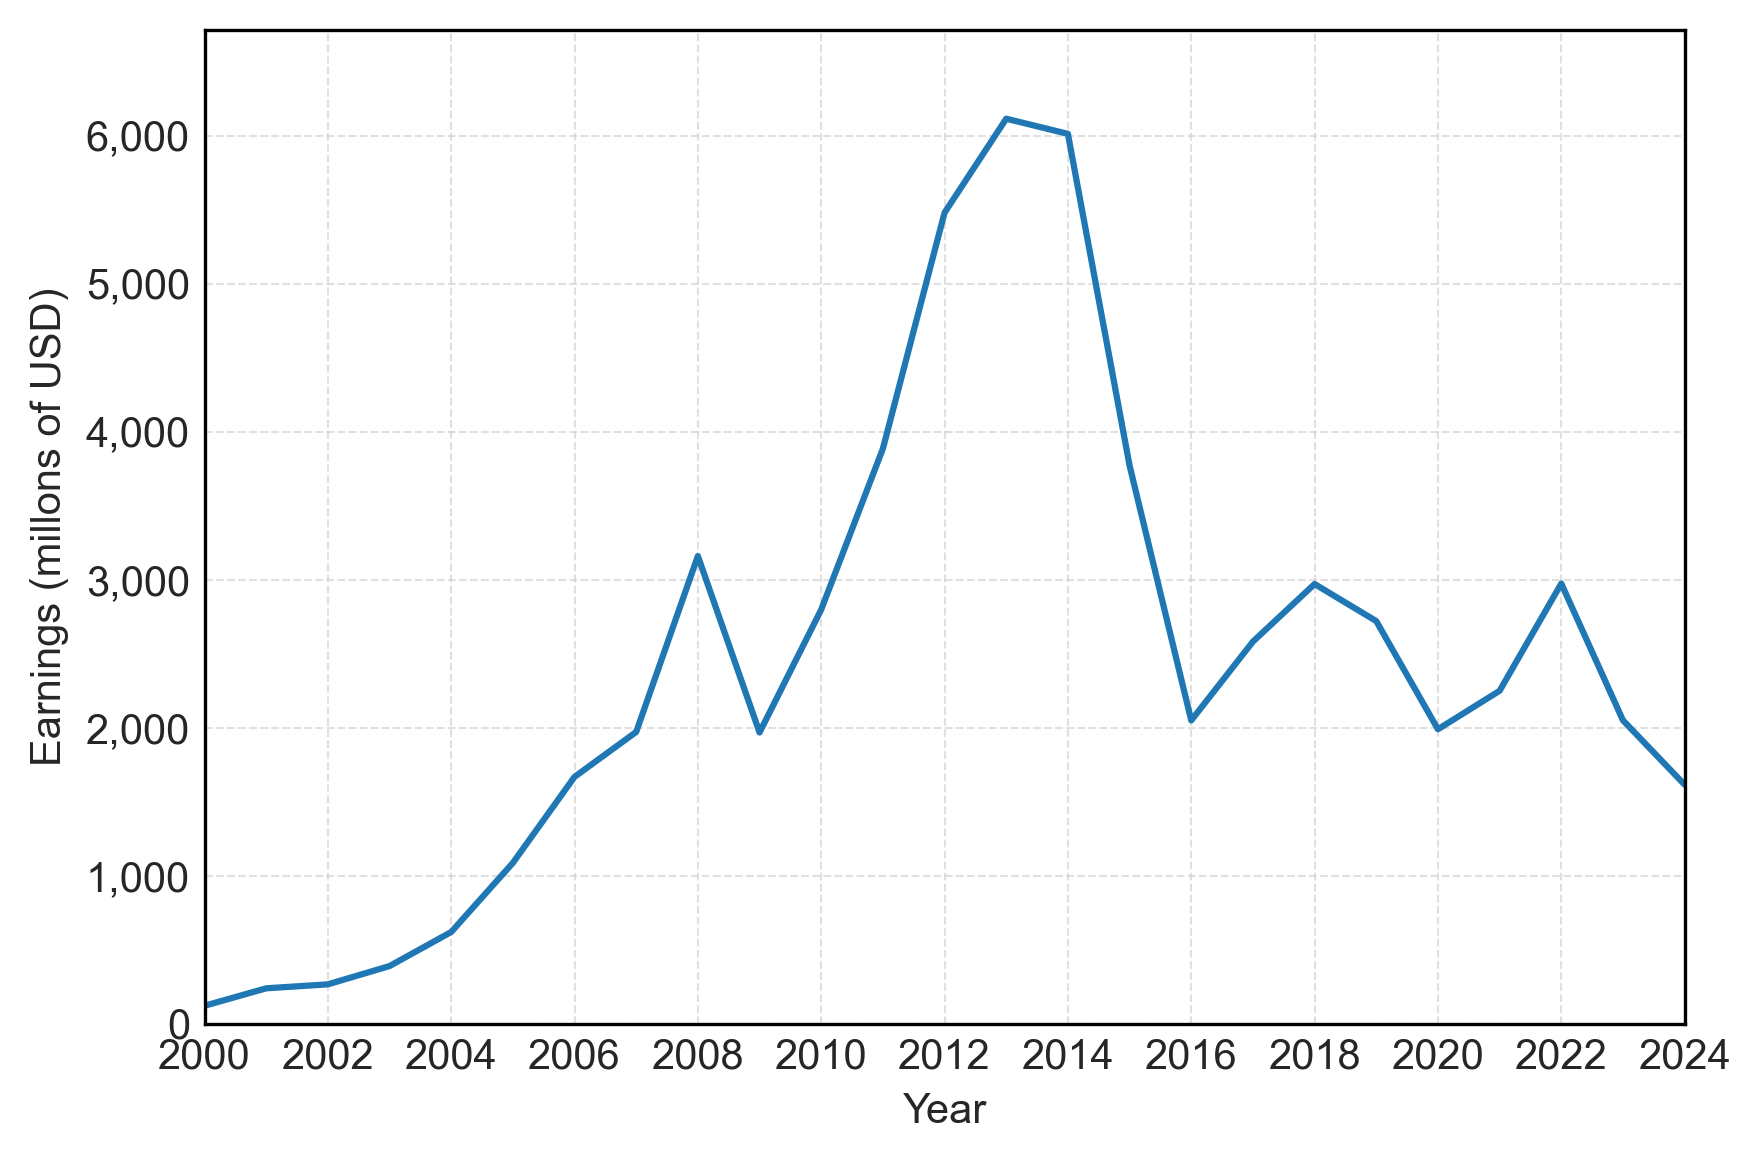

In [10]:
file = config.DATA_DIR / 'various_thesis_data/gas_export_earnings.csv'
df = pd.read_csv(file, delimiter='\t', header=None, names=['Year', 'Earnings'])
# df['Earnings'] = pd.to_numeric(df['Earnings'].str.replace(',', ''), errors='coerce')
df['Year'] = df['Year'].astype(int)
fig, ax = plot_line_chart(x=df['Year'], y_series=[df['Earnings']],
                          xlabel='Year', ylabel='Earnings (millons of USD)',
                          filename='gas-export-earnings.pdf', xlocator=2, y_min_zero=True, thousands=True)

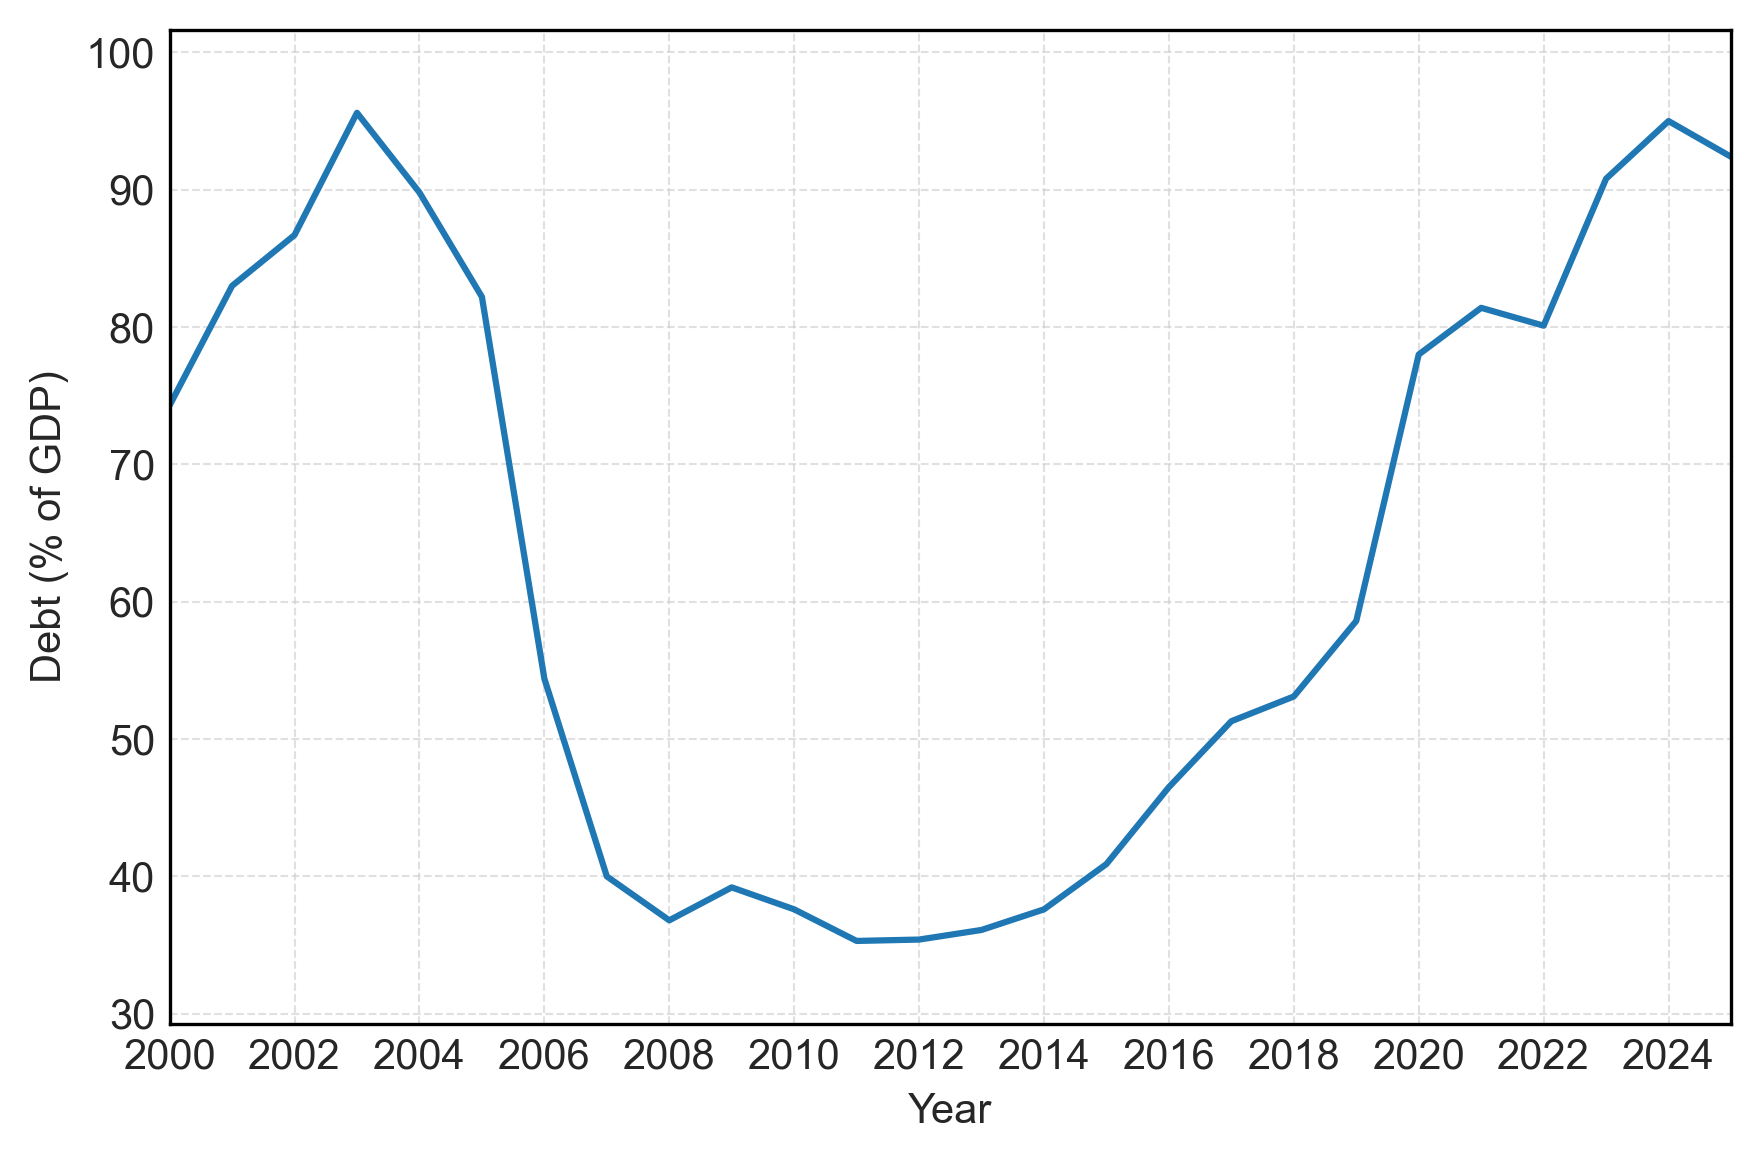

In [11]:
file = config.DATA_DIR / 'various_thesis_data/govt_gross_debt.csv'
df = pd.read_csv(file, delimiter='\t', header=None, names=['Year', 'Gross Debt'])
df['Year'] = df['Year'].astype(int)
fig, ax = plot_line_chart(x=df['Year'], y_series=[df['Gross Debt']],
                          xlabel='Year', ylabel='Debt (% of GDP)',
                          filename='govt-gross-debt.pdf', xlocator=2)

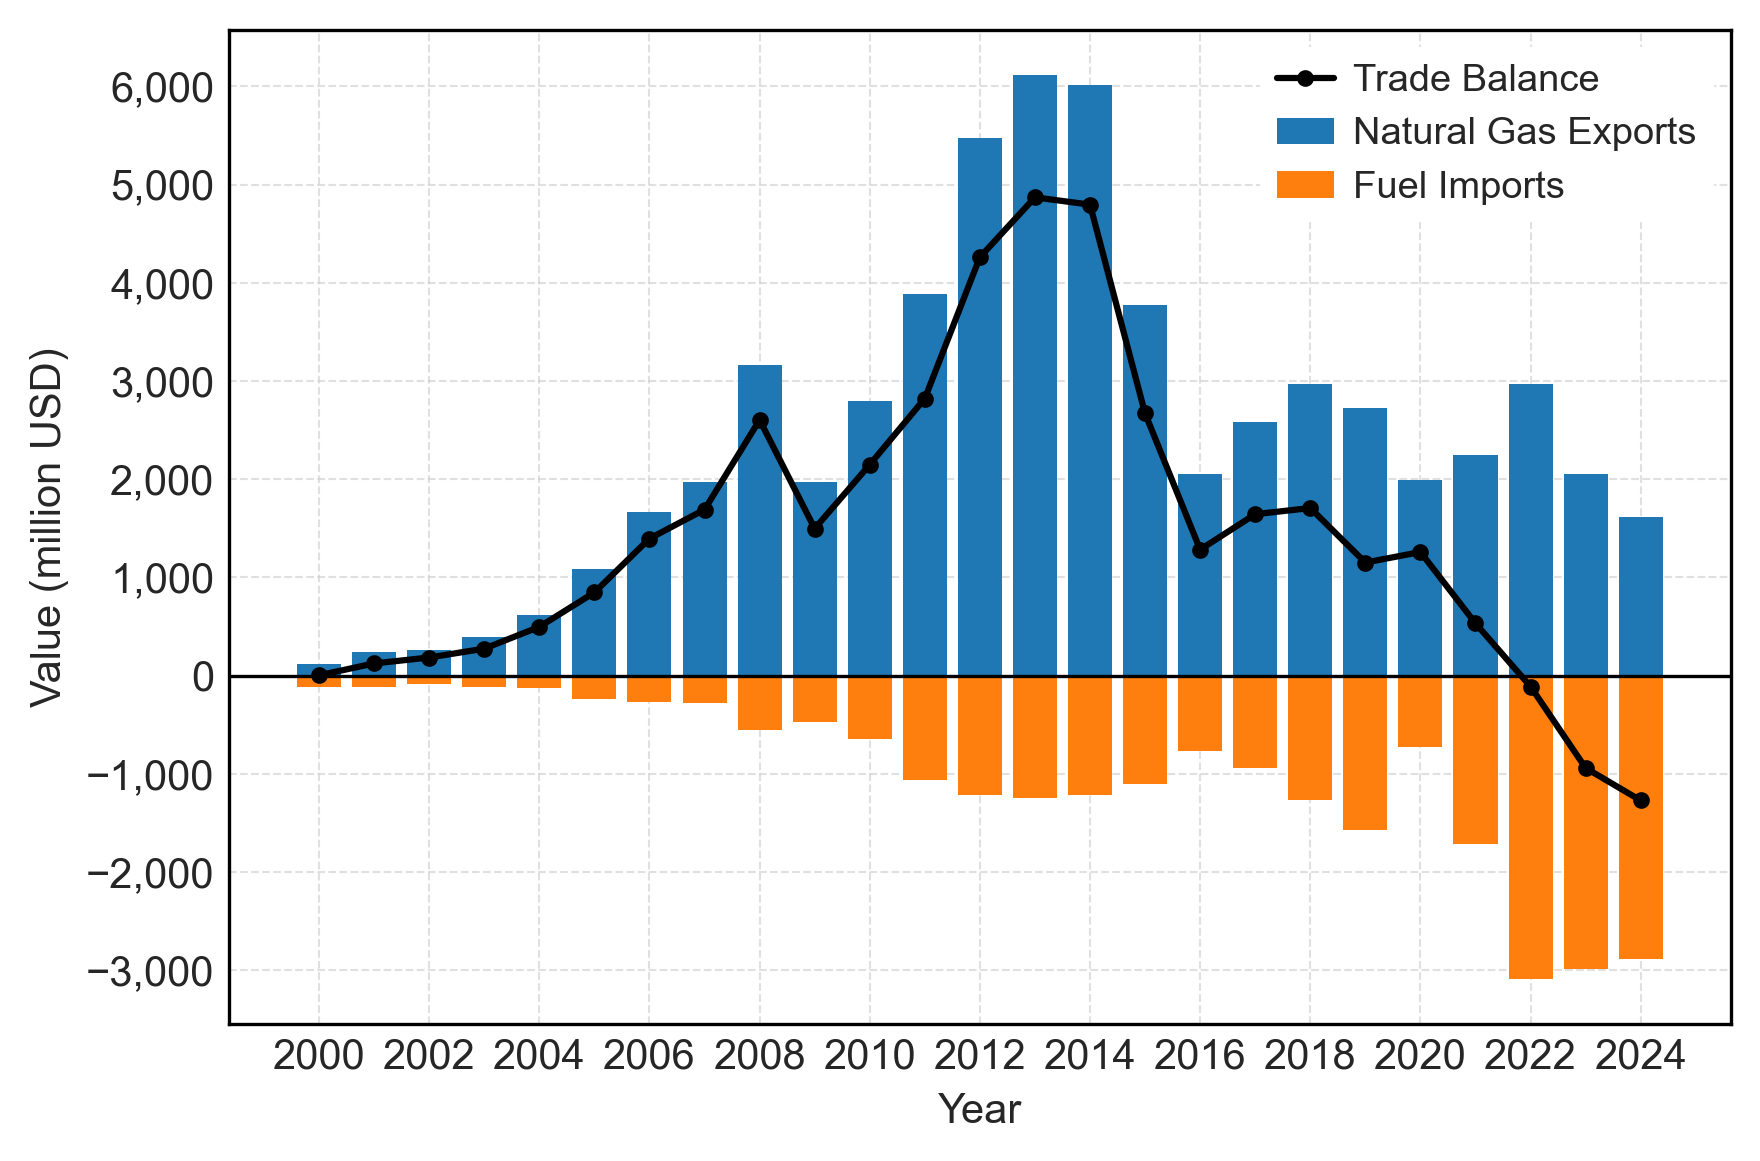

In [12]:
file = config.DATA_DIR / 'various_thesis_data/fuel_trade_balance.csv'
df = pd.read_csv(file, delimiter='\t', header=None, names=['Year', 'Natural Gas Export', 'Fuel Imports'])
df['Natural Gas Export'] = pd.to_numeric(df['Natural Gas Export'].str.replace(',', ''), errors='coerce')
df['Fuel Imports'] = pd.to_numeric(df['Fuel Imports'].str.replace(',', ''), errors='coerce')
df['Fuel Imports'] = df['Fuel Imports'] * -1
df['Trade Balance'] = df['Natural Gas Export'] + df['Fuel Imports']
df['Year'] = df['Year'].astype(int)

apply_base_style()

fig, ax = plt.subplots(figsize=(6, 4))

x = df['Year']
exports = df['Natural Gas Export']
imports = df['Fuel Imports']
balance = df['Trade Balance']

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
exp_col, imp_col = colors[0], colors[1]

# X-axis formatting for years
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

# bar plots
ax.bar(x, exports, label='Natural Gas Exports', color=exp_col)
ax.bar(x, imports, label='Fuel Imports', color=imp_col)

# zero‐line if any negatives
if imports.min() < 0 or balance.min() < 0:
    ax.axhline(0, color='black', linewidth=0.8)

# line plot for balance
ax.plot(x, balance, label='Trade Balance', color='black', marker='.')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

# labels, title, legend
ax.set_xlabel('Year')
ax.set_ylabel('Value (million USD)')
ax.legend(loc='best')

# layout
plt.tight_layout()

# save
out_path = config.DATA_DIR / 'figures' / 'fuel_trade_balance.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')

plt.show()

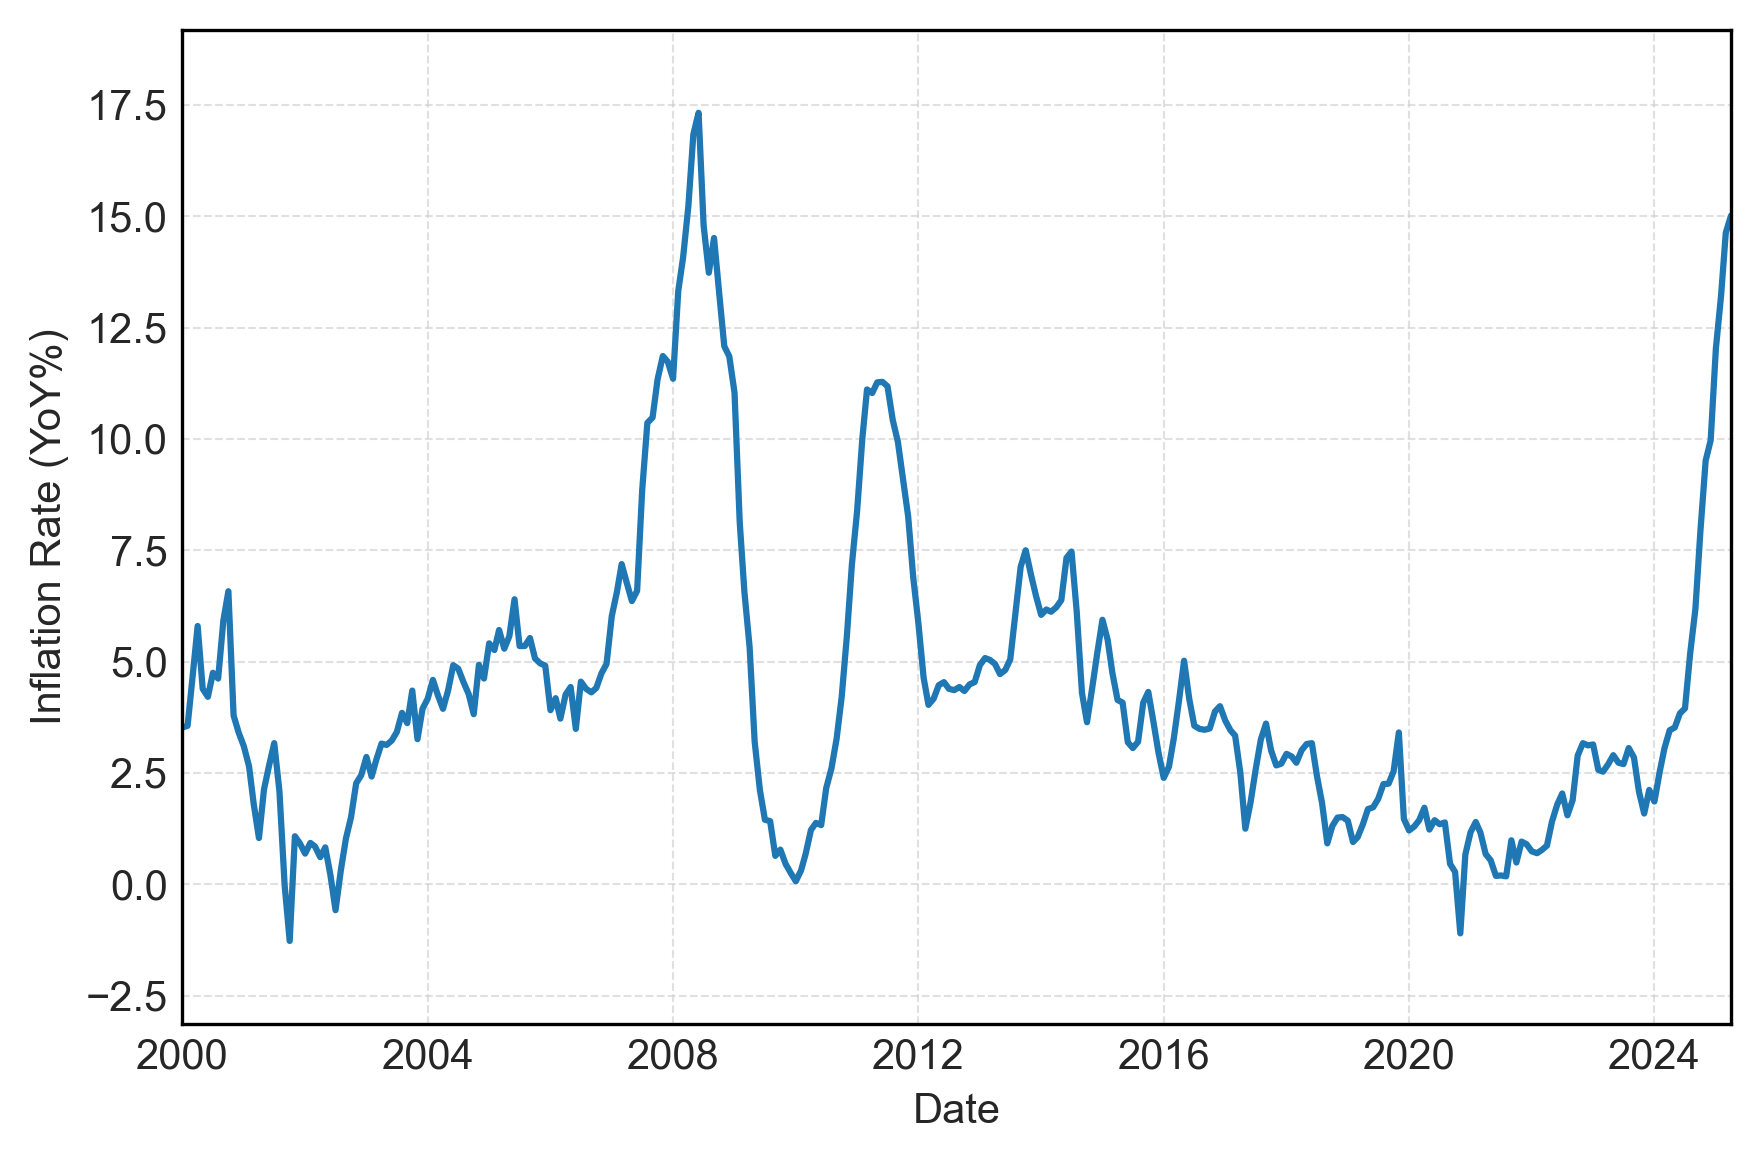

In [13]:
file = config.DATA_DIR / 'various_thesis_data/inflation_data_raw.csv'
df = pd.read_csv(file, index_col=0, delimiter='\t')  # Assuming months are in the index
# Reset index so months become a column
df = df.reset_index().rename(columns={'index': 'Month'})
# Melt the DataFrame
df_long = pd.melt(df, id_vars=['Month'], var_name='Year', value_name='Inflation')
# Create a proper date column in format YYYY-MM
# First convert month names to numbers
month_mapping = {
    'Enero': '01', 'Febrero': '02', 'Marzo': '03', 'Abril': '04',
    'Mayo': '05', 'Junio': '06', 'Julio': '07', 'Agosto': '08',
    'Septiembre': '09', 'Octubre': '10', 'Noviembre': '11', 'Diciembre': '12'
}
df_long['Month'] = df_long['Month'].map(month_mapping)
# Combine year and month
df_long['Date'] = df_long['Year'].astype(str) + '-' + df_long['Month']
# Select only required columns
result = df_long[['Date', 'Inflation']].sort_values('Date').reset_index(drop=True)
result.dropna(inplace=True)
# Convert 'Date' to datetime format
result['Date'] = pd.to_datetime(result['Date'], format='%Y-%m')

fig, ax = plot_line_chart(
    x=result['Date'],
    y_series=[result['Inflation']],
    xlabel='Date',
    ylabel='Inflation Rate (YoY%)',
    filename='inflation_rate.pdf',
)


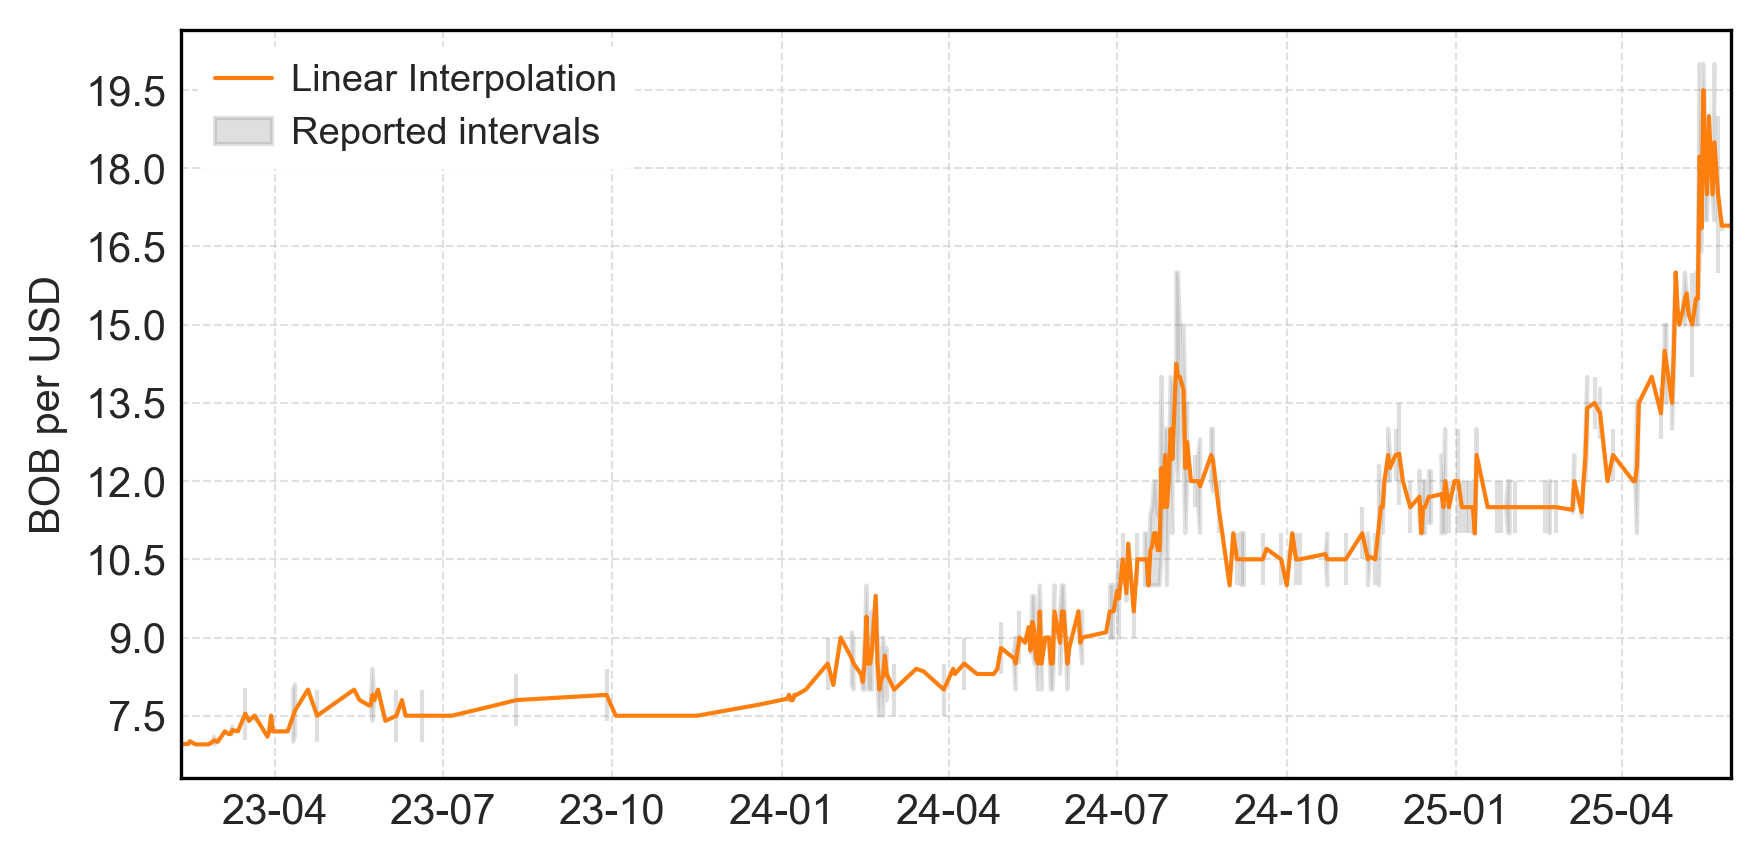

In [14]:
from utils.mongo_controller import mongo_controller
import matplotlib.dates as mdates

full_df = mongo_controller.query_data(_mode='all', collection='Daily_Averages')

df = full_df[['timestamp', 'USD_BOB_Parallel']].copy()
df['USD_BOB_Parallel'] = df['USD_BOB_Parallel'].apply(
    lambda x: x['quote_interval'] if isinstance(x, dict) else [None, None])
df['lower_bound'] = df['USD_BOB_Parallel'].apply(lambda x: x[0])
df['upper_bound'] = df['USD_BOB_Parallel'].apply(lambda x: x[1])
df.drop(columns=['USD_BOB_Parallel'], inplace=True)
df = df[(df['timestamp'] > '2023-02-08') & (df['timestamp'] < '2025-05-31')].copy()
df.sort_values('timestamp')
df.set_index('timestamp', inplace=True)

anchors = df[['lower_bound', 'upper_bound']].mean(axis=1)
full_idx = pd.date_range(df.index.min(), df.index.max(), freq='D')
curve = anchors.interpolate(method='linear')  # straight-line bridging

lo = df['lower_bound'].reindex(full_idx)
hi = df['upper_bound'].reindex(full_idx)

apply_base_style()

fig, ax = plt.subplots(figsize=(6, 3), dpi=300)
ax.plot(curve.index, curve.values, label='Linear Interpolation', linewidth=1, color="#ff7f0e")
ax.fill_between(full_idx, lo, hi, color='grey', alpha=0.25,
                label='Reported intervals')
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.5))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
ax.set_ylabel('BOB per USD')
ax.margins(x=0, y=0.05)
ax.legend()
plt.tight_layout()

out_path = config.DATA_DIR / 'figures' / 'linear_interpolation.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')

plt.show()


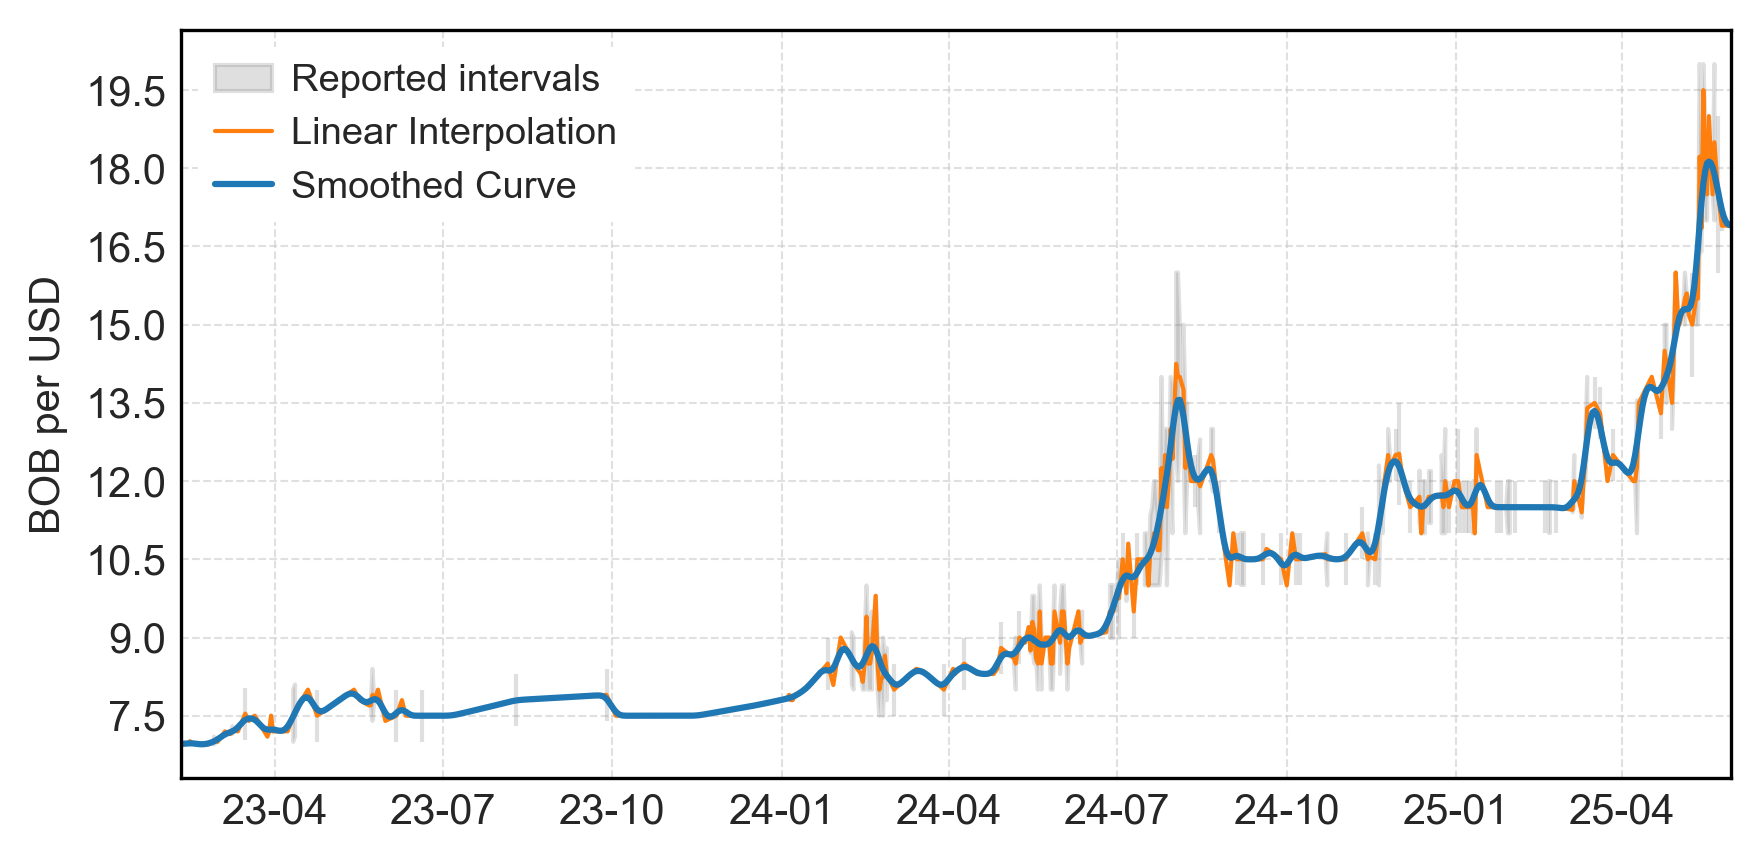

In [15]:
smoothed_curve = curve.copy()
for _ in range(3):  # repeat smoothing 5 times
    smoothed_curve = smoothed_curve.rolling(window=5, center=True, min_periods=1).mean()

fig, ax = plt.subplots(figsize=(6, 3), dpi=300)
ax.fill_between(full_idx, lo, hi, color='grey', alpha=0.25, label='Reported intervals')
ax.plot(curve.index, curve.values, label='Linear Interpolation', linewidth=1, color='#ff7f0e')
ax.plot(smoothed_curve.index, smoothed_curve.values, label='Smoothed Curve', linewidth=1.5, color="#1f77b4")
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.5))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
ax.set_ylabel('BOB per USD')
ax.margins(x=0, y=0.05)
ax.legend()
plt.tight_layout()

out_path = config.DATA_DIR / 'figures' / 'smoothed_curve.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')

plt.show()

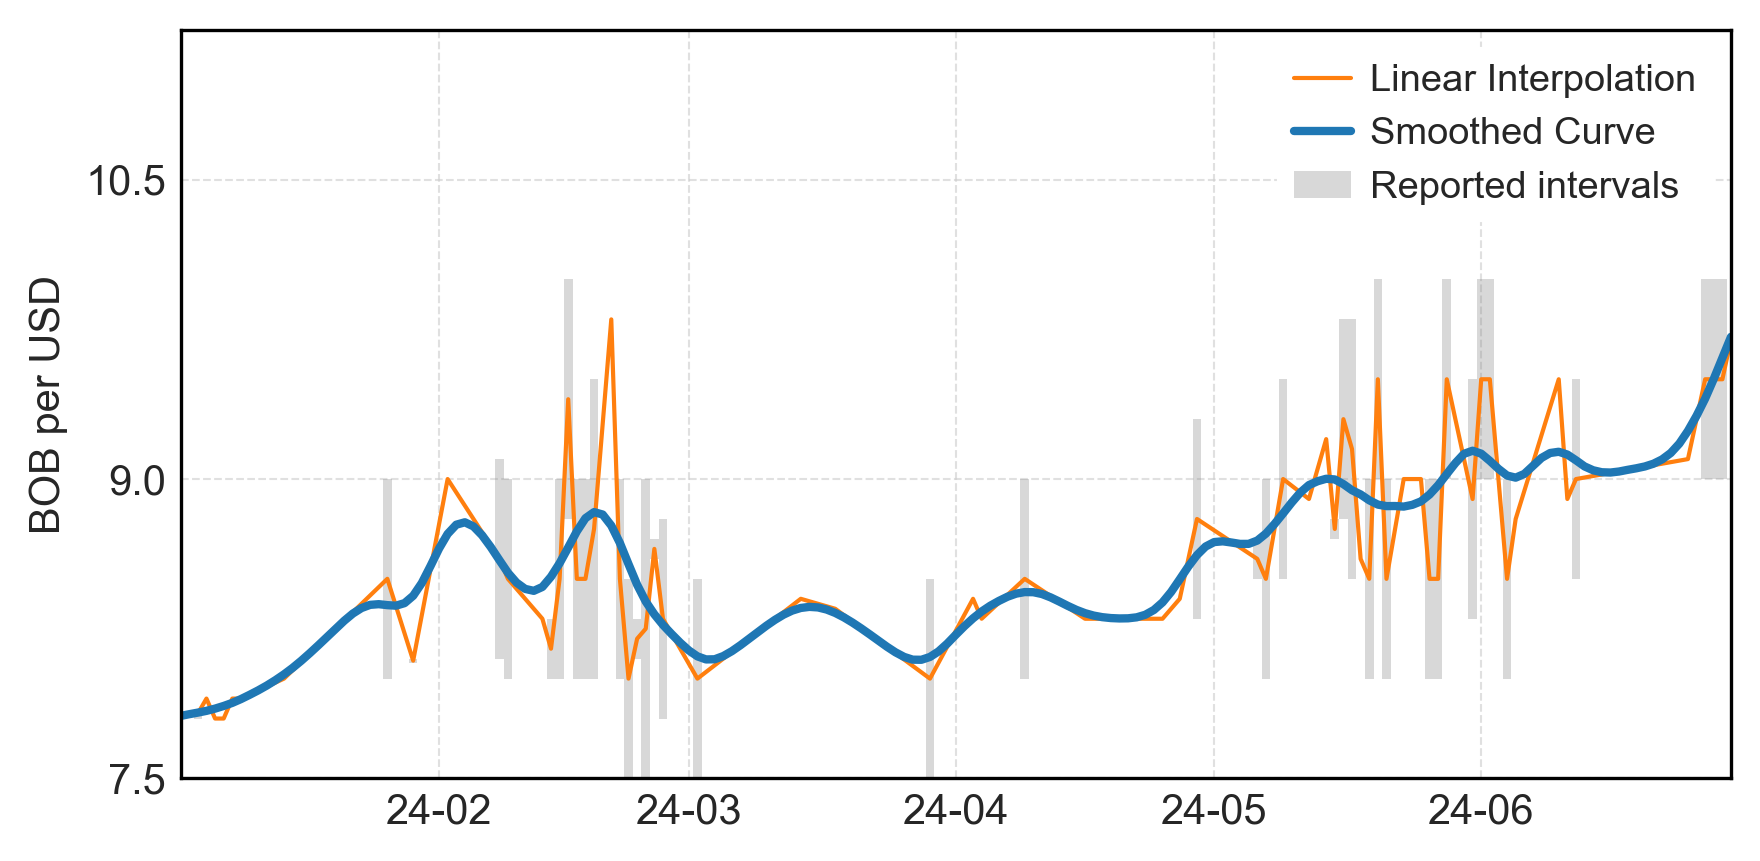

In [16]:
import numpy as np

zoomed_curve = curve[(curve.index > '2024-01-01') & (curve.index < '2024-07-01')]
zoomed_smoothed_curve = smoothed_curve[(smoothed_curve.index > '2024-01-01') & (smoothed_curve.index < '2024-07-01')]
zoomed_full_idx = full_idx[(full_idx > '2024-01-01') & (full_idx < '2024-07-01')]
zoomed_lo = lo[(lo.index > '2024-01-01') & (lo.index < '2024-07-01')]
zoomed_hi = hi[(lo.index > '2024-01-01') & (hi.index < '2024-07-01')]

bar_width = np.timedelta64(1, 'D')
fig, ax = plt.subplots(figsize=(6, 3), dpi=300)
ax.bar(
    zoomed_full_idx,
    (zoomed_hi.values - zoomed_lo.values),  # height
    bottom=zoomed_lo.values,  # y‐start
    width=bar_width,  # width in days
    align='center',
    color='grey',
    alpha=0.3,
    label='Reported intervals'
)

# Overlay your original curves:
ax.plot(
    zoomed_curve.index,
    zoomed_curve.values,
    label='Linear Interpolation',
    linewidth=1, color='#ff7f0e'
)
ax.plot(
    zoomed_smoothed_curve.index,
    zoomed_smoothed_curve.values,
    label='Smoothed Curve',
    linewidth=2, color="#1f77b4"
)

# Formatting:
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.5))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
ax.set_ylabel('BOB per USD')
ax.margins(x=0, y=0.5)
ax.legend(loc='best')
plt.tight_layout()

# 4) Save to PDF
out_path = config.DATA_DIR / 'figures' / 'smoothed_curve_zoomed.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()


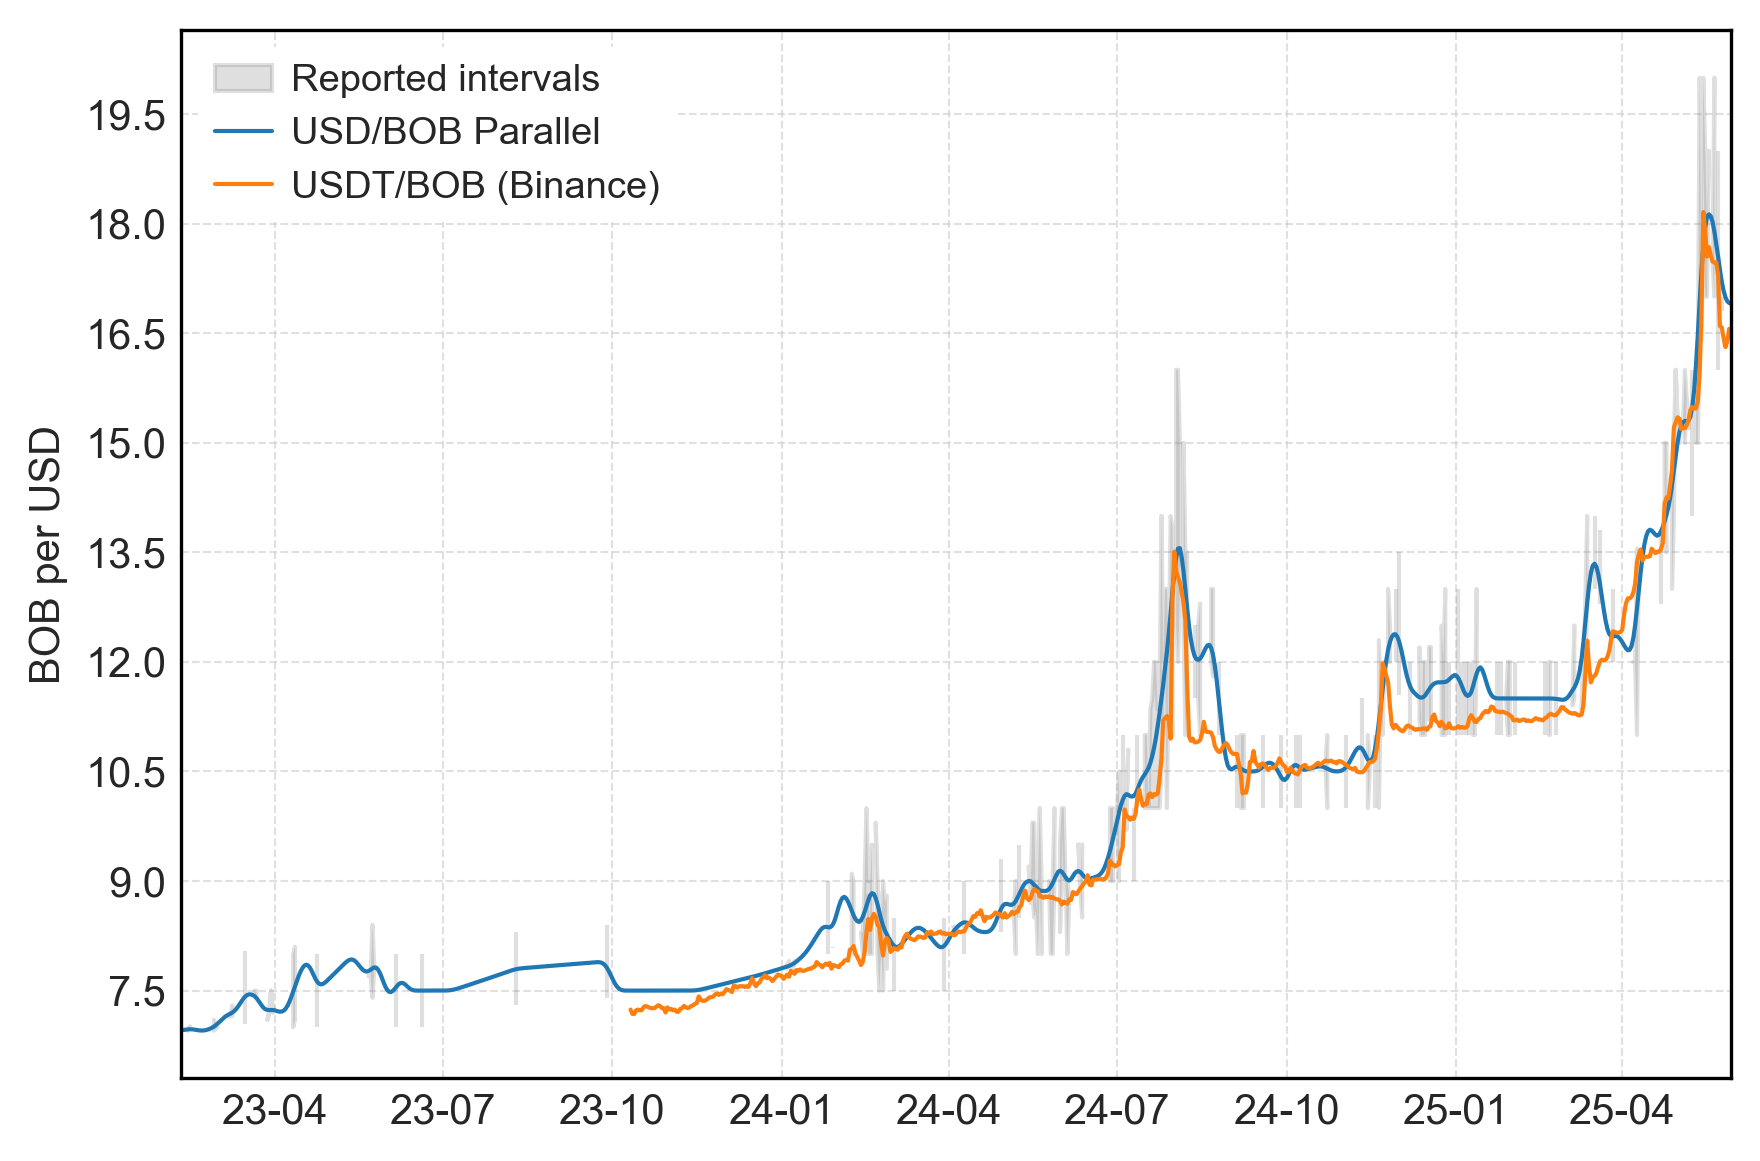

In [17]:
crypto_df = full_df[['timestamp', 'USDT_BOB_Binance']].copy()
crypto_df = crypto_df[(crypto_df['timestamp'] > '2023-10-10') & (crypto_df['timestamp'] < '2025-05-31')].copy()
crypto_df['sell'] = crypto_df['USDT_BOB_Binance'].apply(lambda x: x['sell_vwap'])
crypto_df.drop('USDT_BOB_Binance', axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
ax.fill_between(full_idx, lo, hi, color='grey', alpha=0.25, label='Reported intervals')
# ax.plot(curve.index, curve.values, label='Linear Interpolation', linewidth=1)
ax.plot(smoothed_curve.index, smoothed_curve.values, label='USD/BOB Parallel', linewidth=1)
ax.plot(crypto_df['timestamp'], crypto_df['sell'], label='USDT/BOB (Binance)', linewidth=1)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.5))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
ax.set_ylabel('BOB per USD')
ax.margins(x=0, y=0.05)
ax.legend()
plt.tight_layout()

out_path = config.DATA_DIR / 'figures' / 'usdt-vs-usd-complete-series.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')

plt.show()

/var/folders/k4/tzrrs0b10b9g7npgkqvwbyr00000gn/T/ipykernel_42352/3166156795.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df['timestamp'].dt.to_period('W').apply(lambda r: r.start_time)
/var/folders/k4/tzrrs0b10b9g7npgkqvwbyr00000gn/T/ipykernel_42352/3166156795.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['timestamp'].dt.to_period('M').apply(lambda r: r.start_time)


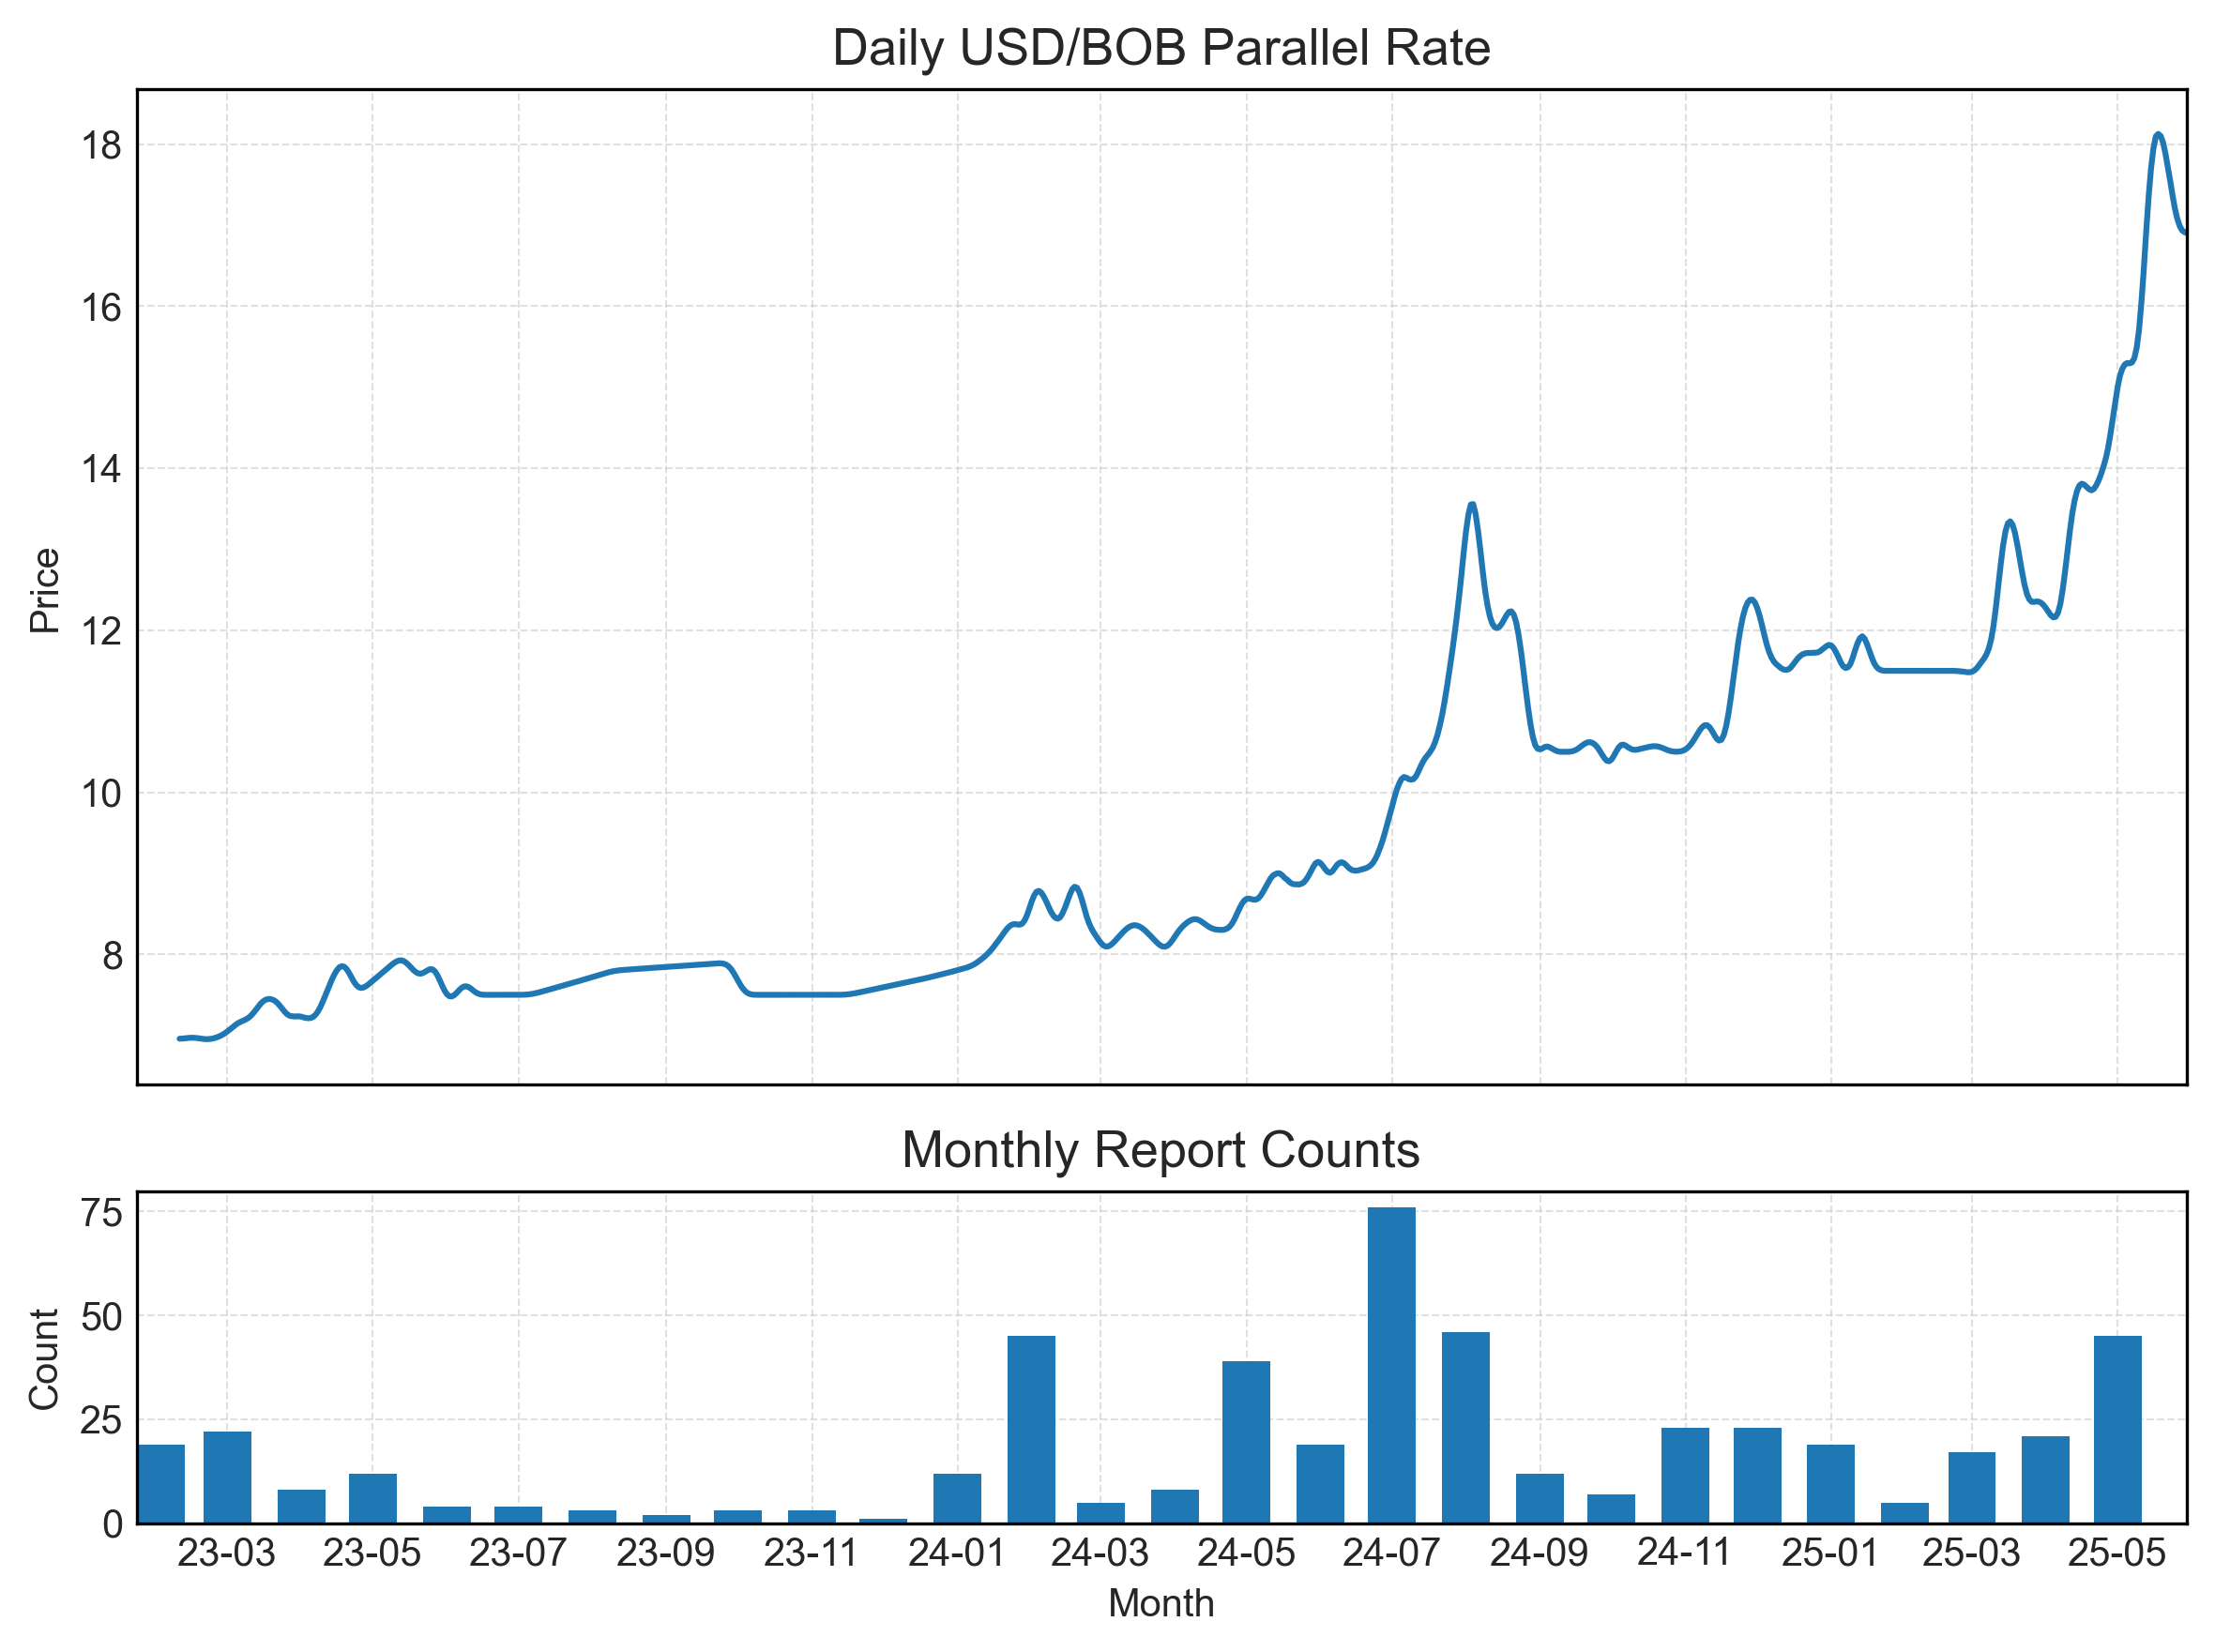

In [18]:
import pytz

df = mongo_controller.query_data(_mode="all", collection="USD_BOB_Parallel", _filter={'human_approved': True})
la_paz_tz = pytz.timezone("America/La_Paz")
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
df['timestamp'] = df['timestamp'].dt.tz_convert(la_paz_tz)

daily_counts = df.groupby(df['timestamp'].dt.date).size().reset_index(name='count')

df['week'] = df['timestamp'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_counts = df.copy().groupby('week').size().reset_index(name='count')

df['month'] = df['timestamp'].dt.to_period('M').apply(lambda r: r.start_time)
monthly_counts = df.copy().groupby('month').size().reset_index(name='count')

fig, (ax_price, ax_count) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(8, 6),
    gridspec_kw={'height_ratios': [3, 1]},
    sharex=True,
)
apply_base_style()
month_locator = mdates.MonthLocator(interval=2)
month_fmt = mdates.DateFormatter('%y-%m')
# Top: daily price line (no x‐labels)
ax_price.plot(smoothed_curve.index, smoothed_curve.values)
ax_price.set_title('Daily USD/BOB Parallel Rate')
ax_price.set_ylabel('Price')
ax_price.tick_params(axis='x', labelbottom=False)
ax_price.margins(x=0, y=0.05)
ax_price.xaxis.set_major_locator(month_locator)
ax_price.xaxis.set_major_formatter(month_fmt)

# Bottom: monthly counts bar
ax_count.bar(monthly_counts['month'], monthly_counts['count'], width=20)  # width in days
ax_count.set_title('Monthly Report Counts')
ax_count.set_xlabel('Month')
ax_count.set_ylabel('Count')
ax_count.margins(x=0, y=0.05)
ax_count.xaxis.set_major_locator(month_locator)
ax_count.xaxis.set_major_formatter(month_fmt)
ax_count.yaxis.set_major_locator(ticker.MultipleLocator(25))

ax_count.grid(axis='x', which='major', linestyle='--')

fig.tight_layout()

out_path = config.DATA_DIR / 'figures' / 'newspaper_frequency.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()


In [19]:
crypto_df.set_index('timestamp', inplace=True)
crypto_series = crypto_df['sell']

In [20]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf


def run_adf_test(series: pd.Series, series_name: str, maxlag=None, regression="c"):
    """
    Run the Augmented Dickey-Fuller test and print results.

    Parameters:
    -----------
    series : pd.Series
        The time series to test.
    series_name : str
        A label for printing purposes.
    maxlag : int or None
        Maximum lag to consider (default None, AIC-based selection).
    regression : {"c", "ct", "ctt", "nc"}
        Regression specification in the ADF test.
    """
    adf_result = adfuller(series.dropna(), maxlag=maxlag, regression=regression, autolag="AIC")
    adf_stat, p_value, n_lags, n_obs, crit_vals = adf_result[0], adf_result[1], adf_result[2], adf_result[3], \
        adf_result[4]

    print(f"\n=== ADF Test for {series_name} ===")
    print(f"ADF Statistic:       {adf_stat:.5f}")
    print(f"p-value:             {p_value:.5f}")
    print(f"# lags used:         {n_lags}")
    print(f"# observations:      {n_obs}")
    print("Critical Values:")
    for level, cv in crit_vals.items():
        print(f"  {level}: {cv:.5f}")
    print("========================\n")

    return adf_result


def engle_granger_cointegration(dependent: pd.Series, regressors: list, labels: list):
    """
    Perform the Engle-Granger two-step procedure with multiple regressors:
    1) OLS regression of dependent on regressors (with intercept).
    2) ADF test on the residuals.

    Parameters:
    -----------
    dependent : pd.Series
        The dependent variable series.
    regressors : list of pd.Series
        A list of independent variable series.
    labels : list of str
        A list of labels corresponding to [dependent, *regressors] for printing.

    Returns:
    --------
    eg_model : RegressionResults
        The OLS regression result object.
    residual_adf_result : tuple
        The ADF output on the residuals.
    """
    # 1) Align all series on the same dates and drop missing values
    series_list = [dependent] + regressors
    names = labels
    df = pd.concat([s.rename(n) for s, n in zip(series_list, names)], axis=1).dropna()

    # 2) OLS regression (Step 1)
    X = sm.add_constant(df[names[1:]])
    y = df[names[0]]
    eg_model = sm.OLS(y, X).fit()

    # Print summary statistics for the regression
    print("=== Engle–Granger Step 1: OLS Regression ===")
    print(eg_model.summary())
    print()

    # 3) Extract residuals and run ADF on them (Step 2)
    residuals = eg_model.resid
    residual_adf_result = adfuller(residuals, maxlag=None, regression="c", autolag="AIC")

    # Print residual ADF results
    resid_stat, resid_pvalue, resid_lags, resid_nobs, resid_crit = (
        residual_adf_result[0],
        residual_adf_result[1],
        residual_adf_result[2],
        residual_adf_result[3],
        residual_adf_result[4],
    )
    print("=== ADF Test on OLS Residuals ===")
    print(f"ADF Statistic (residuals): {resid_stat:.5f}")
    print(f"p-value (residuals):       {resid_pvalue:.5f}")
    print(f"# lags used (residuals):   {resid_lags}")
    print(f"# observations (residuals):{resid_nobs}")
    print("Critical Values (residuals):")
    for level, cv in resid_crit.items():
        print(f"  {level}: {cv:.5f}")
    print("==============================\n")

    return eg_model, residual_adf_result


def print_anova_for_ols(dependent: pd.Series, regressors: list, labels: list):
    """
    Given a fitted OLS model context, print its ANOVA table for multiple regressors.

    Parameters:
    -----------
    dependent : pd.Series
        The dependent variable series.
    regressors : list of pd.Series
        A list of independent variable series.
    labels : list of str
        A list of labels corresponding to [dependent, *regressors] for formula.
    """
    # Align on the same dates and drop missing
    series_list = [dependent] + regressors
    names = labels
    df = pd.concat([s.rename(n) for s, n in zip(series_list, names)], axis=1).dropna()

    # Build formula string, e.g., "y ~ X1 + X2 + X3"
    formula = names[0] + " ~ " + " + ".join(names[1:])
    model = smf.ols(formula, data=df).fit()

    anova_table = sm.stats.anova_lm(model, typ=2)
    print("=== ANOVA Table for the OLS Regression ===")
    print(anova_table)
    print()


In [21]:
smoothed_curve_short = smoothed_curve[smoothed_curve.index >= crypto_series.index.min()]
monthly_crypto_series = crypto_series.resample('ME').last()
monthly_parallel_series_short = smoothed_curve_short.resample('ME').last()

run_adf_test(monthly_crypto_series, 'USDT/BOB Monthly Series')
run_adf_test(monthly_parallel_series_short, 'USD/BOB Parallel Monthly Series')

model, residuals = engle_granger_cointegration(monthly_parallel_series_short, [monthly_crypto_series],
                                               labels=["USDT/BOB", "USD/BOB"])

print_anova_for_ols(monthly_parallel_series_short, [monthly_crypto_series], labels=["USDTBOB", "USDBOB"])


=== ADF Test for USDT/BOB Monthly Series ===
ADF Statistic:       0.21459
p-value:             0.97307
# lags used:         0
# observations:      19
Critical Values:
  1%: -3.83260
  5%: -3.03123
  10%: -2.65552


=== ADF Test for USD/BOB Parallel Monthly Series ===
ADF Statistic:       0.19124
p-value:             0.97177
# lags used:         0
# observations:      19
Critical Values:
  1%: -3.83260
  5%: -3.03123
  10%: -2.65552

=== Engle–Granger Step 1: OLS Regression ===
                            OLS Regression Results                            
Dep. Variable:               USDT/BOB   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     738.2
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           4.60e-16
Time:                        23:11:14   Log-Likelihood:                -9.0187
No. Observations:                  20   AIC

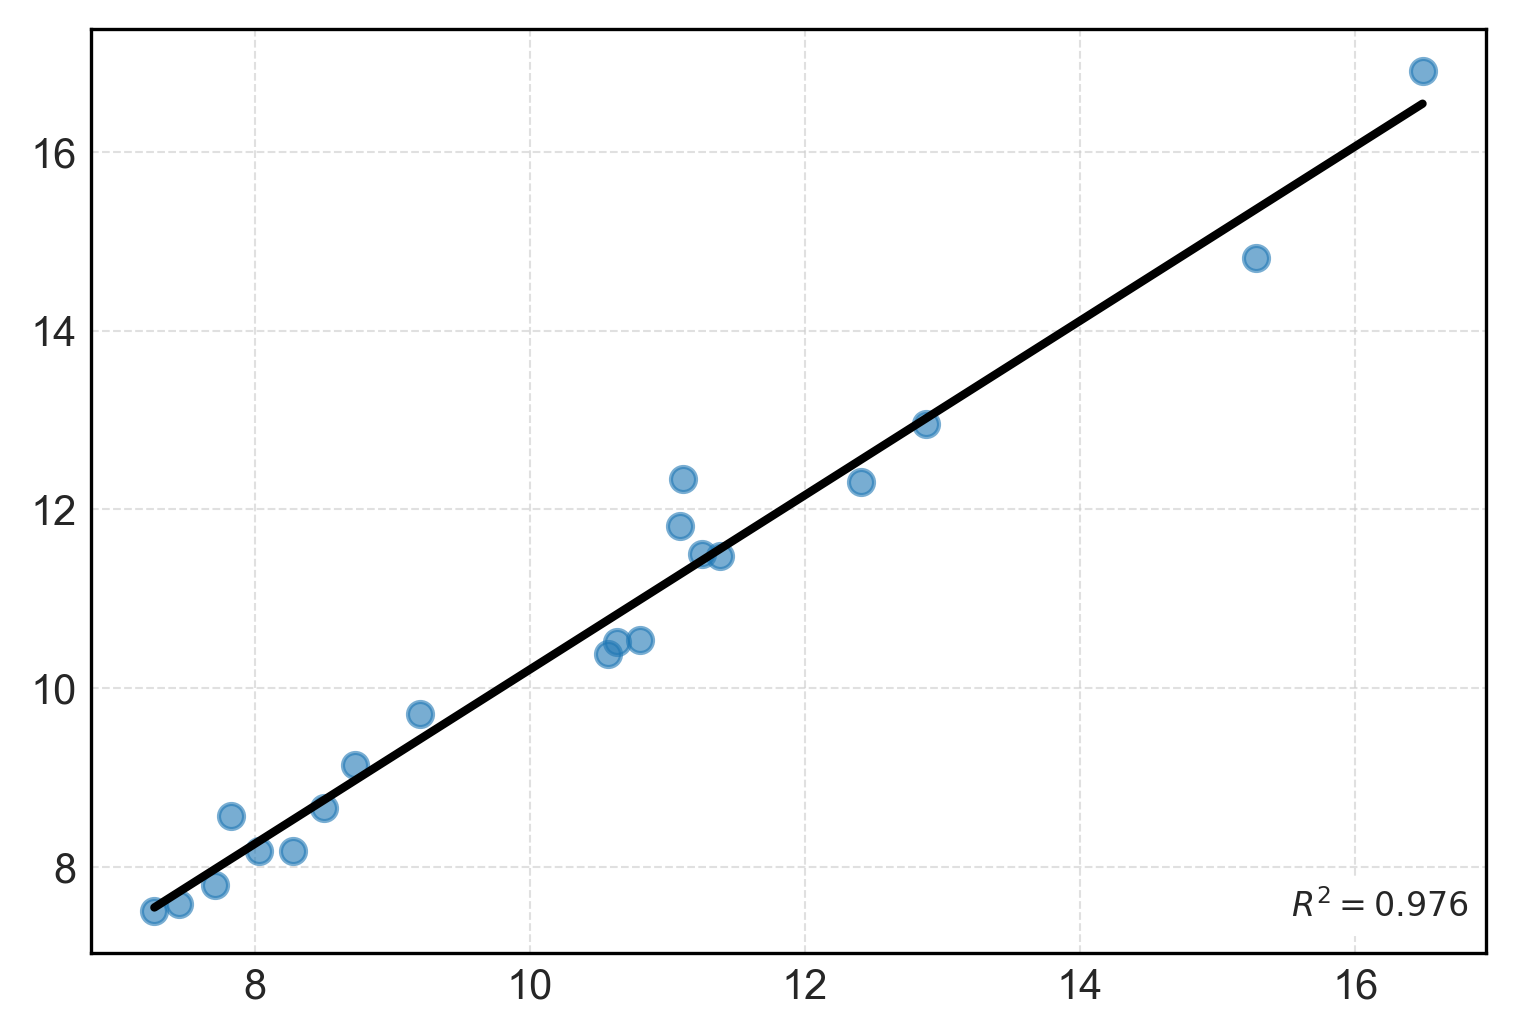

In [22]:
import numpy as np

X_pred = sm.add_constant(monthly_crypto_series)
y_pred = model.predict(X_pred)
sort_idx = np.argsort(monthly_crypto_series)
x_sorted = monthly_crypto_series.copy().values[sort_idx]
y_sorted_pred = y_pred.values[sort_idx]

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
ax.scatter(monthly_crypto_series, monthly_parallel_series_short, alpha=0.6, label="Observations")
ax.plot(x_sorted, y_sorted_pred, label="OLS", color="black", linewidth=2)

ax.text(0.86, 0.07, f"$R^2 = {model.rsquared:.3f}$", transform=ax.transAxes, fontsize=8, verticalalignment="top",
        bbox=dict(boxstyle="square", fc="w", ec="w", pad=0.3))

plt.show()

In [23]:
pearson_correlation = monthly_crypto_series.corr(monthly_parallel_series_short)
print(f"Pearson correlation: {pearson_correlation:.4f}")

Pearson correlation: 0.9880


In [24]:
from statsmodels.tsa.stattools import ccf
import numpy as np

crypto_x0 = monthly_crypto_series - monthly_crypto_series.mean()
parallel_x0 = monthly_parallel_series_short - monthly_parallel_series_short.mean()

max_lags = 30
ccf_vals = ccf(crypto_x0, parallel_x0)[:max_lags + 1]

lags = np.arange(0, len(ccf_vals))
ccf_series = pd.Series(ccf_vals, index=lags)

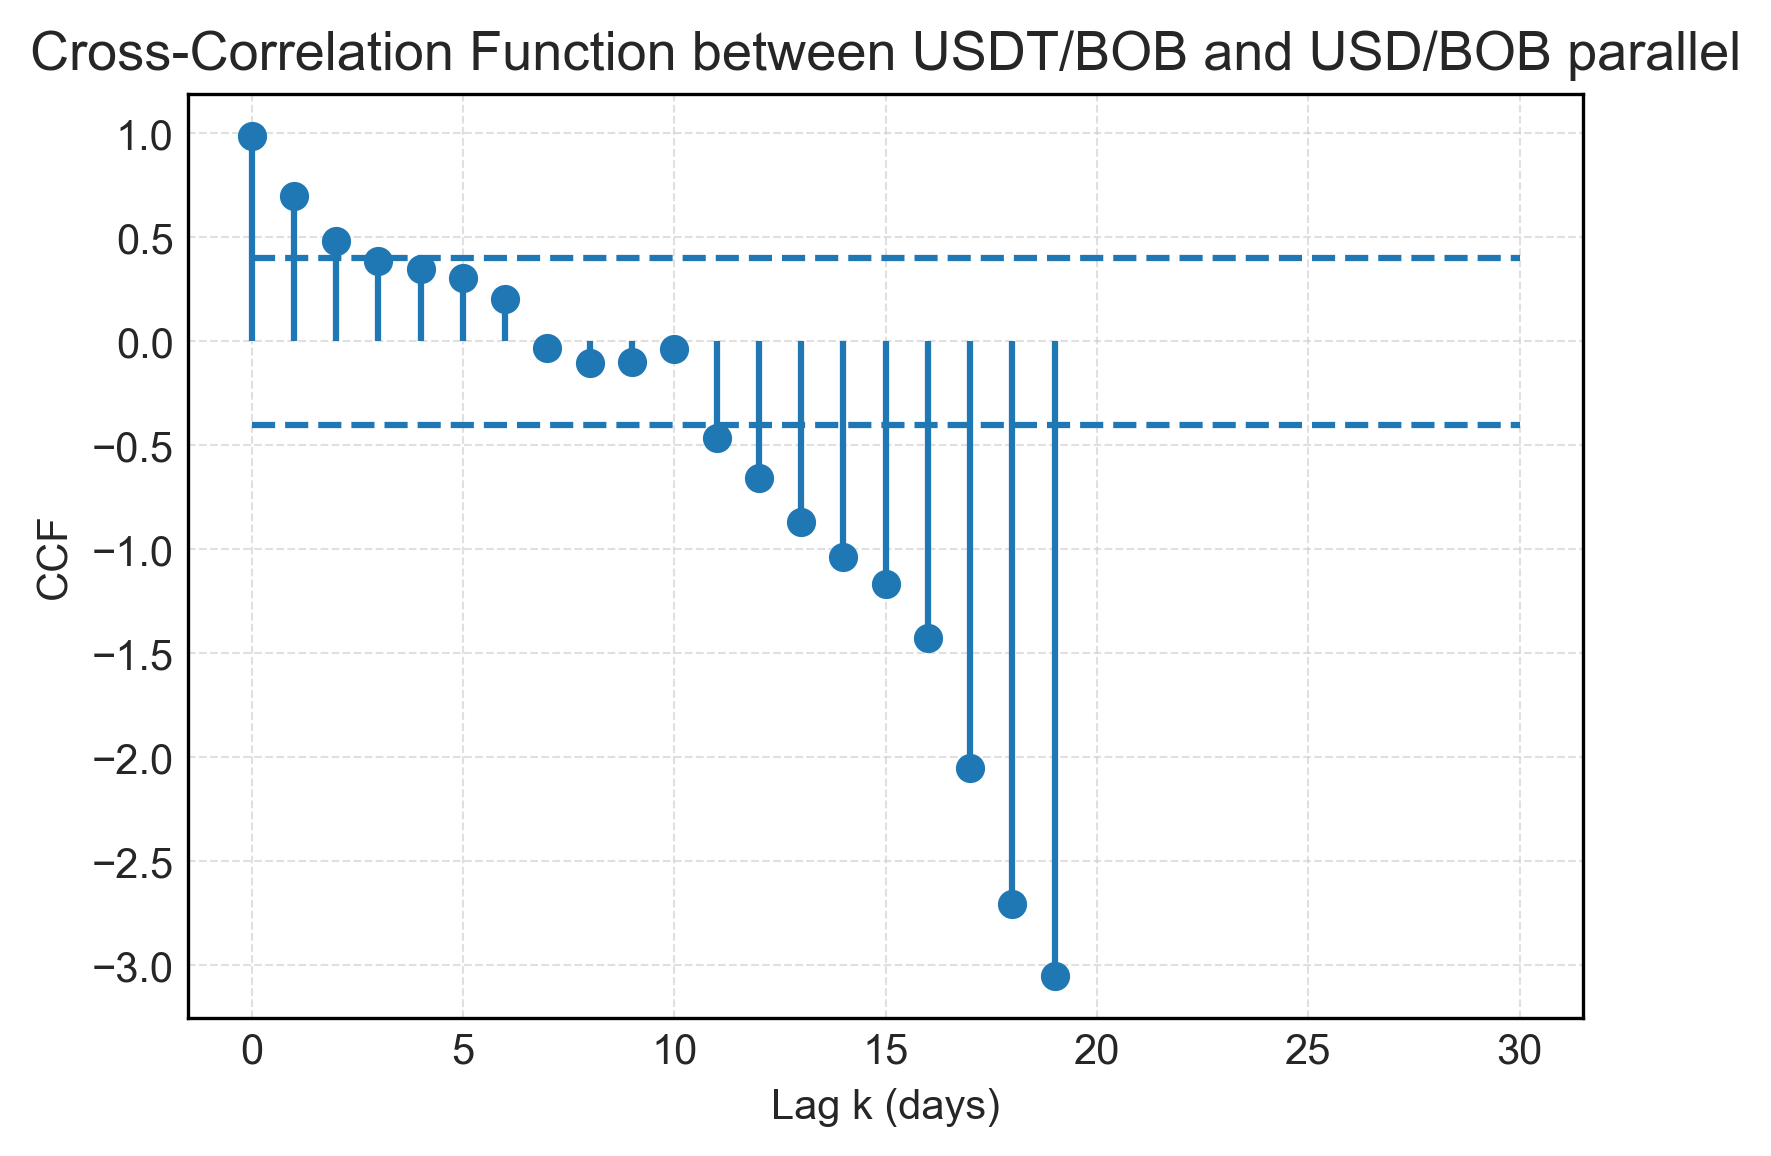

In [25]:
plt.stem(ccf_series.index, ccf_series.values, basefmt=" ")
conf = 2 / np.sqrt(len(x))
plt.hlines([conf, -conf], xmin=0, xmax=max_lags, linestyles='dashed')
plt.xlabel('Lag k (days)')
plt.ylabel('CCF')
plt.title('Cross-Correlation Function between USDT/BOB and USD/BOB parallel')
plt.show()

In [26]:
file = config.DATA_DIR / "various_thesis_data" / "total_liquidity.csv"
total_liquidity_df = pd.read_csv(file, delimiter="\t")
total_liquidity_df["ACTIVOS EXTERNOS NETOS"] = pd.to_numeric(
    total_liquidity_df["ACTIVOS EXTERNOS NETOS"].str.replace(',', ''))
total_liquidity_df["CRÉDITO AL SECTOR PÚBLICO"] = pd.to_numeric(
    total_liquidity_df["CRÉDITO AL SECTOR PÚBLICO"].str.replace(',', '').str.replace('(', '-').str.replace(')', ''))
total_liquidity_df["CRÉDITO AL SECTOR PRIVADO"] = pd.to_numeric(
    total_liquidity_df["CRÉDITO AL SECTOR PRIVADO"].str.replace(',', '').str.replace('(', '-').str.replace(')', ''))
total_liquidity_df["OTRAS CUENTAS NETAS"] = pd.to_numeric(
    total_liquidity_df["OTRAS CUENTAS NETAS"].str.replace(',', '').str.replace('(', '-').str.replace(')', ''))
total_liquidity_df["LIQUIDEZ TOTAL M\'4"] = pd.to_numeric(
    total_liquidity_df["LIQUIDEZ TOTAL M\'4"].str.replace(',', ''))
total_liquidity_df[['month', 'year']] = total_liquidity_df["FECHA"].str.split(expand=True)
total_liquidity_df['date_dt'] = pd.to_datetime(
    total_liquidity_df['year'].astype(int).astype(str) + '-' +
    total_liquidity_df['month'].map(month_map).astype(str) + '-01'
)
total_public_debt = total_liquidity_df[["date_dt", "CRÉDITO AL SECTOR PRIVADO", "CRÉDITO AL SECTOR PÚBLICO"]]
total_public_debt.set_index('date_dt', inplace=True)
total_public_debt["debt"] = total_public_debt["CRÉDITO AL SECTOR PÚBLICO"] + total_public_debt[
    "CRÉDITO AL SECTOR PRIVADO"]
total_public_debt = total_public_debt['debt'] / 6.97 / 1000

/var/folders/k4/tzrrs0b10b9g7npgkqvwbyr00000gn/T/ipykernel_42352/637165050.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_public_debt["debt"] = total_public_debt["CRÉDITO AL SECTOR PÚBLICO"] + total_public_debt[


In [27]:
month_end_fx_reserves = reserves_df[['date_dt', 'currency']].copy()
month_end_fx_reserves.set_index('date_dt', inplace=True)
month_end_fx_reserves = month_end_fx_reserves['currency']
month_end_fx_reserves = month_end_fx_reserves[month_end_fx_reserves.index > '2023-01-31']
from pandas.tseries.offsets import MonthEnd

month_end_fx_reserves.index = month_end_fx_reserves.index + MonthEnd(0)
month_end_fx_reserves = month_end_fx_reserves.resample('ME').last()
month_end_fx_reserves = month_end_fx_reserves[month_end_fx_reserves.index < '2025-01-01']

monthly_parallel_series_complete = smoothed_curve.resample('ME').last()
monthly_parallel_series_complete = monthly_parallel_series_complete[
    monthly_parallel_series_complete.index < "2025-01-01"]

monthly_public_debt = total_public_debt.resample('ME').last()
monthly_public_debt = monthly_public_debt[monthly_public_debt.index > '2023-01-30']
monthly_public_debt = monthly_public_debt[monthly_public_debt.index < '2025-01-01']

date_index = pd.date_range(start='2012-01-31', end='2025-06-30', freq='ME')
monthly_fixed_rate = pd.Series(6.97, index=date_index, name='FixedRate')

In [211]:
run_adf_test(month_end_fx_reserves, 'FX Reserves (MM USD)')
run_adf_test(monthly_parallel_series_complete, 'USD/BOB Parallel')
run_adf_test(monthly_public_debt, 'Public Debt (MM USD)')
# run_adf_test(monthly_fixed_rate, 'Fixed Exchange Rate')

model1, residuals1 = engle_granger_cointegration(monthly_parallel_series_complete, [month_end_fx_reserves],
                                                 labels=["USD/BOB Parallel", "FX Reserves"])
print_anova_for_ols(monthly_parallel_series_complete, [month_end_fx_reserves], labels=["USDBOBParallel", "FXReserves"])

model2, residuals2 = engle_granger_cointegration(monthly_parallel_series_complete, [monthly_public_debt],
                                                 labels=["USD/BOB Parallel", "Public Debt"])
print_anova_for_ols(monthly_parallel_series_complete, [monthly_public_debt], labels=["USDBOBParallel", "PublicDebt"])

model, residuals = engle_granger_cointegration(monthly_parallel_series_complete,
                                               [month_end_fx_reserves, monthly_public_debt],
                                               labels=["USD/BOB Parallel", "FX Reserves", "Public Debt"])

print_anova_for_ols(monthly_parallel_series_complete, [month_end_fx_reserves, monthly_public_debt],
                    labels=["USDBOBParallel", "FXReserves", "PublicDebt"])


=== ADF Test for FX Reserves (MM USD) ===
ADF Statistic:       -1.00395
p-value:             0.75182
# lags used:         8
# observations:      14
Critical Values:
  1%: -4.01203
  5%: -3.10418
  10%: -2.69099


=== ADF Test for USD/BOB Parallel ===
ADF Statistic:       0.73510
p-value:             0.99051
# lags used:         6
# observations:      16
Critical Values:
  1%: -3.92402
  5%: -3.06850
  10%: -2.67389


=== ADF Test for Public Debt (MM USD) ===
ADF Statistic:       1.35344
p-value:             0.99689
# lags used:         8
# observations:      15
Critical Values:
  1%: -3.96444
  5%: -3.08491
  10%: -2.68181

=== Engle–Granger Step 1: OLS Regression ===
                            OLS Regression Results                            
Dep. Variable:       USD/BOB Parallel   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     13.87
Date: 

In [29]:
# ax.plot(smoothed_curve.index, smoothed_curve.values, label='USD/BOB Parallel', linewidth=1)
# ax.plot(crypto_df['timestamp'], crypto_df['sell'], label='USDT/BOB (Binance)', linewidth=1)

crypto_series.describe().round(2)

count    598.00
mean      10.11
std        2.27
min        7.18
25%        8.24
50%       10.49
75%       11.21
max       18.16
Name: sell, dtype: float64

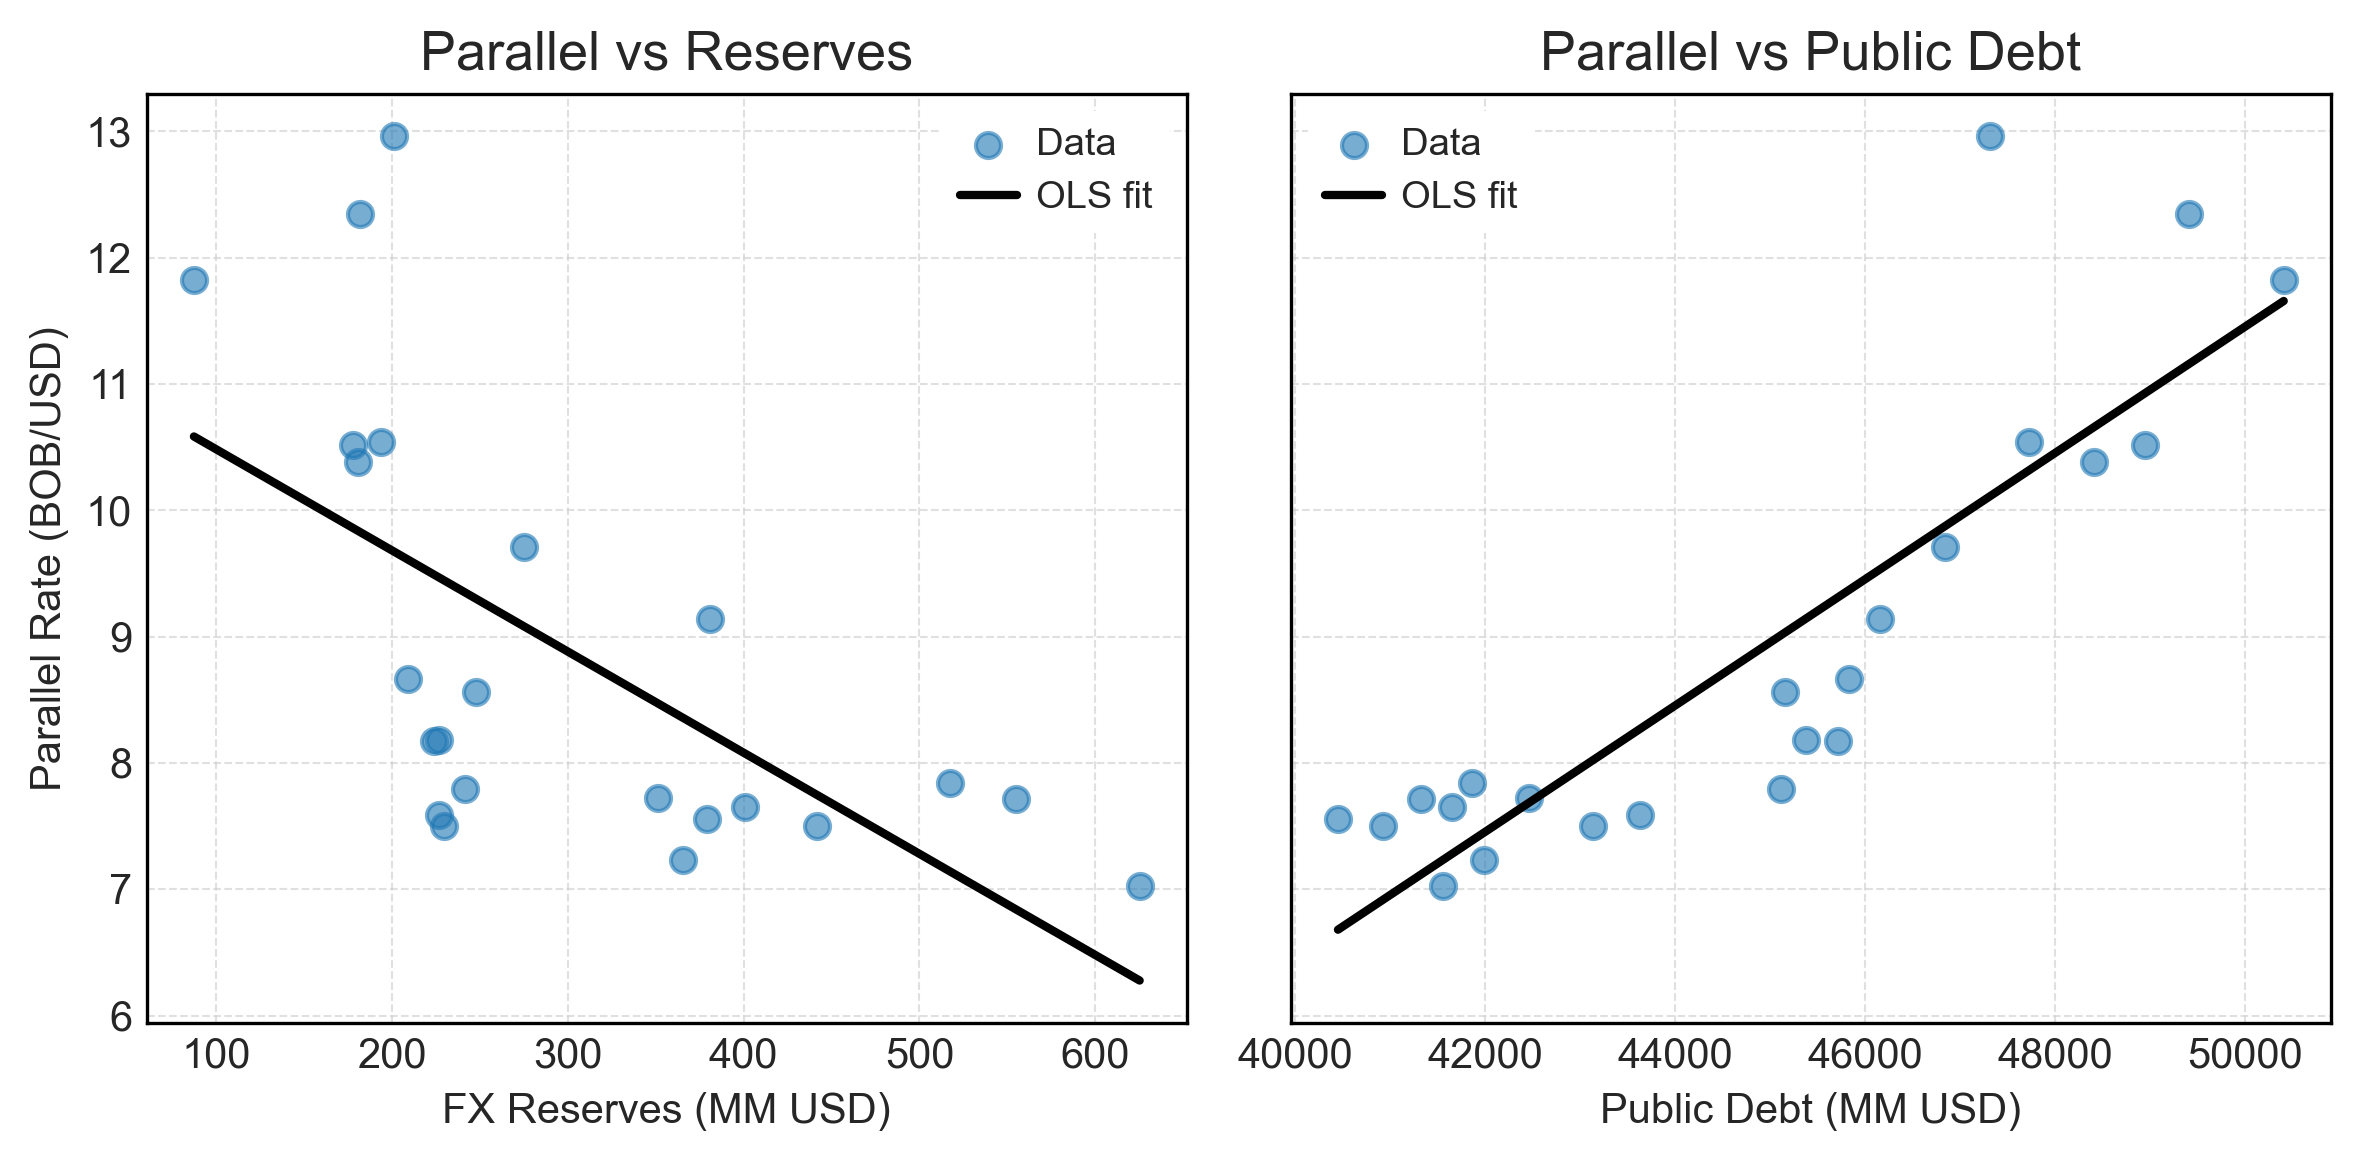

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assume the following Series are defined:
# month_end_fx_reserves:     monthly FX reserves (MM USD)
# monthly_public_debt:       monthly public debt (MM USD)
# monthly_parallel_series_complete: monthly parallel USD/BOB rate

# 1) Align the series and drop missing
df_simple = pd.concat([
    month_end_fx_reserves.rename("Reserves"),
    monthly_public_debt.rename("PublicDebt"),
    monthly_parallel_series_complete.rename("Parallel")
], axis=1).dropna()

# 2) Simple regression: Parallel ~ Reserves
X_res = sm.add_constant(df_simple["Reserves"])
y = df_simple["Parallel"]
model_res = sm.OLS(y, X_res).fit()

# Fitted values for plotting
y_hat_res = model_res.predict(X_res)

# 3) Simple regression: Parallel ~ PublicDebt
X_debt = sm.add_constant(df_simple["PublicDebt"])
model_debt = sm.OLS(y, X_debt).fit()
y_hat_debt = model_debt.predict(X_debt)

# 4) Plot both side-by-side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), dpi=300, sharey=True)

# a) Plot Parallel vs Reserves
ax1.scatter(df_simple["Reserves"], df_simple["Parallel"], alpha=0.6, label="Data")
# Sort for line
sort_idx_res = np.argsort(df_simple["Reserves"].values)
x_sorted_res = df_simple["Reserves"].values[sort_idx_res]
y_sorted_res = y_hat_res.values[sort_idx_res]
ax1.plot(x_sorted_res, y_sorted_res, color="black", linewidth=2, label="OLS fit")
ax1.set_xlabel("FX Reserves (MM USD)")
ax1.set_ylabel("Parallel Rate (BOB/USD)")
ax1.set_title("Parallel vs Reserves")
ax1.legend()

# b) Plot Parallel vs PublicDebt
ax2.scatter(df_simple["PublicDebt"], df_simple["Parallel"], alpha=0.6, label="Data")
# Sort for line
sort_idx_debt = np.argsort(df_simple["PublicDebt"].values)
x_sorted_debt = df_simple["PublicDebt"].values[sort_idx_debt]
y_sorted_debt = y_hat_debt.values[sort_idx_debt]
ax2.plot(x_sorted_debt, y_sorted_debt, color="black", linewidth=2, label="OLS fit")
ax2.set_xlabel("Public Debt (MM USD)")
ax2.set_title("Parallel vs Public Debt")
ax2.legend()

plt.tight_layout()
out_path = config.DATA_DIR / 'figures' / 'bivariate_cointegration.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()


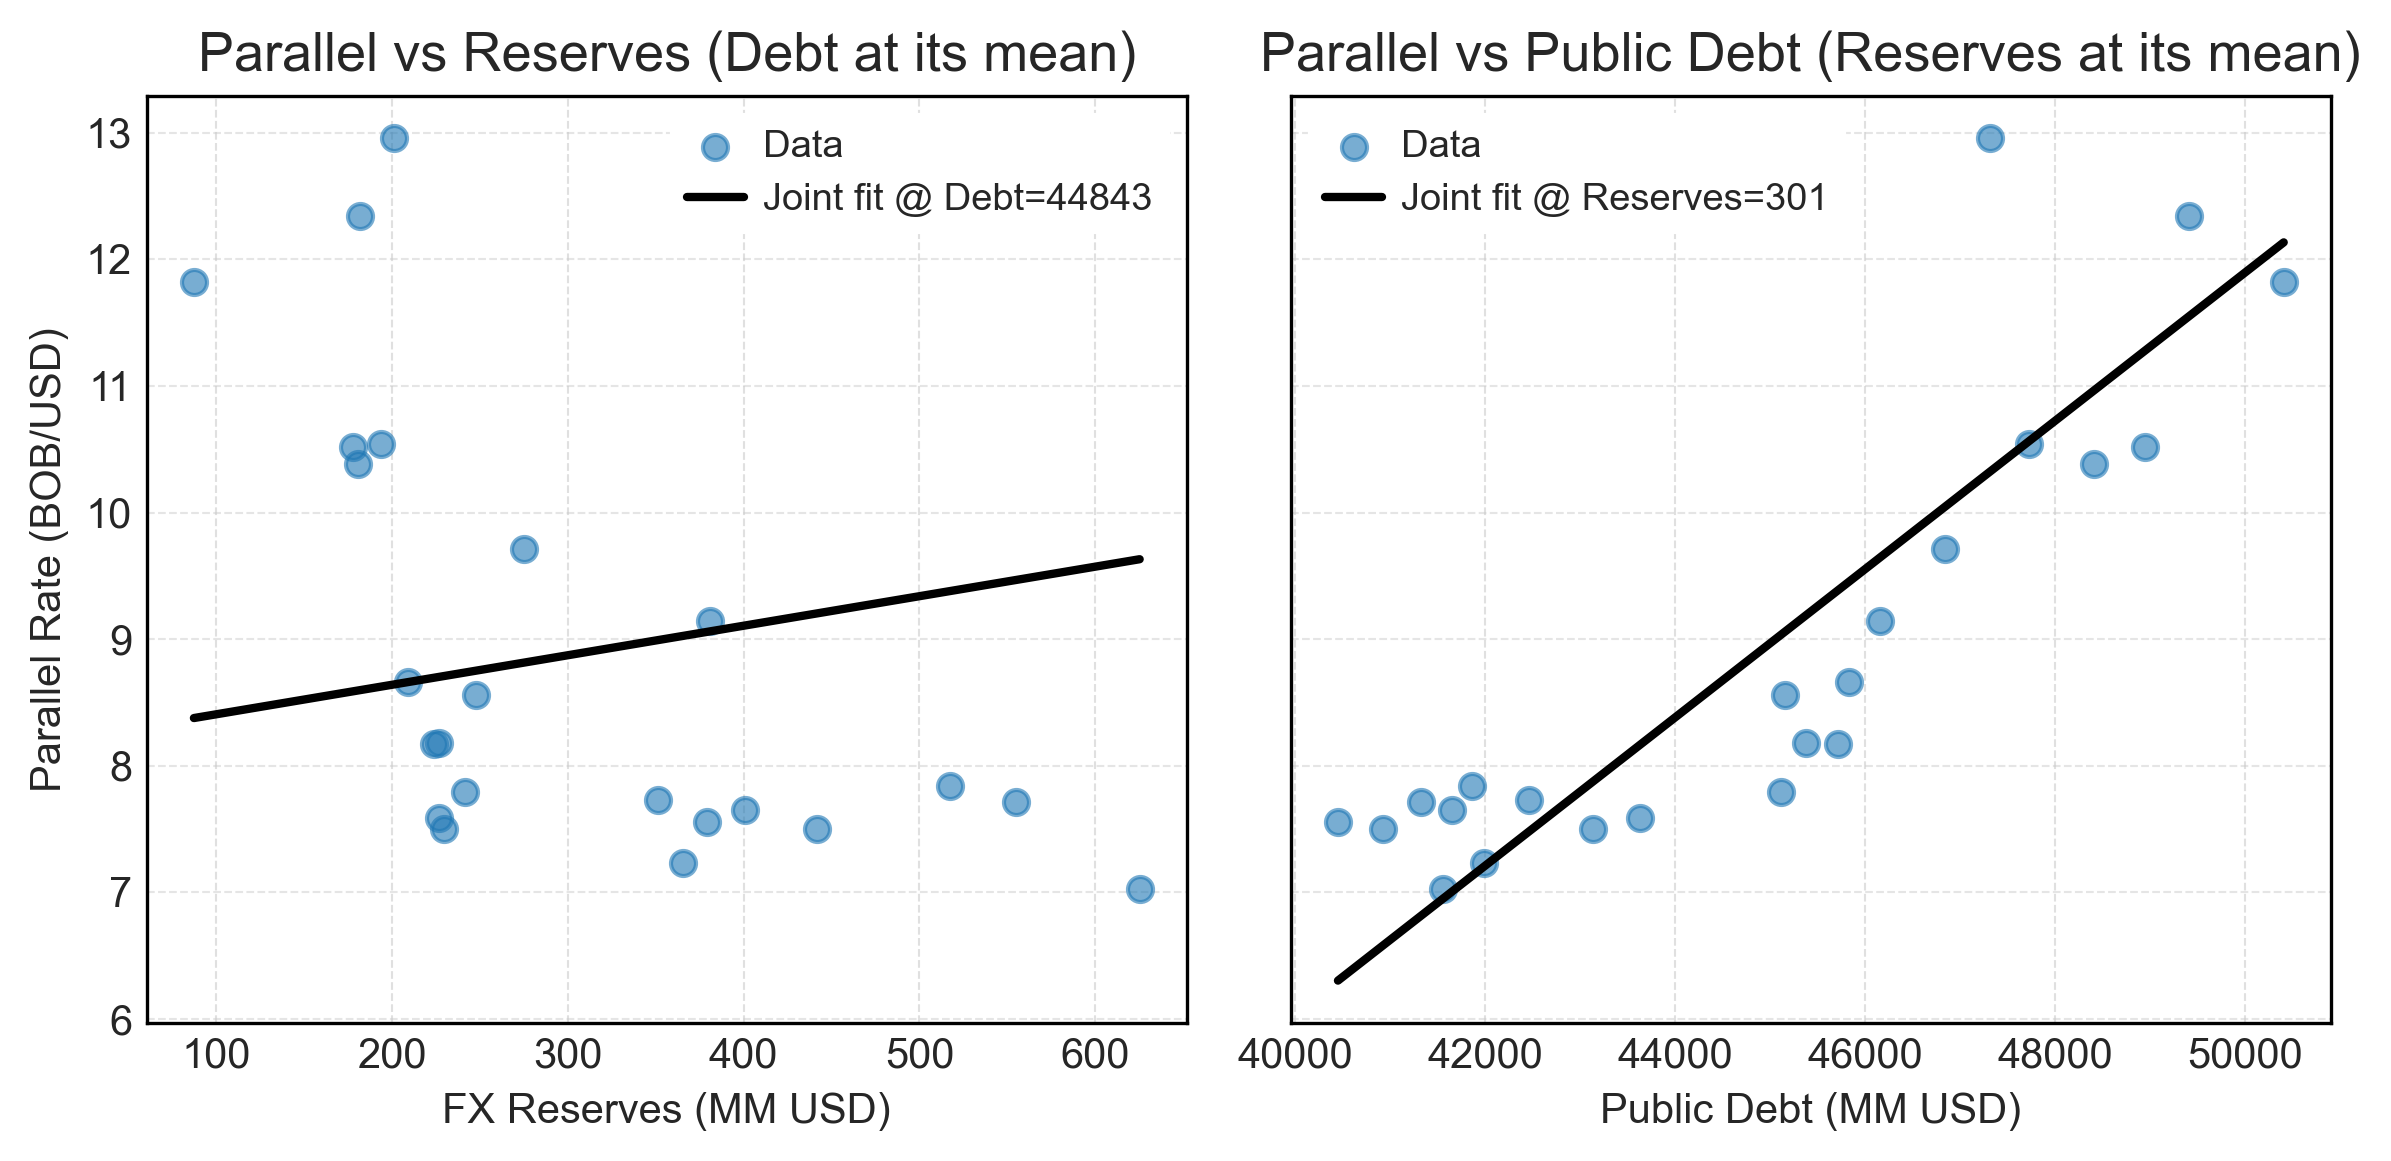

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# 1) Align your three series:
df = pd.concat([
    month_end_fx_reserves.rename("Reserves"),
    monthly_public_debt.rename("PublicDebt"),
    monthly_parallel_series_complete.rename("Parallel")
], axis=1).dropna()

# 2) Fit the joint model
X = sm.add_constant(df[["Reserves", "PublicDebt"]])
y = df["Parallel"]
model = sm.OLS(y, X).fit()
const, b1, b2 = model.params

# 3) Compute means
res_mean = df["Reserves"].mean()
debt_mean = df["PublicDebt"].mean()

# 4) Prepare the two slices
res_vals = np.linspace(df["Reserves"].min(), df["Reserves"].max(), 200)
debt_vals = np.linspace(df["PublicDebt"].min(), df["PublicDebt"].max(), 200)

# Slice A: Debt = mean → fitted vs Reserves
fitted_A = const + b1 * res_vals + b2 * debt_mean

# Slice B: Reserves = mean → fitted vs PublicDebt
fitted_B = const + b1 * res_mean + b2 * debt_vals

# 5) Plot side by side (2D slices of the joint fit)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), dpi=300, sharey=True)

# 5a) Parallel vs Reserves slice (Debt fixed)
ax1.scatter(df["Reserves"], df["Parallel"], alpha=0.6, label="Data")
ax1.plot(res_vals, fitted_A, color="black", linewidth=2, label=f"Joint fit @ Debt={debt_mean:.0f}")
ax1.set_xlabel("FX Reserves (MM USD)")
ax1.set_ylabel("Parallel Rate (BOB/USD)")
ax1.set_title("Parallel vs Reserves (Debt at its mean)")
ax1.legend()
ax1.grid(axis="y", linestyle="--", alpha=0.5)

# 5b) Parallel vs PublicDebt slice (Reserves fixed)
ax2.scatter(df["PublicDebt"], df["Parallel"], alpha=0.6, label="Data")
ax2.plot(debt_vals, fitted_B, color="black", linewidth=2, label=f"Joint fit @ Reserves={res_mean:.0f}")
ax2.set_xlabel("Public Debt (MM USD)")
ax2.set_title("Parallel vs Public Debt (Reserves at its mean)")
ax2.legend()
ax2.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
out_path = config.DATA_DIR / 'figures' / 'partial_joint.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()


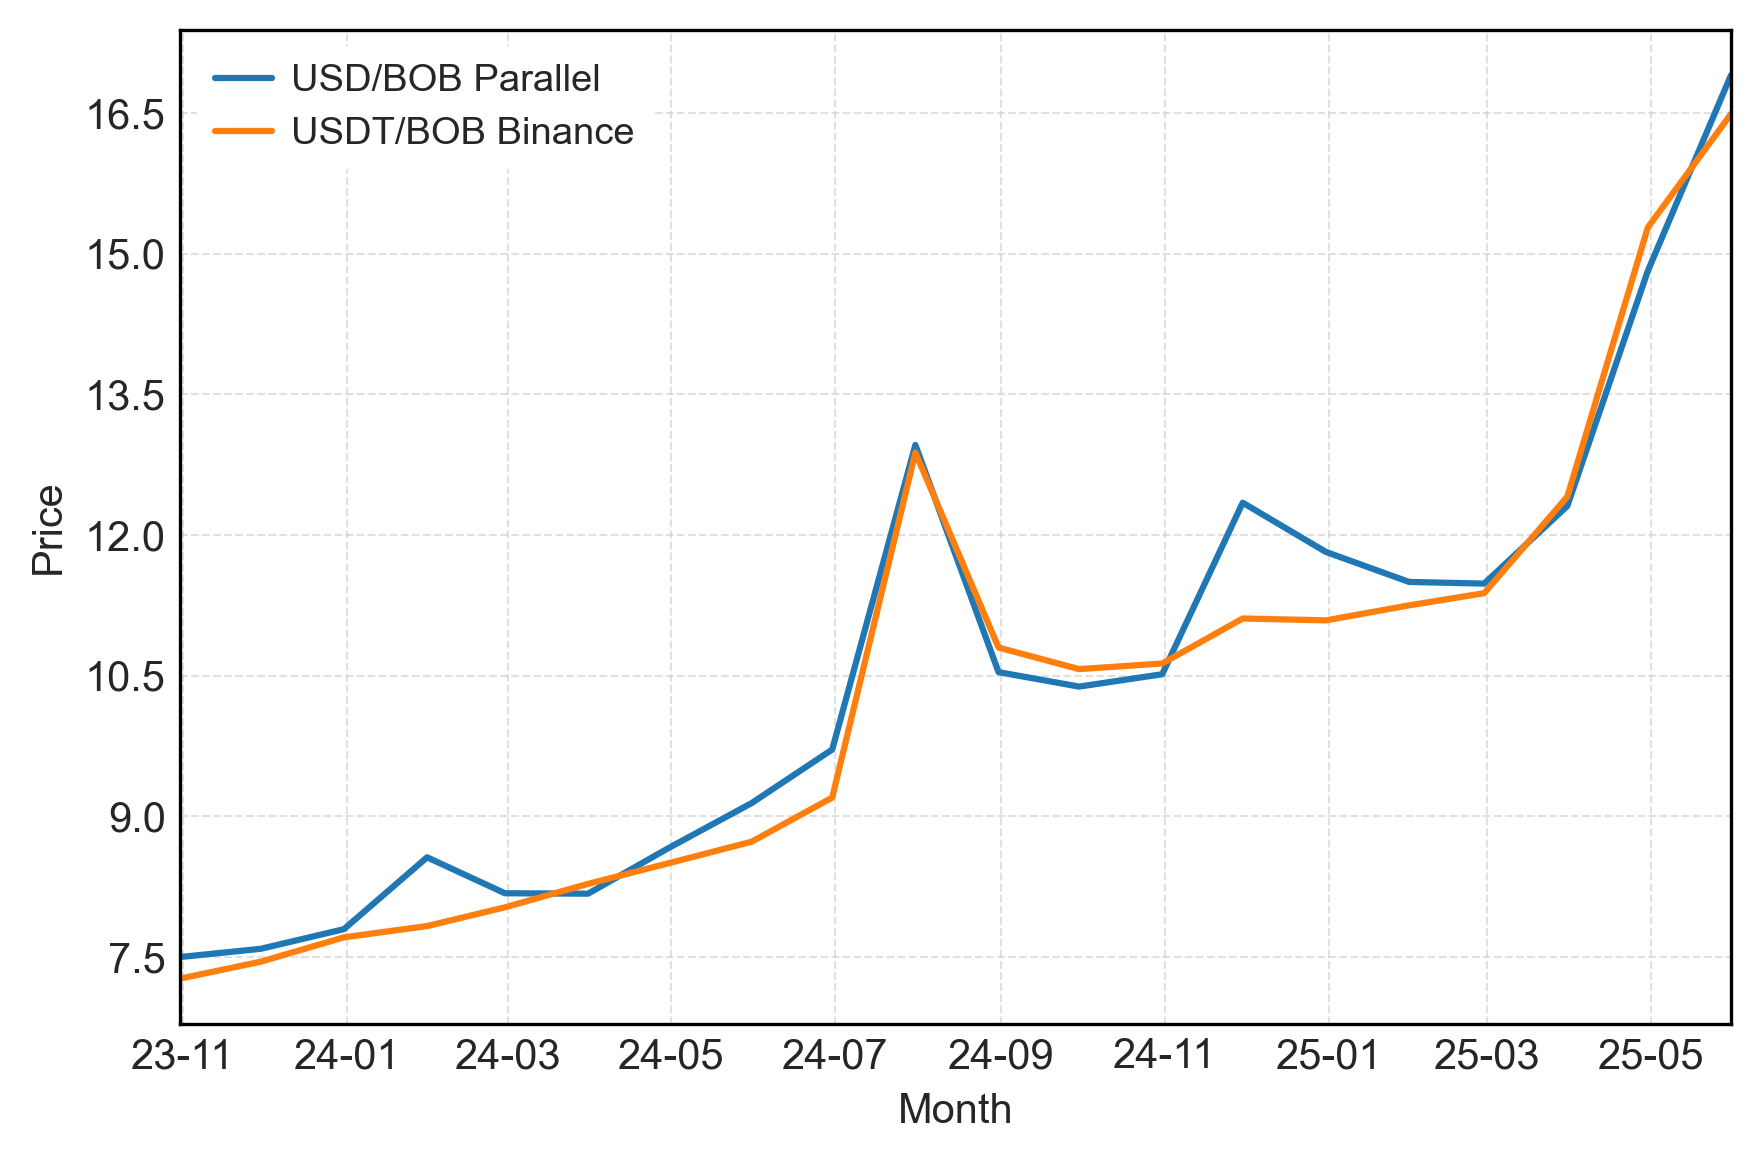

In [32]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
ax.plot(monthly_parallel_series_short.index, monthly_parallel_series_short.values, label='USD/BOB Parallel',
        linewidth=1.5)
ax.plot(monthly_crypto_series.index, monthly_crypto_series.values, label='USDT/BOB Binance', linewidth=1.5)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.5))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
ax.set_ylabel('Price')
ax.set_xlabel('Month')
ax.margins(x=0, y=0.05)
ax.legend()
plt.tight_layout()

out_path = config.DATA_DIR / 'figures' / 'usdt-vs-usd-monthly-series.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')

plt.show()

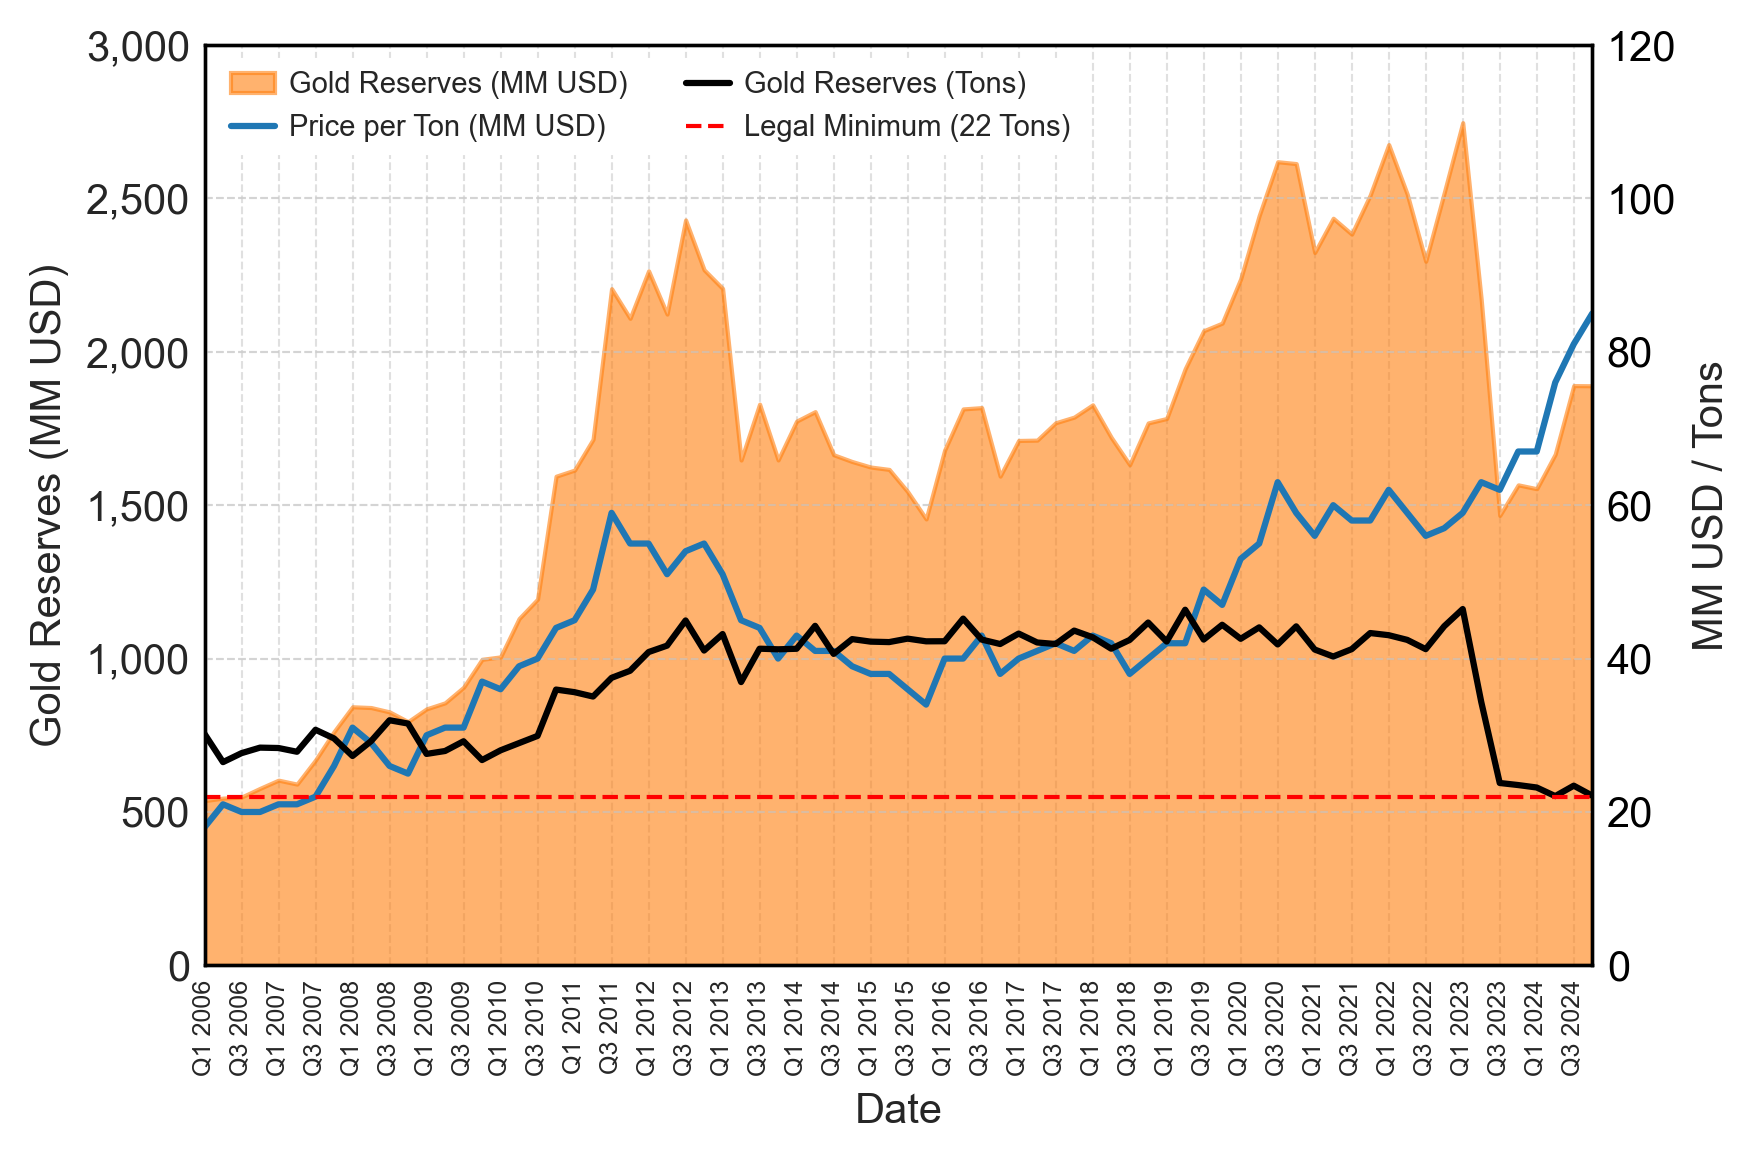

In [33]:
import matplotlib.pyplot as plt

file = config.DATA_DIR / 'various_thesis_data/decomposition_value_gold_reserves.csv'
gold_df = pd.read_csv(file, delimiter='\t')
gold_df["GOLD (MM USD)"] = pd.to_numeric(gold_df["GOLD (MM USD)"].str.replace(',', ''))
gold_df['quarter_fixed'] = gold_df['QUARTER'].str.replace(r'Q([1-4]) (\d{4})', r'\2Q\1', regex=True)
gold_df['date_dt'] = pd.PeriodIndex(gold_df['quarter_fixed'], freq='Q').to_timestamp()

# Create the figure and primary axis (left y-axis)
fig, ax1 = plt.subplots()
apply_base_style()
# Plot the area chart on ax1
ax1.fill_between(gold_df['QUARTER'], gold_df["GOLD (MM USD)"], color='#ff7f0e', alpha=0.6,
                 label='Gold Reserves (MM USD)')
ax1.set_ylabel('Gold Reserves (MM USD)')
ax1.tick_params(axis='y')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.margins(x=0, y=0)  # Get current y-limits
ax1.set_ylim(0, 3000)

# Create the secondary y-axis
ax2 = ax1.twinx()

# Plot the line charts on ax2
ax2.plot(gold_df['QUARTER'], gold_df["PRICE PER TON"], label='Price per Ton (MM USD)',
         color='#1f77b4')
ax2.plot(gold_df['QUARTER'], gold_df["GOLD (TONS)"], label='Gold Reserves (Tons)', color='black')
ax2.axhline(y=22, color='red', linestyle='--', linewidth=1, label='Legal Minimum (22 Tons)')
ax2.tick_params(axis='y', labelcolor='black')
ax2.margins(x=0, y=0)
ax2.set_ylim(0, 120)
ax2.set_ylabel('MM USD / Tons')

# Legends
lines_labels = ax1.get_legend_handles_labels()[0] + ax2.get_legend_handles_labels()[0]
labels = ax1.get_legend_handles_labels()[1] + ax2.get_legend_handles_labels()[1]
ax2.legend(
    lines_labels,
    labels,
    loc='upper left',
    ncol=2,
    fontsize='7'  # or a numeric value like fontsize=8
)

ax1.set_xlabel('Date')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))
plt.setp(ax1.get_xticklabels(), rotation=90, fontsize=6)

plt.tight_layout()

out_path = config.DATA_DIR / 'figures' / 'gold_reserves_decomposition.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()


In [34]:
total_liquidity_df.set_index('date_dt', inplace=True)
total_liquidity_df.drop(['FECHA', 'month', 'year'], axis=1, inplace=True)
total_liquidity_df.rename(columns={"LIQUIDEZ TOTAL M\'4": 'M4'}, inplace=True)
total_liquidity_df.index = total_liquidity_df.index + MonthEnd(0)

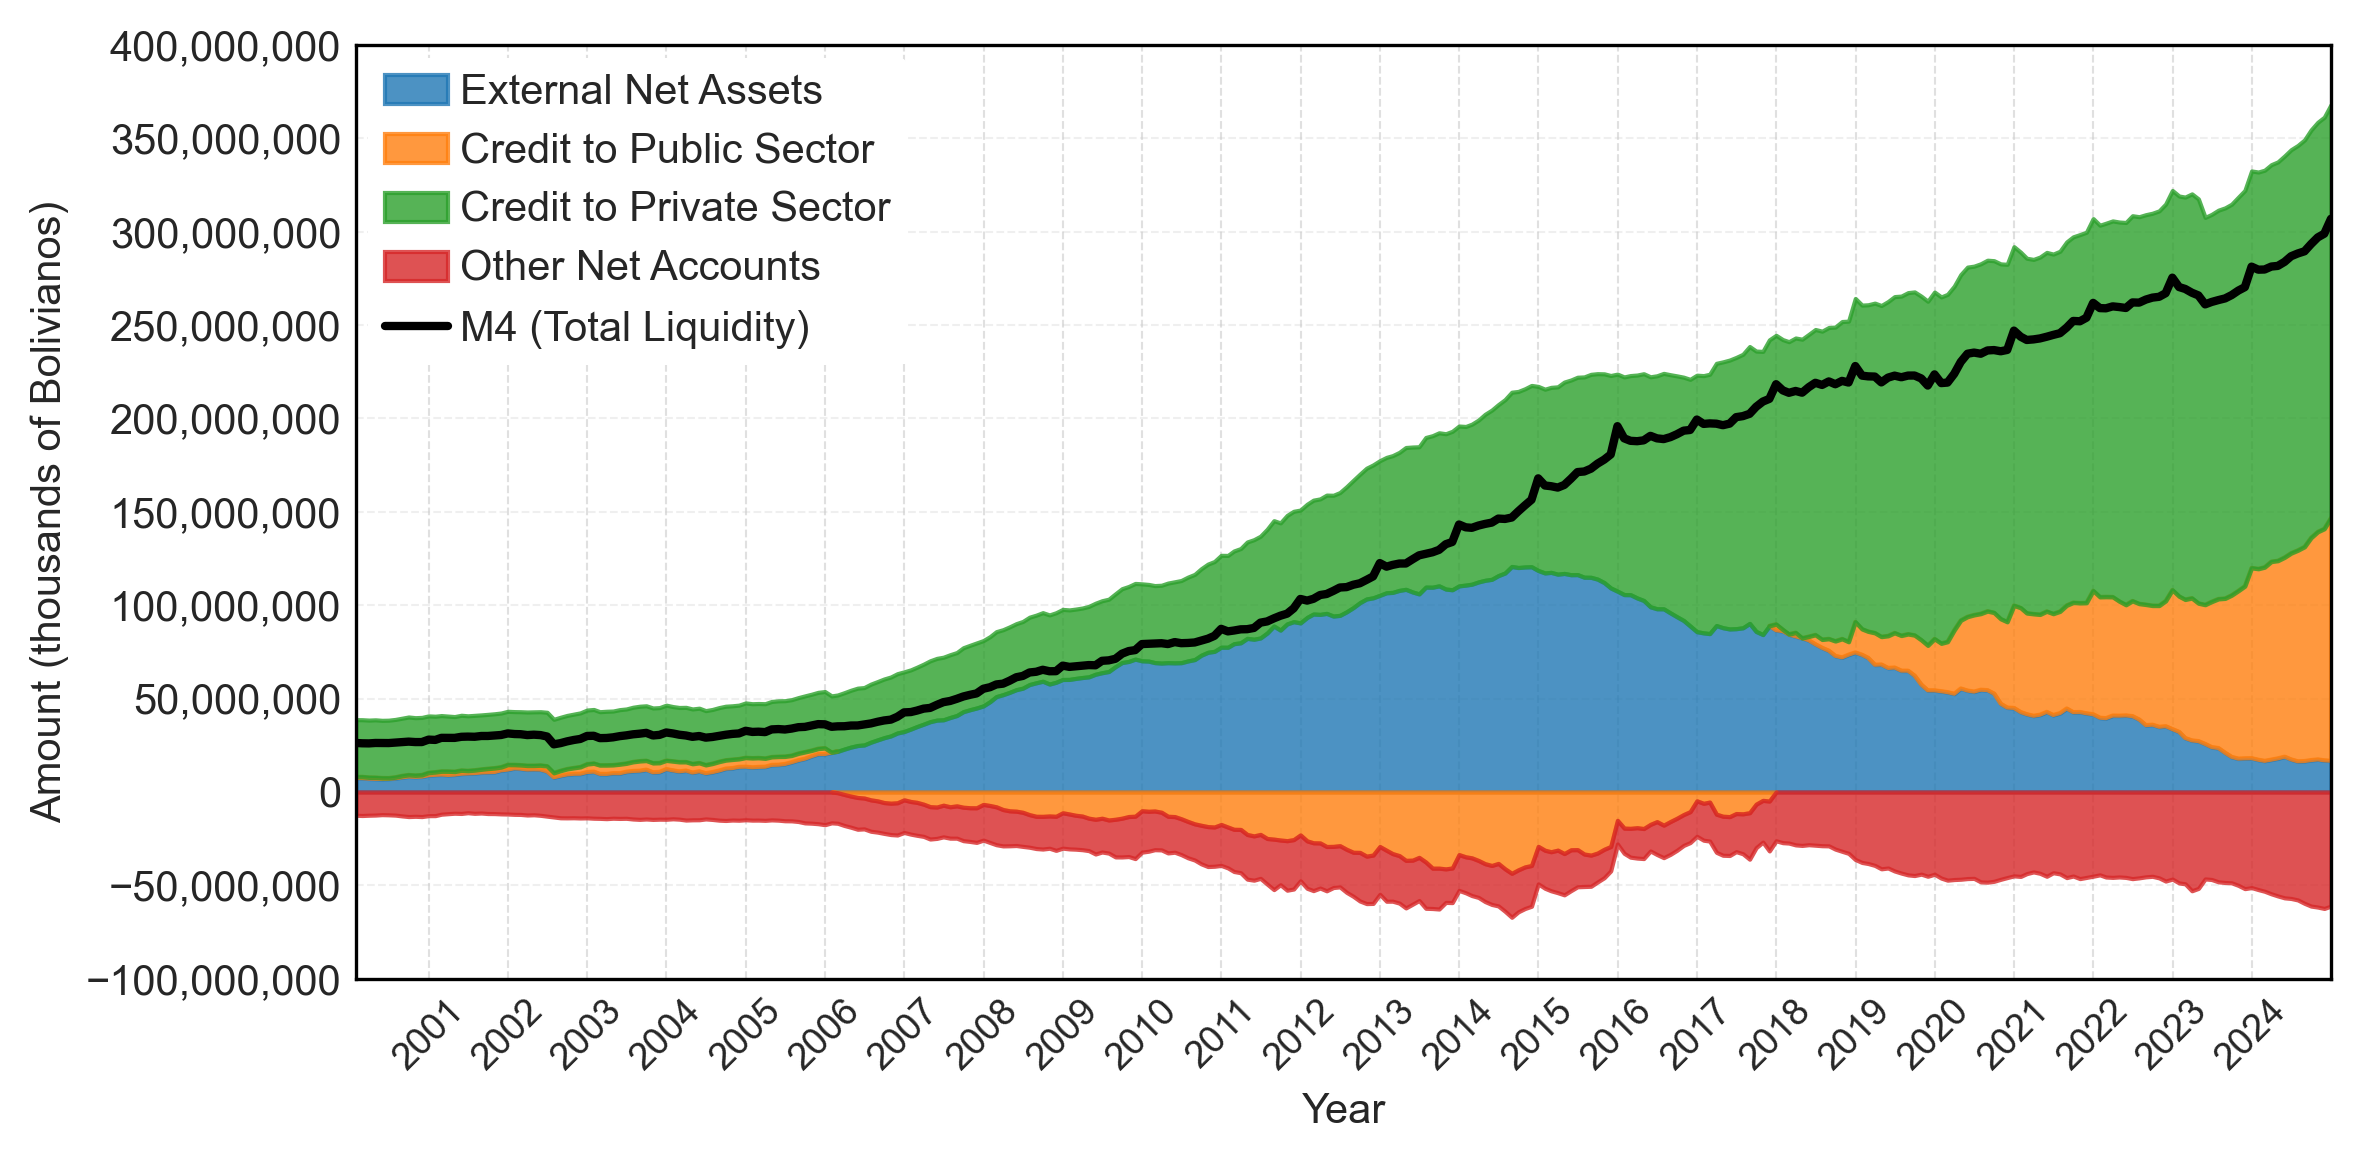

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.ticker import StrMethodFormatter

# ─── Asumiendo que total_liquidity_df ya existe y contiene:
#     • Un índice de tipo datetime (por ejemplo años/meses)
#     • Las cuatro columnas en español ALL CAPS que pueden tener valores ±:
#         "ACTIVOS EXTERNOS NETOS",
#         "CRÉDITO AL SECTOR PÚBLICO",
#         "CRÉDITO AL SECTOR PRIVADO",
#         "OTRAS CUENTAS NETAS"
#     • Una columna "M4" que queremos trazar como línea (Total Liquidity)

# Estas son las columnas originales (spanish, ALL CAPS):
spanish_cols = [
    "ACTIVOS EXTERNOS NETOS",
    "CRÉDITO AL SECTOR PÚBLICO",
    "CRÉDITO AL SECTOR PRIVADO",
    "OTRAS CUENTAS NETAS",
]

# Ahora definimos un diccionario para renombrar a English, Title-Case:
label_map = {
    "ACTIVOS EXTERNOS NETOS": "External Net Assets",
    "CRÉDITO AL SECTOR PÚBLICO": "Credit to Public Sector",
    "CRÉDITO AL SECTOR PRIVADO": "Credit to Private Sector",
    "OTRAS CUENTAS NETAS": "Other Net Accounts",
    "M4": "M4 (Total Liquidity)",
}

# ─–––––––––– 1) Filtrar los datos para “solo positivos” y “solo negativos” –––––––––––
pos_df = total_liquidity_df[spanish_cols].clip(lower=0)  # valores < 0 → 0
neg_df = total_liquidity_df[spanish_cols].clip(upper=0)  # valores > 0 → 0

# ─–––––––––– 2) Calcular cumsum(axis=1) para apilar correctamente –––––––––––––––––––
pos_cum = pos_df.cumsum(axis=1)
neg_cum = neg_df.cumsum(axis=1)

# ─–––––––––– 3) Definir 1 color único por variable (p. ej. reseñados en el mismo orden que spanish_cols) –––––––––––
colors = [
    "#1f77b4",  # External Net Assets
    "#ff7f0e",  # Credit to Public Sector
    "#2ca02c",  # Credit to Private Sector
    "#d62728",  # Other Net Accounts
]

# ─–––––––––– 4) Crear figura y eje ─––––––––––––––––––––––––––––––––––––––––––––––––
fig, ax = plt.subplots(figsize=(8, 4), dpi=300)

# ─–––––––––– 5A) Dibujar las bandas positivas encima de cero ─––––––––––––––––––––––––
for i, span_col in enumerate(spanish_cols):
    if i == 0:
        bottom_pos = np.zeros(len(pos_cum))
    else:
        bottom_pos = pos_cum.iloc[:, i - 1].values

    top_pos = pos_cum.iloc[:, i].values

    ax.fill_between(
        total_liquidity_df.index,
        bottom_pos,
        top_pos,
        where=(pos_df[span_col] > 0),
        color=colors[i],
        label=label_map[span_col],  # Usamos la etiqueta en inglés
        interpolate=True,
        alpha=0.8,
    )

# ─–––––––––– 5B) Dibujar las bandas negativas por debajo de cero ─––––––––––––––––––––
for i, span_col in enumerate(spanish_cols):
    if i == 0:
        bottom_neg = np.zeros(len(neg_cum))
    else:
        bottom_neg = neg_cum.iloc[:, i - 1].values

    top_neg = neg_cum.iloc[:, i].values

    ax.fill_between(
        total_liquidity_df.index,
        bottom_neg,
        top_neg,
        where=(neg_df[span_col] < 0),
        color=colors[i],  # Mismo color que la parte positiva
        interpolate=True,
        alpha=0.8,
    )
    # NO colocamos `label=` aquí para no duplicar la leyenda

# ─–––––––––– 6) Superponer la línea “M4” (Total Liquidity) ─––––––––––––––––––––––––––––
ax.plot(
    total_liquidity_df.index,
    total_liquidity_df["M4"],
    color="black",
    linewidth=2,
    label=label_map["M4"],
)

# ─–––––––––– 7) Eliminar márgenes en X ─––––––––––––––––––––––––––––––––––––––––––––
ax.margins(x=0)

# ─–––––––––– 8) Configurar eje Y: ticks cada 50 000 000 con separador de miles ─––––––
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=50_000_000))
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
# No necesitamos ticklabel_format porque el StrMethodFormatter ya evita la notación científica.

# ─–––––––––– 9) Configurar eje X para mostrar solo años (cada 1 año) ─––––––––––––––
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# ─–––––––––– 10) Etiquetas y título ─––––––––––––––––––––––––––––––––––––––––––––––
ax.set_ylabel("Amount (thousands of Bolivianos)", fontsize=10)
ax.set_xlabel("Year", fontsize=10)

# ─–––––––––– 11) Construir la leyenda: UNA sola entrada por variable + M4 ─––––––––––
handles, labels = ax.get_legend_handles_labels()
# Filtrar etiquetas vacías (en caso de que alguna variable no tenga pos ó neg)
filtered = [(h, lbl) for h, lbl in zip(handles, labels) if lbl.strip() != ""]
if filtered:
    h2, l2 = zip(*filtered)
    ax.legend(
        h2,
        l2,
        loc="upper left",
        ncol=1,  # Una sola columna
        fontsize=10,
        frameon=True,  # Queremos un fondo sólido
        facecolor="white",  # Fondo blanco
        edgecolor="none",  # Sin borde
        columnspacing=0.4,
        handletextpad=0.3,
        borderaxespad=0.3,
    )

# ─–––––––––– 12) Cuadrícula horizontal y márgenes en Y ─––––––––––––––––––––––––––––
ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.3)

# Ajustamos límite superior e inferior (ejemplo fijo, cámbialo según tus datos)
ax.set_ylim(-100_000_000, 400_000_000)

# ─–––––––––– 13) Rotar etiquetas del eje X para que no se monten ─––––––––––––––––
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=9)

out_path = config.DATA_DIR / 'figures' / 'liquidity_composition.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


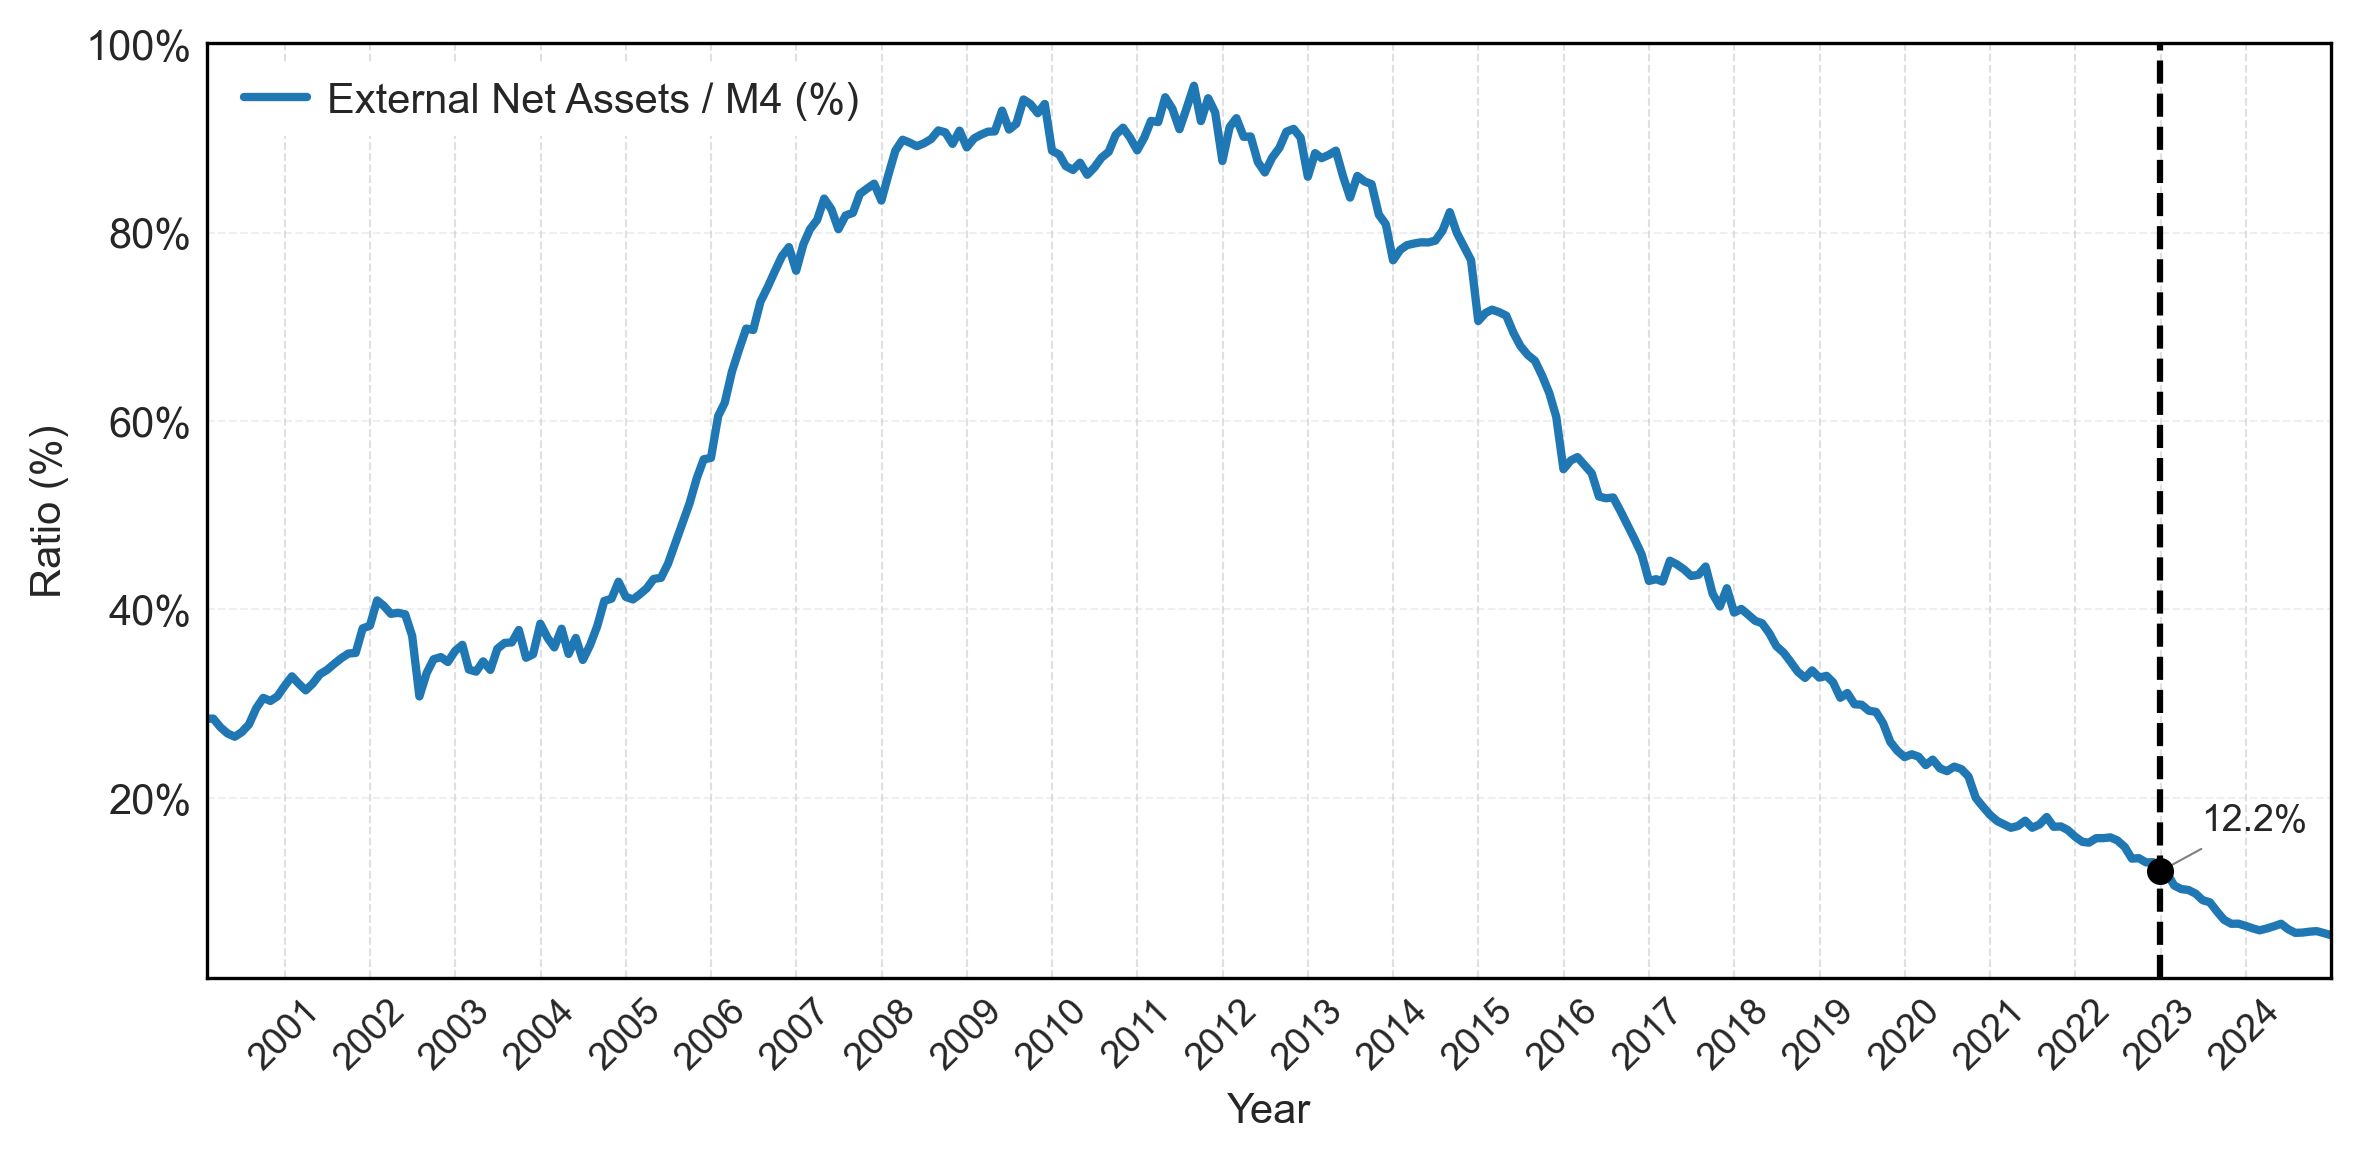

In [208]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pandas as pd

# 1) Compute the ratio (as percentage)
ratio_pct = (total_liquidity_df["ACTIVOS EXTERNOS NETOS"]
             / total_liquidity_df["M4"]) * 100

# 2) Create figure and axis
fig, ax = plt.subplots(figsize=(8, 4), dpi=300)

# 3) Plot the ratio line
ax.plot(
    total_liquidity_df.index,
    ratio_pct,
    color="#1f77b4",
    linewidth=2,
    label="External Net Assets / M4 (%)"
)

# 4) Add vertical line at 2022-12-31
vline_date = pd.to_datetime("2022-12-31")
ax.axvline(x=vline_date, linestyle="--", color="black")

# 5) Extract the ratio value at exactly 2022-12-31 (if that date is in your index)
#    If the exact timestamp isn’t present, you can do .asof or interpolate as needed.
if vline_date in ratio_pct.index:
    ratio_at_date = ratio_pct.loc[vline_date]
else:
    # If your index is monthly/quarterly etc., pick the nearest prior value:
    ratio_at_date = ratio_pct.asof(vline_date)

# 6) Plot a small marker at (2022-12-31, ratio_at_date)
ax.scatter(
    [vline_date],
    [ratio_at_date],
    color="black",
    s=30,
    zorder=5
)

# 7) Annotate the point with a text label. You can tweak the (x, y) offsets to avoid overlap.
ax.annotate(
    f"{ratio_at_date:.1f}%",
    xy=(vline_date, ratio_at_date),
    xytext=(10, 10),  # offset in points: 10pt right, 10pt up
    textcoords="offset points",
    fontsize=9,
    # backgroundcolor="white",
    arrowprops=dict(
        arrowstyle="-",
        lw=0.5,
        color="gray"
    )
)

# 8) Formatting X‐axis as years
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# 9) Format Y‐axis as percent with no decimals
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100, decimals=0))

# 10) Remove X margins
ax.margins(x=0)

# 11) Labels, grid, legend, and styling
ax.set_xlabel("Year", fontsize=10)
ax.set_ylabel("Ratio (%)", fontsize=10)
ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.3)
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=9)
ax.legend(loc="upper left", fontsize=10, frameon=True, facecolor="white", edgecolor="none")

plt.tight_layout()

out_path = config.DATA_DIR / 'figures' / 'R_to_M4.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()


In [36]:
_file = config.DATA_DIR / "various_thesis_data" / "contribution_to_ext_assets.csv"
contribution_ext_assets_df = pd.read_csv(file, delimiter="\t")
contribution_ext_assets_df["ACTIVOS EXTERNOS NETOS"] = pd.to_numeric(
    contribution_ext_assets_df["ACTIVOS EXTERNOS NETOS"])
contribution_ext_assets_df["CRÉDITO AL SECTOR PÚBLICO"] = pd.to_numeric(
    contribution_ext_assets_df["CRÉDITO AL SECTOR PÚBLICO"])
contribution_ext_assets_df["CRÉDITO AL SECTOR PRIVADO"] = pd.to_numeric(
    contribution_ext_assets_df["CRÉDITO AL SECTOR PRIVADO"])
contribution_ext_assets_df["OTRAS CUENTAS NETAS"] = pd.to_numeric(contribution_ext_assets_df["OTRAS CUENTAS NETAS"])
contribution_ext_assets_df["M4"] = pd.to_numeric(contribution_ext_assets_df["M4"])
contribution_ext_assets_df['quarter_fixed'] = contribution_ext_assets_df['QUARTER'].str.replace(r'Q([1-4]) (\d{4})',
                                                                                                r'\2Q\1', regex=True)
contribution_ext_assets_df['date_dt'] = pd.PeriodIndex(contribution_ext_assets_df['quarter_fixed'],
                                                       freq='Q').to_timestamp()
contribution_ext_assets_df.set_index('date_dt', inplace=True)
contribution_ext_assets_df.drop(['QUARTER', 'quarter_fixed'], axis=1, inplace=True)

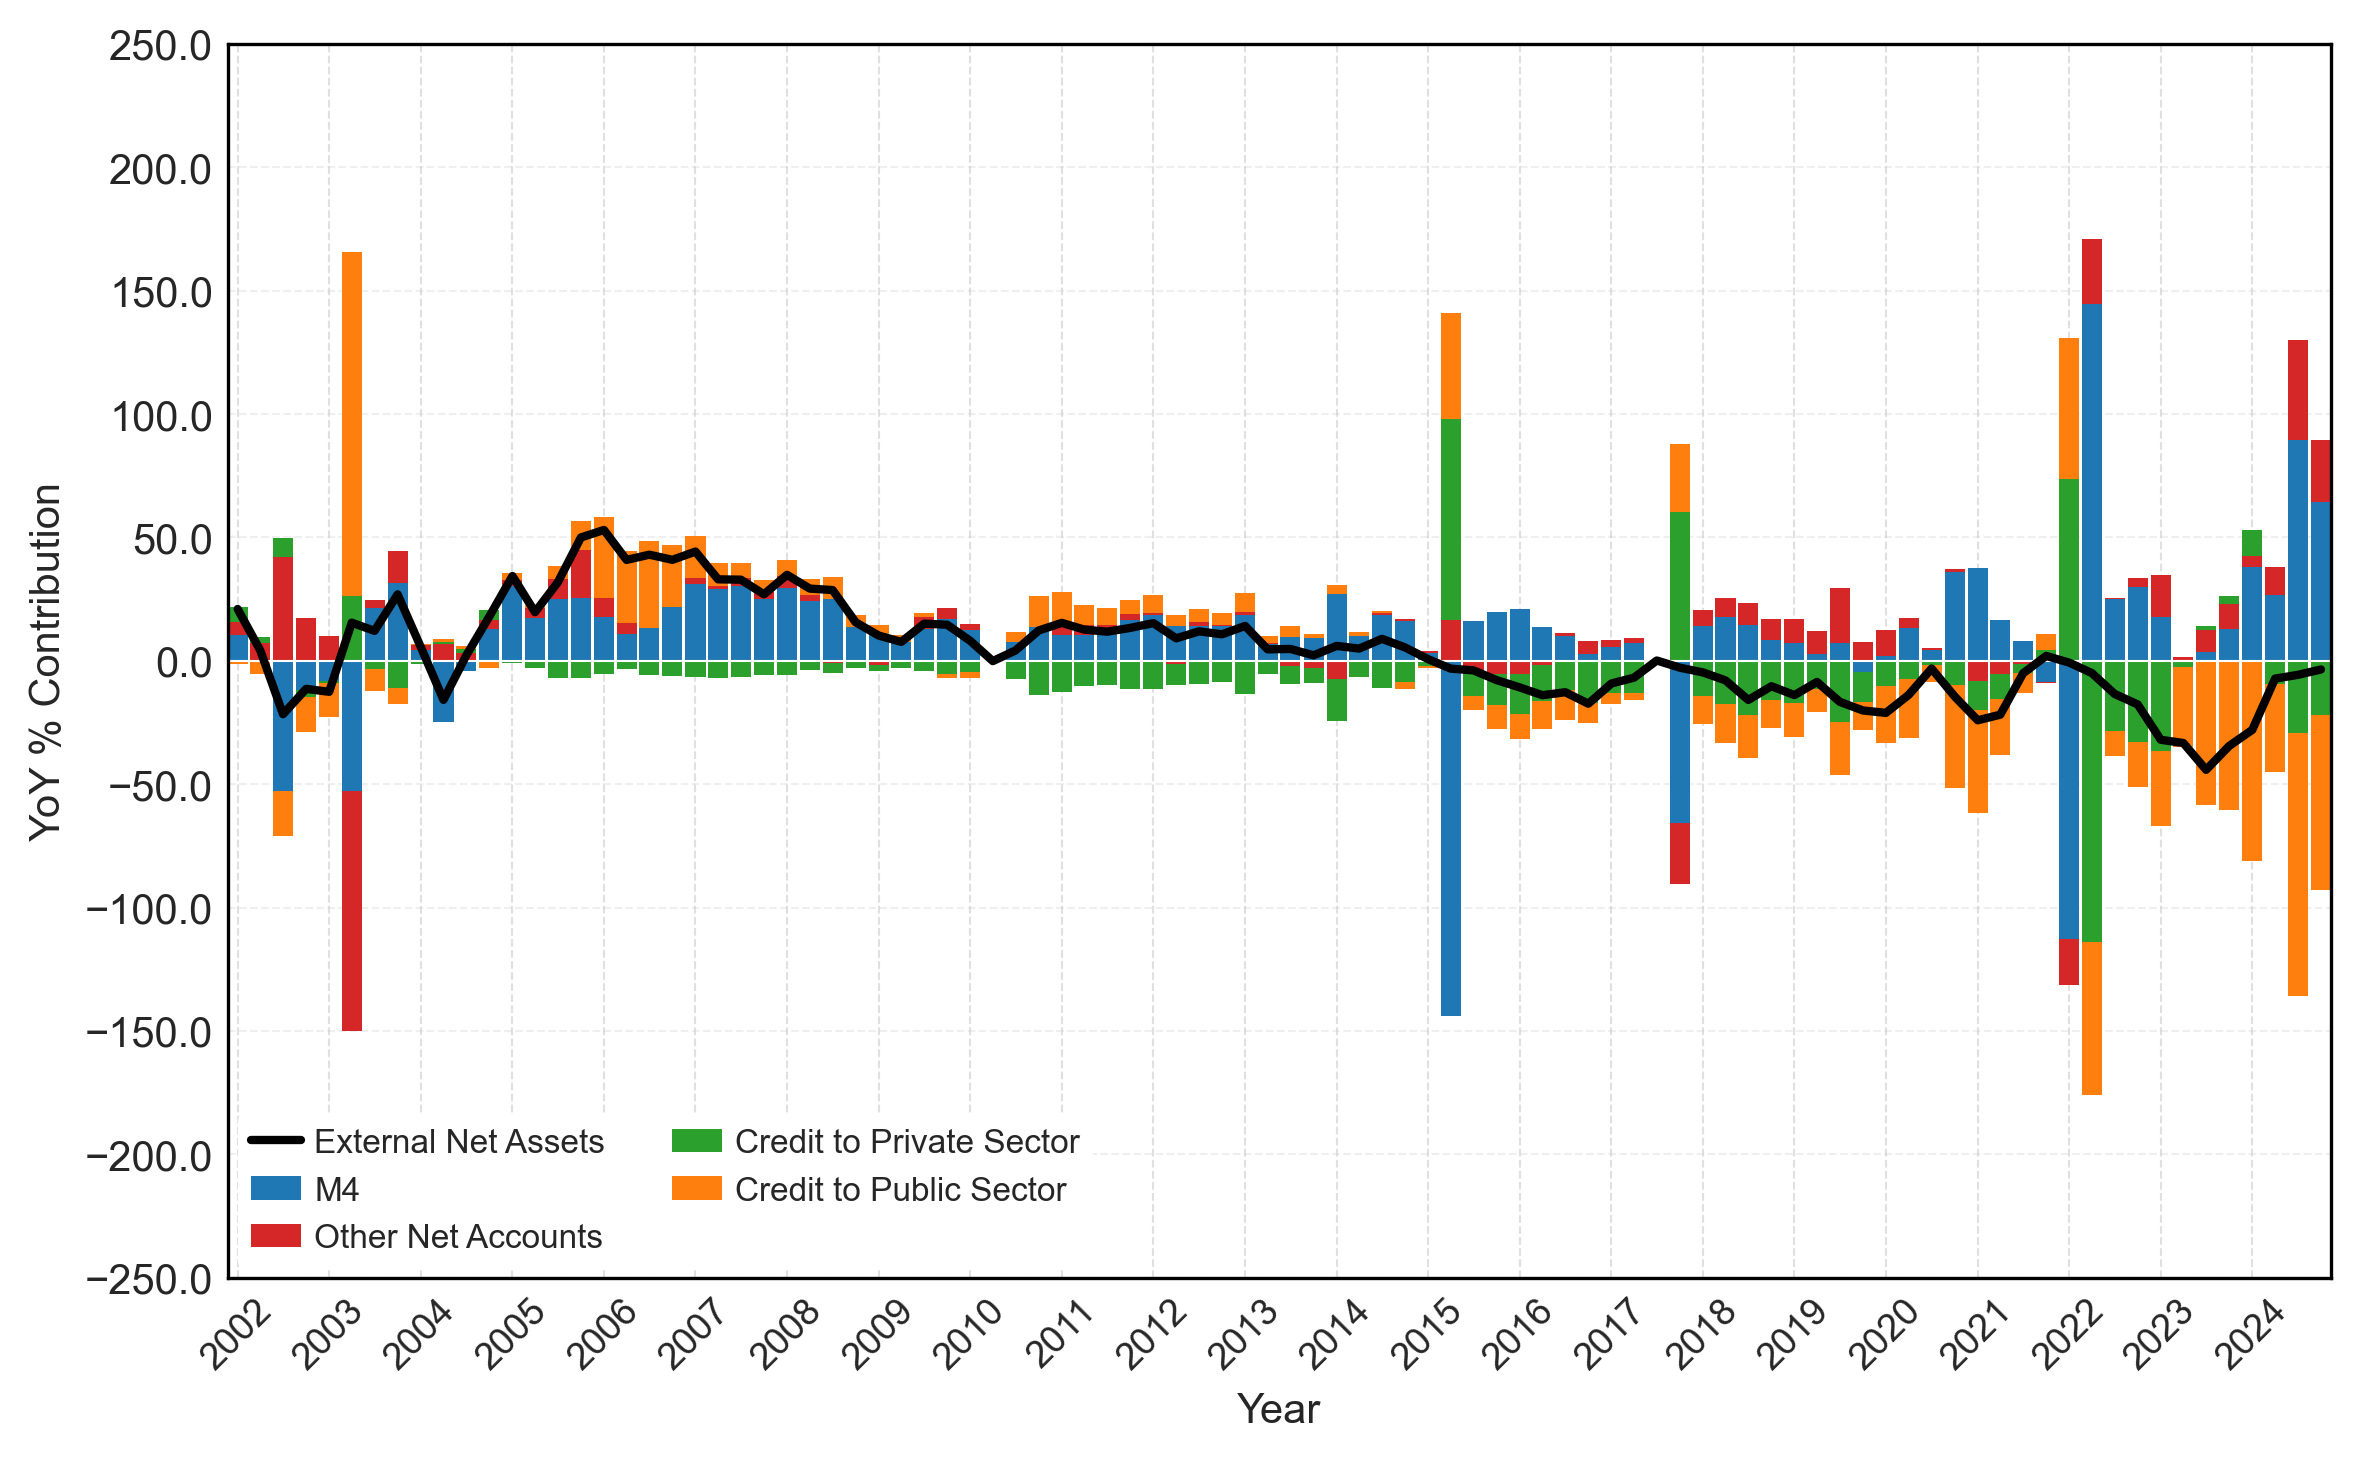

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.ticker import StrMethodFormatter


# ─── 0) Asegurarnos de que todas las columnas sean numéricas (float) ────────────
def to_numeric_col(series):
    if series.dtype == object or series.dtype == "string":
        return (
            series
            .astype(str)
            .str.replace("%", "", regex=False)
            .str.replace(",", "", regex=False)
            .astype(float)
        )
    else:
        return series.astype(float)


for col in contribution_ext_assets_df.columns:
    contribution_ext_assets_df[col] = to_numeric_col(contribution_ext_assets_df[col])

# ─── 1) Definir qué columnas van en barras
#      (excluimos "ACTIVOS EXTERNOS NETOS" para que sea la línea)
bar_cols = [
    c for c in contribution_ext_assets_df.columns
    if c != "ACTIVOS EXTERNOS NETOS"
]

# bar_cols = ["M4", "CRÉDITO AL SECTOR PÚBLICO", "CRÉDITO AL SECTOR PRIVADO", "OTRAS CUENTAS NETAS"]

# ─── 2) Dividir esas columnas en pos/neg
pos_df = contribution_ext_assets_df[bar_cols].clip(lower=0)
neg_df = contribution_ext_assets_df[bar_cols].clip(upper=0)

# ─── 3) Asignar colores
color_map = {
    "ACTIVOS EXTERNOS NETOS": "#1f77b4",  # (solo para la línea)
    "M4": "#1f77b4",  # azul, para la barra M4
    "CRÉDITO AL SECTOR PÚBLICO": "#ff7f0e",  # naranja
    "CRÉDITO AL SECTOR PRIVADO": "#2ca02c",  # verde
    "OTRAS CUENTAS NETAS": "#d62728",  # rojo
}
bar_colors = [color_map[col] for col in bar_cols]

# ─── 4) Diccionario para traducir leyenda al inglés
label_map = {
    "M4": "M4",
    "CRÉDITO AL SECTOR PÚBLICO": "Credit to Public Sector",
    "CRÉDITO AL SECTOR PRIVADO": "Credit to Private Sector",
    "OTRAS CUENTAS NETAS": "Other Net Accounts",
    "ACTIVOS EXTERNOS NETOS": "External Net Assets",
}

# ─── 5) Crear figura y eje ───────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

# ─── 6A) Graficar barras POSITIVAS encima de cero ────────────────────────────────
bottom_pos = np.zeros(len(contribution_ext_assets_df), dtype=float)
for i, col in enumerate(bar_cols):
    vals = pos_df[col].values
    ax.bar(
        contribution_ext_assets_df.index,
        vals,
        bottom=bottom_pos,
        color=bar_colors[i],
        width=80,
        label=col,
        align="center"
    )
    bottom_pos += vals

# ─── 6B) Graficar barras NEGATIVAS por debajo de cero ────────────────────────────
bottom_neg = np.zeros(len(contribution_ext_assets_df), dtype=float)
for i, col in enumerate(bar_cols):
    vals = neg_df[col].values
    ax.bar(
        contribution_ext_assets_df.index,
        vals,
        bottom=bottom_neg,
        color=bar_colors[i],
        width=80,
        align="center"
    )
    bottom_neg += vals

ax.axhline(0, color="w", linewidth=0.5)

# ─── 7) Superponer la línea “ACTIVOS EXTERNOS NETOS” en negro ────────────────────
ax.plot(
    contribution_ext_assets_df.index,
    contribution_ext_assets_df["ACTIVOS EXTERNOS NETOS"].values,
    color="black",
    linewidth=2,
    label="ACTIVOS EXTERNOS NETOS"
)

# ─── 8) Formatear eje Y ──────────────────────────────────────────────────────────
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=50))
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.1f}"))
ax.set_ylabel("YoY % Contribution", fontsize=10)

# ─── 9) Configurar eje X para mostrar solo el año ─────────────────────────────────
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=9)

# ─── 10) Eliminar márgenes en X ───────────────────────────────────────────────────
ax.margins(x=0)

# ─── 11) Etiquetas y título ───────────────────────────────────────────────────────
ax.set_xlabel("Year", fontsize=10)

# ─── 12) Construir la leyenda y traducir al inglés ────────────────────────────────
handles, labels = ax.get_legend_handles_labels()
translated_labels = [label_map.get(lbl, lbl) for lbl in labels]
ax.legend(
    handles,
    translated_labels,
    loc="lower left",
    ncol=2,
    fontsize=8,
    frameon=True,
    facecolor="white",
    edgecolor="none",
    handletextpad=0.4,
    borderaxespad=0.3,
)

ax.set_ylim(-250, 250)

# ─── 13) Cuadrícula horizontal ligera ─────────────────────────────────────────────
ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.3)

plt.tight_layout()

out_path = config.DATA_DIR / 'figures' / 'contribution_external_assets.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()


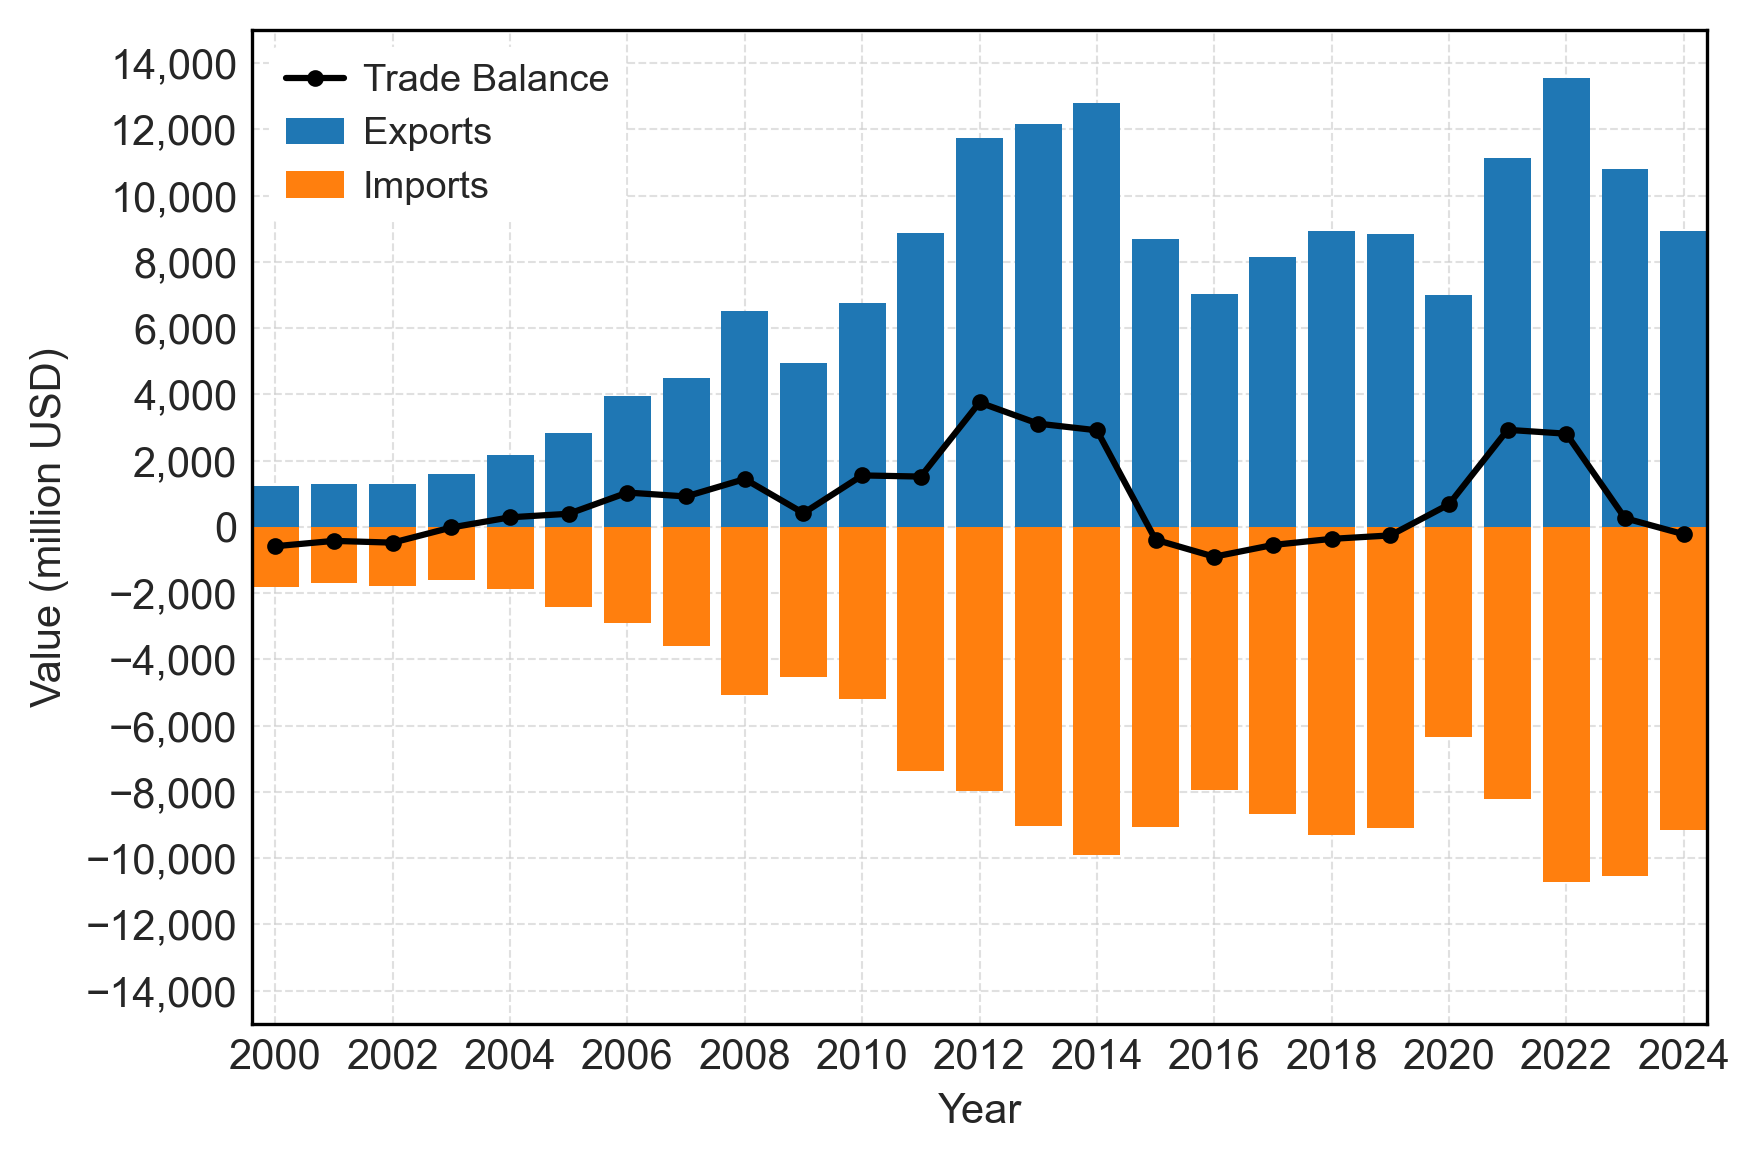

In [57]:
file = config.DATA_DIR / 'various_thesis_data/exports_imports_fob.csv'
trade_balance_df = pd.read_csv(file, delimiter='\t')
trade_balance_df['EXPORTS'] = pd.to_numeric(trade_balance_df['EXPORTS'].str.replace(',', ''), errors='coerce')
trade_balance_df['IMPORTS'] = pd.to_numeric(trade_balance_df['IMPORTS'].str.replace(',', ''), errors='coerce')
trade_balance_df['IMPORTS'] = trade_balance_df['IMPORTS'] * -1
trade_balance_df['TRADE BALANCE'] = trade_balance_df['EXPORTS'] + trade_balance_df['IMPORTS']
trade_balance_df.set_index('YEAR', inplace=True)

apply_base_style()

fig, ax = plt.subplots(figsize=(6, 4))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
exp_col, imp_col = colors[0], colors[1]

# X-axis formatting for years
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

# bar plots
ax.bar(trade_balance_df.index, trade_balance_df['EXPORTS'], label='Exports', color=exp_col)
ax.bar(trade_balance_df.index, trade_balance_df['IMPORTS'], label='Imports', color=imp_col)

# line plot for balance
ax.plot(trade_balance_df.index, trade_balance_df['TRADE BALANCE'], label='Trade Balance', color='black', marker='.')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2000))
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

ax.margins(x=0)
ax.set_ylim(-15000, 15000)

# labels, title, legend
ax.set_xlabel('Year')
ax.set_ylabel('Value (million USD)')
ax.legend(loc='best')

# layout
plt.tight_layout()

# save
out_path = config.DATA_DIR / 'figures' / 'trade_balance.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')

plt.show()

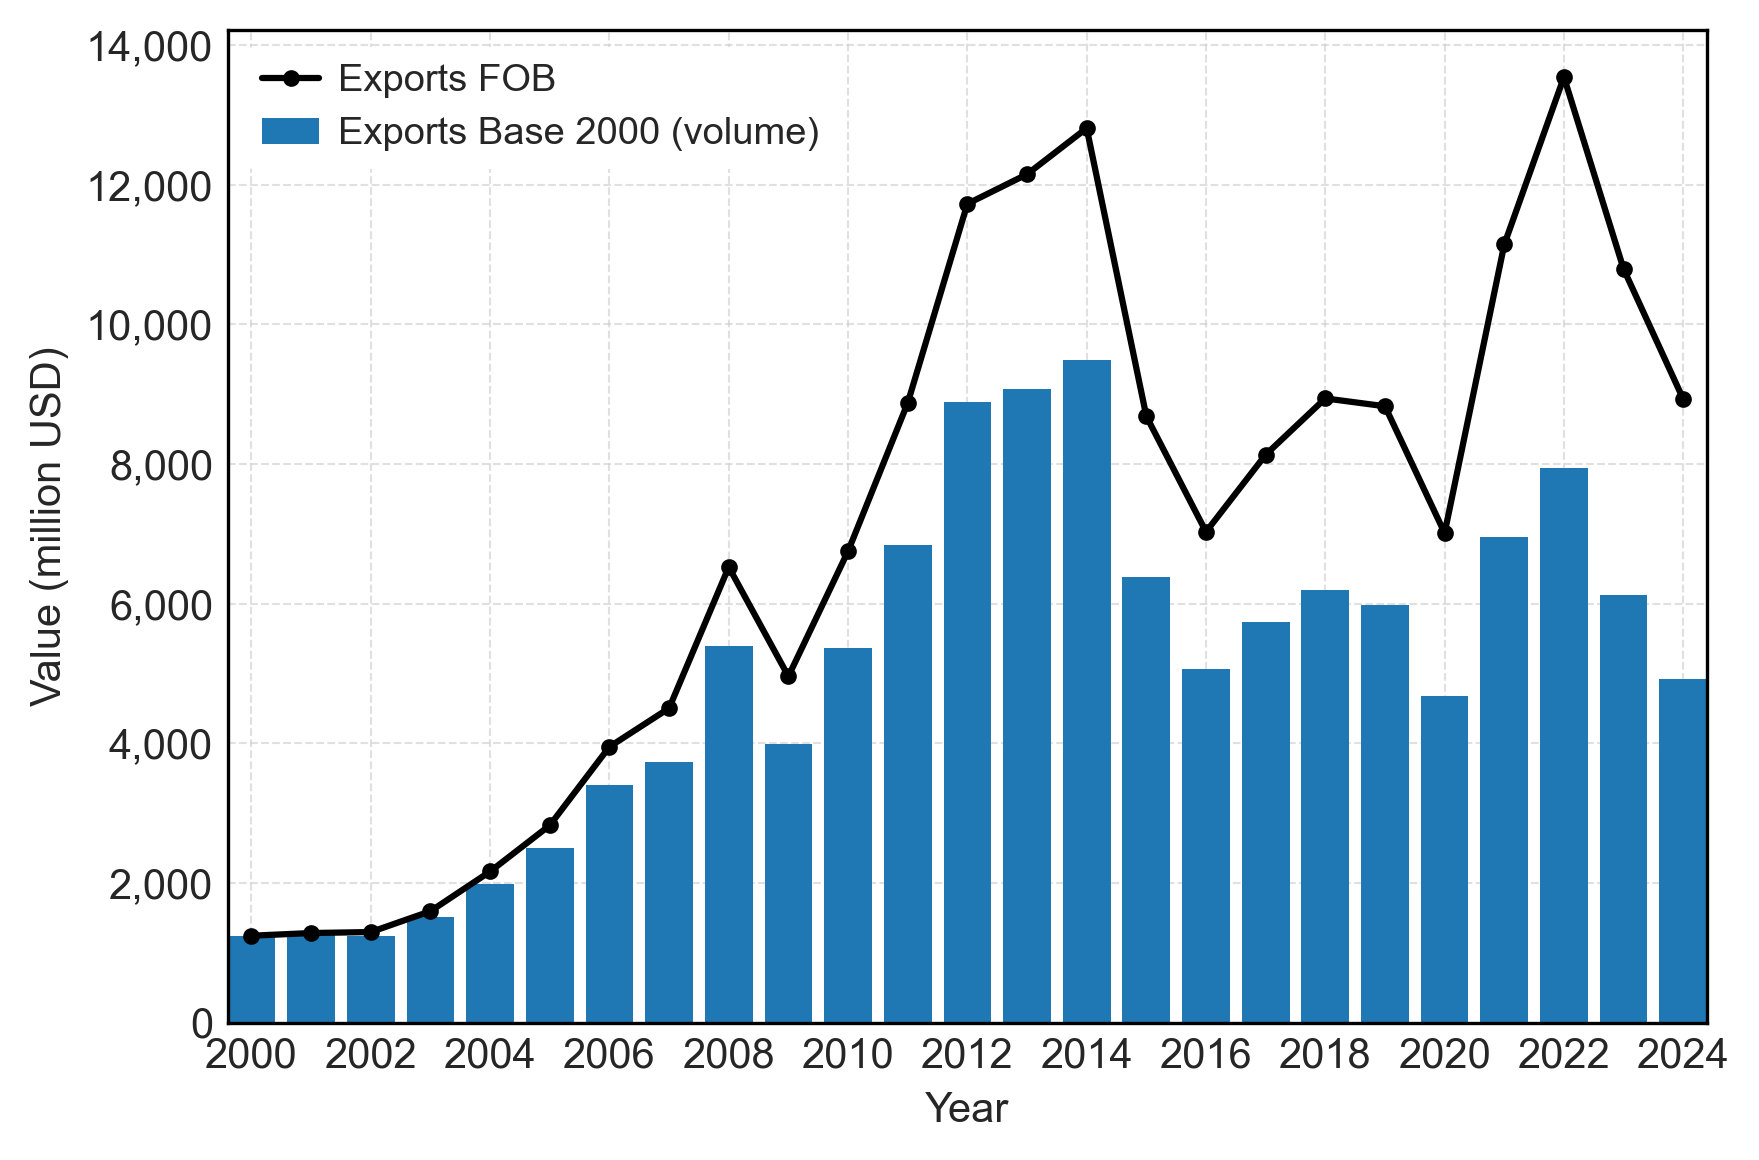

In [60]:
file = config.DATA_DIR / 'various_thesis_data/export.csv'
export_df = pd.read_csv(file, delimiter='\t')
export_df['EXPORT FOB'] = pd.to_numeric(export_df['EXPORT FOB'].str.replace(',', ''), errors='coerce')
export_df['EXPORT BASE 2000'] = pd.to_numeric(export_df['EXPORT BASE 2000'].str.replace(',', ''), errors='coerce')
export_df.set_index('YEAR', inplace=True)

apply_base_style()

fig, ax = plt.subplots(figsize=(6, 4))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
exp_col, imp_col = colors[0], colors[1]

# X-axis formatting for years
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

# bar plots
ax.bar(export_df.index, export_df['EXPORT BASE 2000'], label='Exports Base 2000 (volume)', color=exp_col)

# line plot for balance
ax.plot(export_df.index, export_df['EXPORT FOB'], label='Exports FOB', color='black', marker='.')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2000))
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

ax.margins(x=0)
# ax.set_ylim(-15000, 15000)

# labels, title, legend
ax.set_xlabel('Year')
ax.set_ylabel('Value (million USD)')
ax.legend(loc='best')

# layout
plt.tight_layout()

# save
out_path = config.DATA_DIR / 'figures' / 'exports.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')

plt.show()

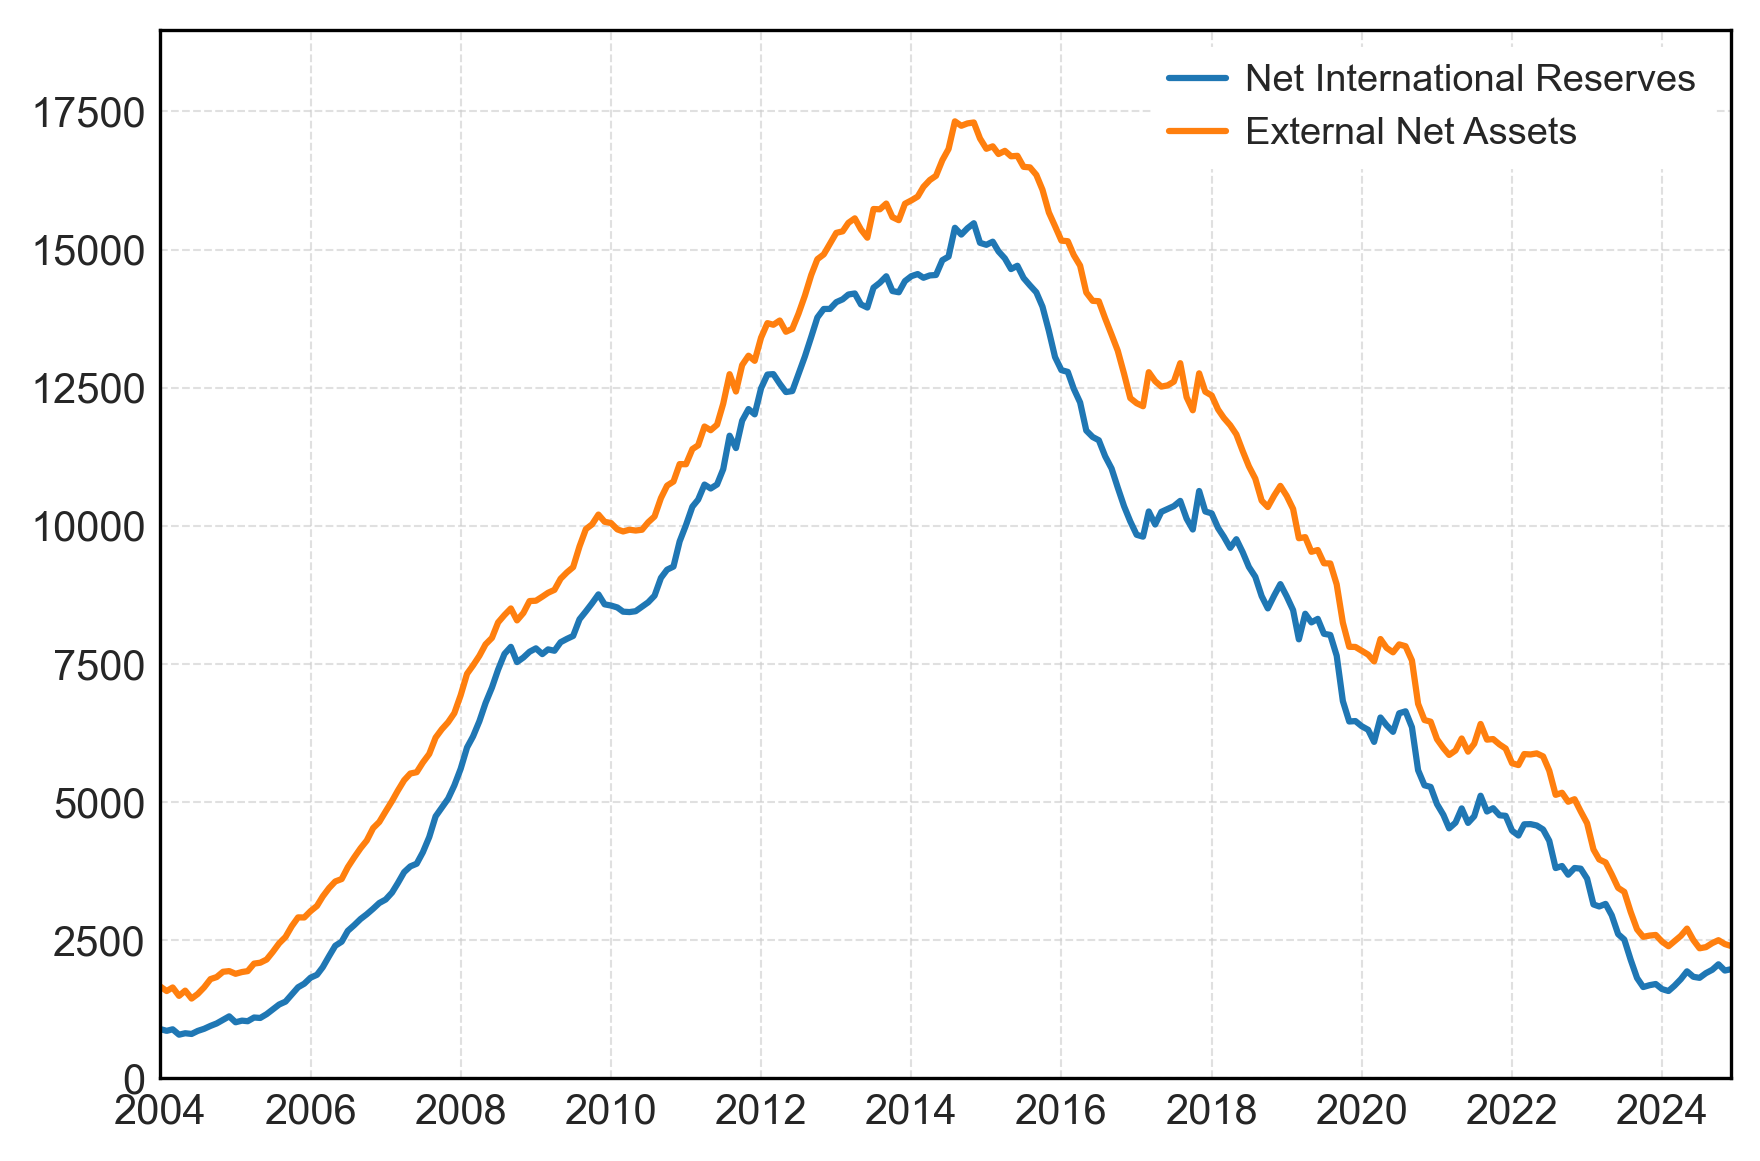

In [65]:
file = config.DATA_DIR / 'various_thesis_data/rin_vs_aen.csv'
rin_vs_aen_df = pd.read_csv(file, delimiter='\t')
rin_vs_aen_df['RIN'] = pd.to_numeric(rin_vs_aen_df['RIN'].str.replace(',', ''), errors='coerce')
rin_vs_aen_df['AEN'] = pd.to_numeric(rin_vs_aen_df['AEN'].str.replace(',', ''), errors='coerce')
rin_vs_aen_df[['month', 'year']] = rin_vs_aen_df["MES"].str.split(expand=True)
rin_vs_aen_df['date_dt'] = pd.to_datetime(
    rin_vs_aen_df['year'].astype(int).astype(str) + '-' +
    rin_vs_aen_df['month'].map(month_map).astype(str) + '-01'
)
rin_vs_aen_df.set_index('date_dt', inplace=True)
rin_vs_aen_df.drop(['month', 'year', 'MES'], axis=1, inplace=True)

fig, ax = plot_line_chart(rin_vs_aen_df.index, [rin_vs_aen_df['RIN'], rin_vs_aen_df['AEN']],
                          ['Net International Reserves', 'External Net Assets'], filename='rin_vs_aen.pdf',
                          y_min_zero=True)


date_dt
2023-02-28    625.24
2023-03-31    365.47
2023-04-30    400.55
2023-05-31    379.39
2023-06-30    441.65
2023-07-31    555.05
2023-08-31    517.61
2023-09-30    350.99
2023-10-31    229.57
2023-11-30    226.54
2023-12-31    241.50
2024-01-31    247.51
2024-02-29    226.47
2024-03-31    224.13
2024-04-30    209.19
2024-05-31    380.79
2024-06-30    274.83
2024-07-31    200.90
2024-08-31    193.50
2024-09-30    180.40
2024-10-31    177.90
2024-11-30    181.90
2024-12-31     87.30
Freq: ME, Name: currency, dtype: float64

In [99]:
quarter_ends

DatetimeIndex(['2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
      

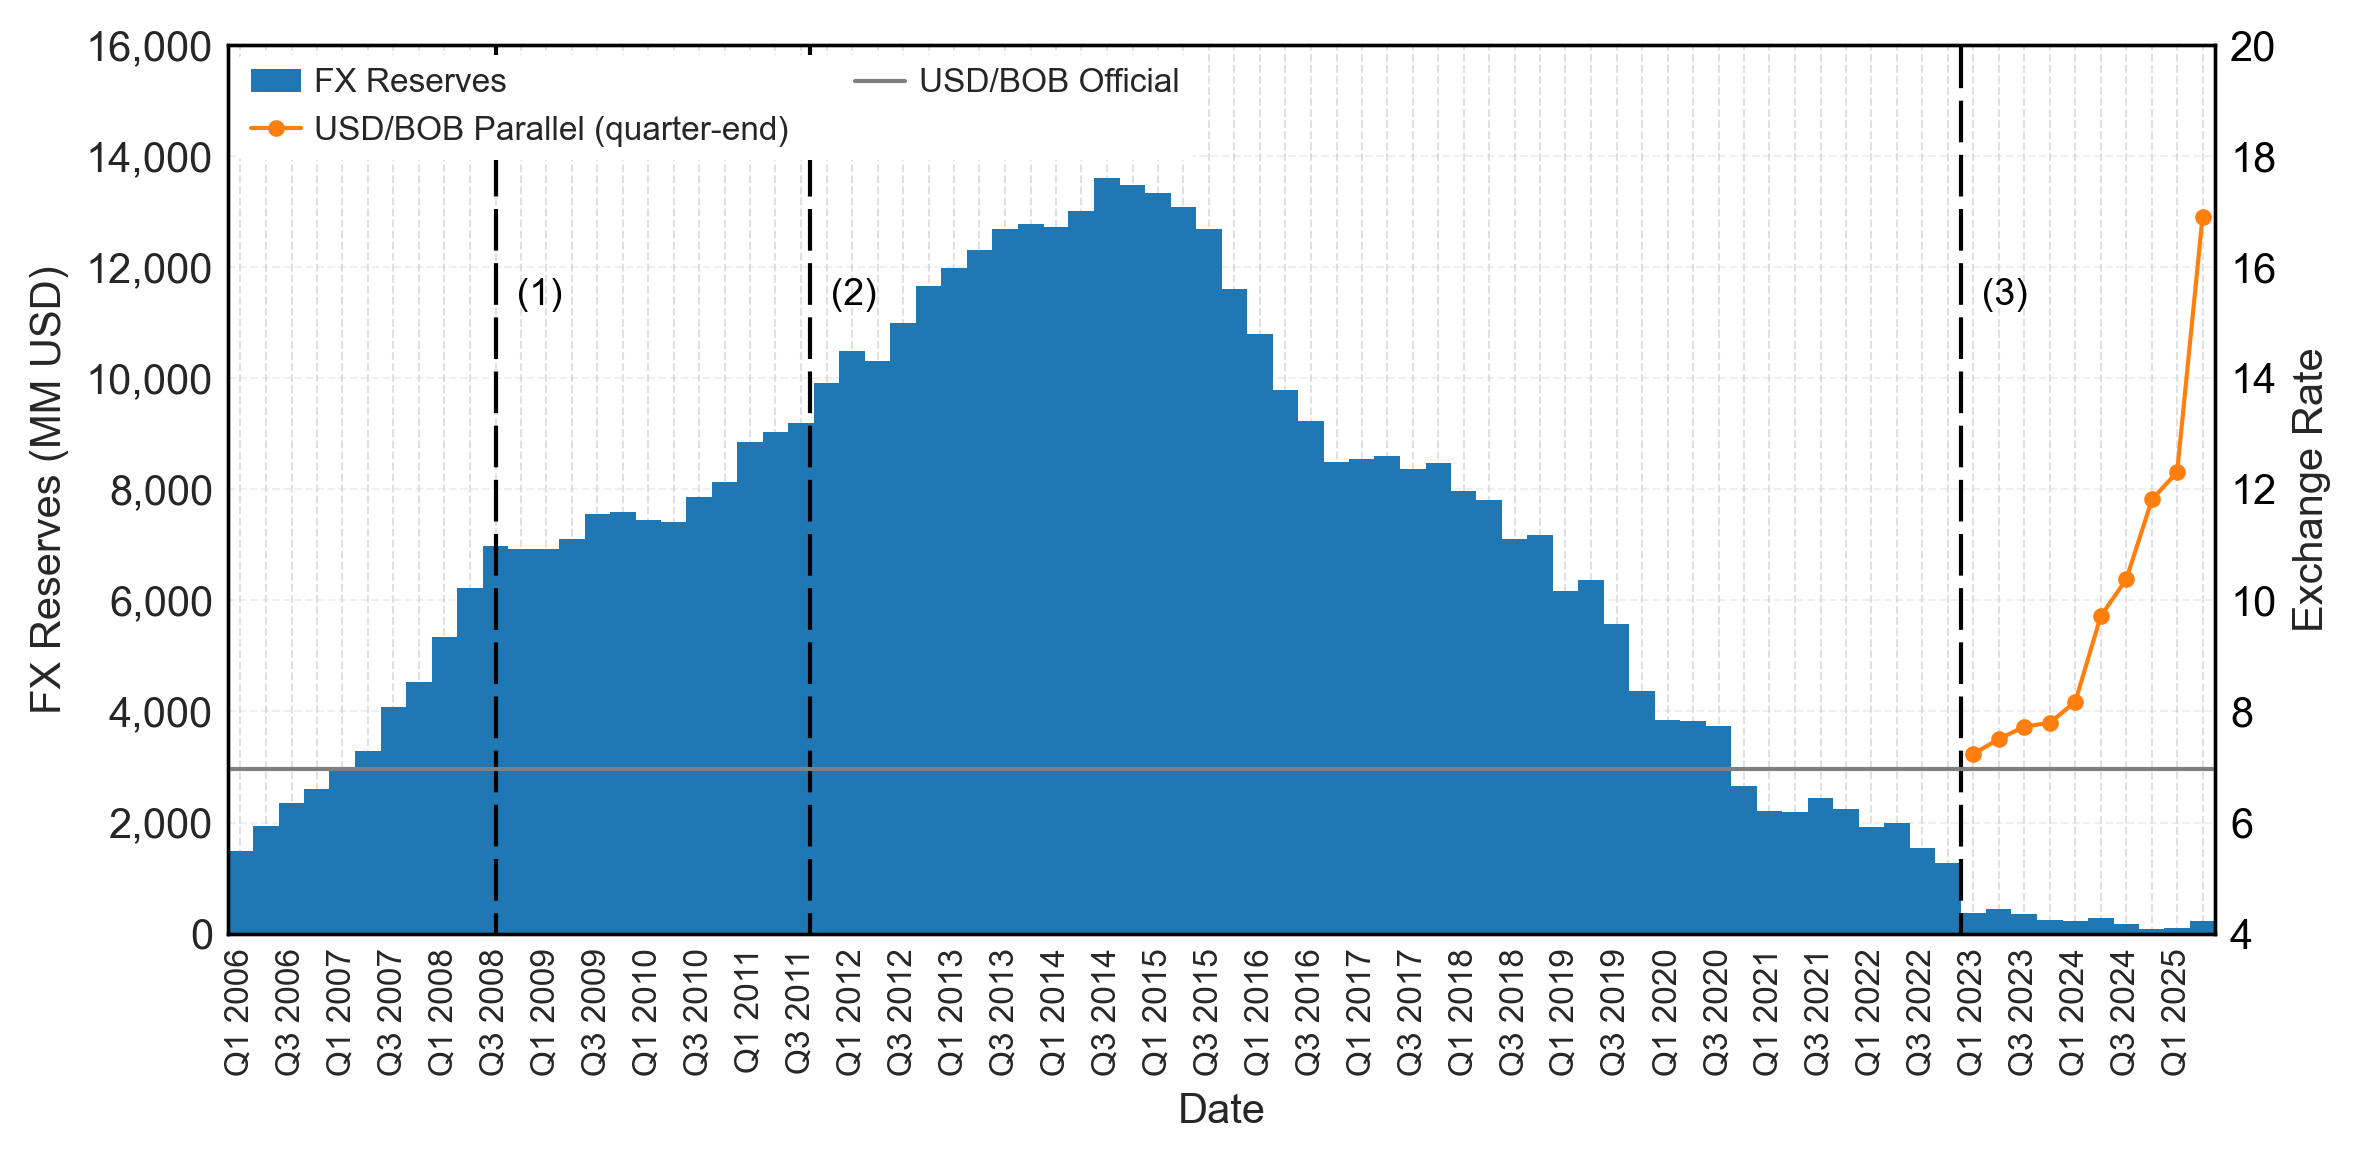

In [145]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.ticker as ticker


# ─── 0) Asegurarnos de que todas las columnas sean numéricas (float) ────────────
def to_numeric_col(series):
    if series.dtype == object or series.dtype == "string":
        return (
            series
            .astype(str)
            .str.replace("%", "", regex=False)
            .str.replace(",", "", regex=False)
            .astype(float)
        )
    else:
        return series.astype(float)


for col in contribution_ext_assets_df.columns:
    contribution_ext_assets_df[col] = to_numeric_col(contribution_ext_assets_df[col])

# ─── 1) Preparar reservas FX exactamente al final de cada trimestre
fx_reserves_complete = reserves_df[['date_dt', 'currency']].copy()
fx_reserves_complete.set_index('date_dt', inplace=True)
fx_reserves_complete.index = fx_reserves_complete.index + pd.offsets.MonthEnd(0)
fx_reserves_complete = fx_reserves_complete['currency'].resample('QE').last()

# ─── 2) Re-muestrear smoothed_curve y crypto_df['sell'] a fin de trimestre
smoothed_qe = smoothed_curve.resample('QE').last()
crypto_qe = crypto_df['sell'].resample('QE').last()

# ─── 3) Plot
fig, ax1 = plt.subplots(figsize=(8, 4))
apply_base_style()

# — BARRAS (FX Reserves) en naranja para evitar conflicto con líneas —
quarter_ends = fx_reserves_complete.index
if len(quarter_ends) >= 2:
    delta_days = (quarter_ends[1] - quarter_ends[0]).days
    bar_width = delta_days + 1  # ancho completo para que las barras se toquen
else:
    bar_width = 80

ax1.bar(
    quarter_ends,
    fx_reserves_complete.values,
    width=bar_width,
    color='#1f77b4',
    align='center',
    label='FX Reserves',
    antialiased=False,
)
ax1.set_xlabel('Date')
ax1.set_ylabel('FX Reserves (MM USD)')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.tick_params(axis='y')

ax1.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.3)

# — EJE SECUNDARIO PARA LÍNEAS —
ax2 = ax1.twinx()
ax2.plot(
    smoothed_qe.index,
    smoothed_qe.values,
    label='USD/BOB Parallel (quarter-end)',
    color='#ff7f0e',
    linewidth=1,
    marker='.',

)
# Línea USDT/BOB en verde
# ax2.plot(
#     crypto_qe.index,
#     crypto_qe.values,
#     label='USDT/BOB (Binance, quarter-end)',
#     color='#ff7f0e',
#     linewidth=1,
#     marker='.',
# )
# Línea oficial USD/BOB en rojo, punteada
ax2.axhline(
    y=6.97,
    color='#7f7f7f',
    linewidth=1,
    label='USD/BOB Official',
)
ax2.set_ylabel('Exchange Rate')
ax2.tick_params(axis='y', labelcolor='black')

# Desactivar grid en ax2
ax2.grid(False)

# — ETIQUETAS X en formato “Q# YYYY”, mostrando cada dos trimestres —
labels = [
    f"Q{pd.Period(q, freq='Q').quarter} {pd.Period(q, freq='Q').year}"
    for q in quarter_ends
]
for i in range(len(labels)):
    if i % 2 == 1:
        labels[i] = ''

ax1.set_xticks(quarter_ends)
ax1.set_xticklabels(labels, rotation=90, fontsize=8)

# — LEYENDA COMBINADA —
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(
    h1 + h2,
    l1 + l2,
    loc='upper left',
    ncol=2,
    fontsize=8,
    frameon=True,
    facecolor='white',
    edgecolor='none',
    handletextpad=0.4,
    borderaxespad=0.3,
)

# — AJUSTES FINALES —
ax1.margins(x=0)
ax2.margins(x=0)

ax1.yaxis.set_major_locator(ticker.MultipleLocator(2000))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.set_ylim(0, 16000)
ax2.set_ylim(4, 20)
y_top = ax1.get_ylim()[1]
ax1.axvline(x=pd.to_datetime('2008-09-30'), color='k', linestyle=(5, (10, 3)), linewidth=1)
ax1.text(pd.to_datetime('2008-09-30'), y_top * 0.7, '  (1)', ha='left', va='bottom', fontsize=9, color='k')
ax1.axvline(x=pd.to_datetime('2011-11-02'), color='k', linestyle=(5, (10, 3)), linewidth=1)
ax1.text(pd.to_datetime('2011-11-02'), y_top * 0.7, '  (2)', ha='left', va='bottom', fontsize=9, color='k')
ax1.axvline(x=pd.to_datetime('2023-02-15'), color='k', linestyle=(5, (10, 3)), linewidth=1)
ax1.text(pd.to_datetime('2023-02-15'), y_top * 0.7, '  (3)', ha='left', va='bottom', fontsize=9, color='k')

plt.tight_layout()

out_path = config.DATA_DIR / 'figures' / 'reserves_vs_exchange_rate.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()


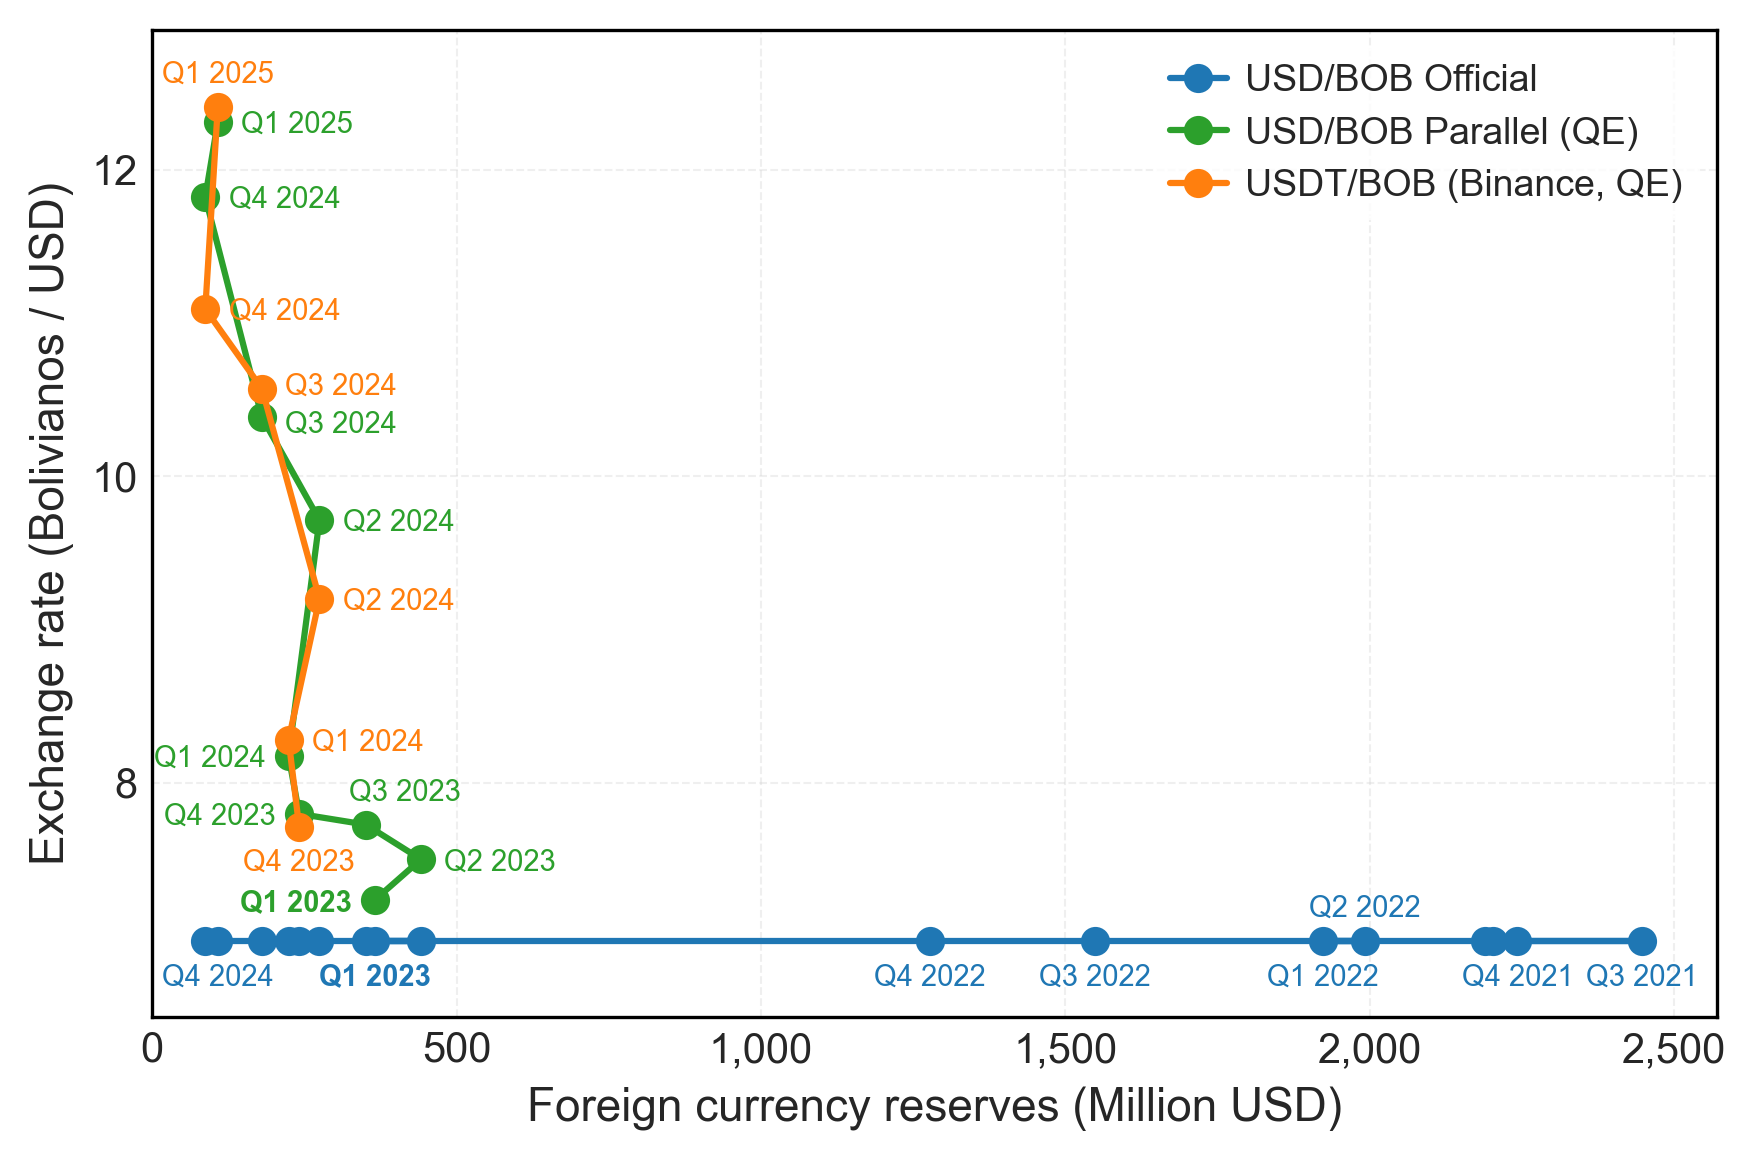

In [197]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# ───────────────────────────────────────────────────────────────────────────────
# 0) (Optional) Rebuild your quarter‐end series if not already available:
#
#    # (a) FX Reserves: ensure you have a DataFrame `reserves_df` with a datetime
#    #     column "date_dt" and a numeric column "currency" (USD millions). Then:
#    fx_reserves_complete = (
#        reserves_df
#        .set_index('date_dt')['currency']
#        .resample('QE')  # quarter‐end frequency
#        .last()          # take the last value in each quarter
#    )
#
#    # (b) USD/BOB Parallel (smoothed): assume you have a Series `smoothed_curve`
#    #     indexed by dates. Then:
#    smoothed_qe = smoothed_curve.resample('QE').last()
#
#    # (c) USDT/BOB Crypto: assume you have a DataFrame `crypto_df` with a
#    #     datetime index and a column "sell" (the exchange rate). Then:
#    crypto_qe = crypto_df['sell'].resample('QE').last()
#
#    # After running the three lines above, you should have:
#    #   fx_reserves_complete  (Series, index = quarter‐end dates, values = reserves)
#    #   smoothed_qe           (Series, index = quarter‐end dates, values = parallel rate)
#    #   crypto_qe             (Series, index = quarter‐end dates, values = crypto rate)
#
#    # If you already have those three Series, skip this block.
# ───────────────────────────────────────────────────────────────────────────────

# ───────────────────────────────────────────────────────────────────────────────
# 1) Build a unified DataFrame with FX reserves + Official / Parallel / Crypto rates
# ───────────────────────────────────────────────────────────────────────────────

# (Make sure fx_reserves_complete, smoothed_qe, and crypto_qe exist as described above)

df = pd.DataFrame(index=fx_reserves_complete.index)
df['reserves'] = fx_reserves_complete.values
df['official'] = 6.97  # constant official USD/BOB
df['parallel'] = smoothed_qe.reindex(df.index)  # may contain NaN for some quarters
df['crypto'] = crypto_qe.reindex(df.index)  # may contain NaN for some quarters

# ───────────────────────────────────────────────────────────────────────────────
# 2) FILTER: keep only Q1 2021 onward, then REMOVE Q2 2025 entirely
# ───────────────────────────────────────────────────────────────────────────────

start_q1_2021 = pd.to_datetime('2021-03-31')
df = df.loc[df.index >= start_q1_2021].copy()

# Drop Q2 2025 (i.e., 2025-06-30) if present:
q2_2025 = pd.to_datetime('2025-06-30')
if q2_2025 in df.index:
    df = df.drop(q2_2025)

# ───────────────────────────────────────────────────────────────────────────────
# 3) Compute quarter labels (e.g. “Q1 2021”) for the filtered index
# ───────────────────────────────────────────────────────────────────────────────

labels = {
    date: f"Q{pd.Period(date, freq='Q').quarter} {pd.Period(date, freq='Q').year}"
    for date in df.index
}

# ───────────────────────────────────────────────────────────────────────────────
# 4) Decide which Official‐rate points to label
#    (We’ll tag only a small subset of quarters on the blue line)
# ───────────────────────────────────────────────────────────────────────────────

official_offsets = {
    pd.to_datetime('2021-09-30'): (0.0, -0.15),  # Q3 2021
    pd.to_datetime('2021-12-31'): (0.0, -0.15),  # Q4 2021
    pd.to_datetime('2022-03-31'): (0.0, -0.15),  # Q1 2022
    pd.to_datetime('2022-06-30'): (0.0, 0.30),  # Q2 2022
    pd.to_datetime('2022-09-30'): (0.0, -0.15),  # Q3 2022
    pd.to_datetime('2022-12-31'): (0.0, -0.15),  # Q4 2022
    pd.to_datetime('2023-03-31'): (0.0, -0.15),  # Q1 2023
    pd.to_datetime('2024-12-31'): (20, -0.15)  #Q4 2024
}

# ───────────────────────────────────────────────────────────────────────────────
# 5) Build “default” offset dictionaries for Parallel and Crypto labels
#    (Every quarter that actually has a parallel/crypto value gets a small upward nudge)
# ───────────────────────────────────────────────────────────────────────────────

parallel_offsets = {
    pd.to_datetime('2021-03-31'): (0.0, 0.12),  # Q1 2021
    pd.to_datetime('2021-06-30'): (0.0, 0.12),  # Q2 2021
    pd.to_datetime('2021-09-30'): (0.0, 0.12),  # Q3 2021
    pd.to_datetime('2021-12-31'): (0.0, 0.12),  # Q4 2021
    pd.to_datetime('2022-03-31'): (0.0, 0.12),  # Q1 2022
    pd.to_datetime('2022-06-30'): (0.0, 0.12),  # Q2 2022
    pd.to_datetime('2022-09-30'): (0.0, 0.12),  # Q3 2022
    pd.to_datetime('2022-12-31'): (0.0, 0.12),  # Q4 2022
    pd.to_datetime('2023-03-31'): (-130, -0.11),  # Q1 2023
    pd.to_datetime('2023-06-30'): (130, -0.11),  # Q2 2023
    pd.to_datetime('2023-09-30'): (65, 0.12),  # Q3 2023
    pd.to_datetime('2023-12-31'): (-130, -0.11),  # Q4 2023
    pd.to_datetime('2024-03-31'): (-130, -0.11),  # Q1 2024
    pd.to_datetime('2024-06-30'): (130, -0.11),  # Q2 2024
    pd.to_datetime('2024-09-30'): (130, -0.14),  # Q3 2024
    pd.to_datetime('2024-12-31'): (130, -0.11),  # Q4 2024
    pd.to_datetime('2025-03-31'): (130, -0.11),  # Q1 2025
}

crypto_offsets = {
    pd.to_datetime('2021-03-31'): (0.0, 0.12),  # Q1 2021
    pd.to_datetime('2021-06-30'): (0.0, 0.12),  # Q2 2021
    pd.to_datetime('2021-09-30'): (0.0, 0.12),  # Q3 2021
    pd.to_datetime('2021-12-31'): (0.0, 0.12),  # Q4 2021
    pd.to_datetime('2022-03-31'): (0.0, 0.12),  # Q1 2022
    pd.to_datetime('2022-06-30'): (0.0, 0.12),  # Q2 2022
    pd.to_datetime('2022-09-30'): (0.0, 0.12),  # Q3 2022
    pd.to_datetime('2022-12-31'): (0.0, 0.12),  # Q4 2022
    pd.to_datetime('2023-03-31'): (0.0, 0.12),  # Q1 2023
    pd.to_datetime('2023-06-30'): (0.0, 0.12),  # Q2 2023
    pd.to_datetime('2023-09-30'): (0.0, 0.12),  # Q3 2023
    pd.to_datetime('2023-12-31'): (0.0, -0.32),  # Q4 2023
    pd.to_datetime('2024-03-31'): (130, -0.11),  # Q1 2024
    pd.to_datetime('2024-06-30'): (130, -0.11),  # Q2 2024
    pd.to_datetime('2024-09-30'): (130, -0.08),  # Q3 2024
    pd.to_datetime('2024-12-31'): (130, -0.11),  # Q4 2024
    pd.to_datetime('2025-03-31'): (0.0, 0.12),  # Q1 2025
}

# If you later discover collisions for specific quarters, you can override:
# parallel_offsets[pd.to_datetime('2023-06-30')] = (+20, +0.20)  # example custom tweak
# crypto_offsets[pd.to_datetime('2024-12-31')]    = (+30, -0.25)  # another custom tweak

# ───────────────────────────────────────────────────────────────────────────────
# 6) Create the “phase‐plot” (Reserves on X, Exchange Rate on Y)
# ───────────────────────────────────────────────────────────────────────────────

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

# (a) Official USD/BOB — Blue line + circle markers
ax.plot(
    df['reserves'],
    df['official'],
    marker='o',
    color='#1f77b4',
    linewidth=1.5,
    label='USD/BOB Official',
)

# (b) Parallel USD/BOB — Green line + circle markers (where not NaN)
mask_par = ~df['parallel'].isna()
ax.plot(
    df.loc[mask_par, 'reserves'],
    df.loc[mask_par, 'parallel'],
    marker='o',
    color='#2ca02c',
    linewidth=1.5,
    label='USD/BOB Parallel (QE)',
)

# (c) USDT/BOB (Crypto) — Orange line + circle markers (where not NaN)
mask_cr = ~df['crypto'].isna()
ax.plot(
    df.loc[mask_cr, 'reserves'],
    df.loc[mask_cr, 'crypto'],
    marker='o',
    color='#ff7f0e',
    linewidth=1.5,
    label='USDT/BOB (Binance, QE)',
)

# ───────────────────────────────────────────────────────────────────────────────
# 7) Annotate points: selective for Official, default‐offset for Parallel and Crypto
# ───────────────────────────────────────────────────────────────────────────────

for date, row in df.iterrows():
    x0 = row['reserves']
    qlabel = labels[date]

    # 7a) OFFICIAL (Blue) → use official_offsets, bold Q1 2023
    y0_off = row['official']
    if date in official_offsets:
        dx_off, dy_off = official_offsets[date]
        weight = 'bold' if date == pd.to_datetime('2023-03-31') else 'normal'
        ax.text(
            x0 + dx_off,
            y0_off + dy_off,
            labels[date],
            ha='center',
            va='top',
            fontsize=7,
            color='#1f77b4',
            fontweight=weight,
        )

    # 7b) PARALLEL (Green) → use parallel_offsets, bold Q1 2023
    if not pd.isna(row['parallel']):
        y0_par = row['parallel']
        dx_par, dy_par = parallel_offsets[date]
        weight = 'bold' if date == pd.to_datetime('2023-03-31') else 'normal'
        ax.text(
            x0 + dx_par,
            y0_par + dy_par,
            qlabel,
            ha='center',
            va='bottom',
            fontsize=7,
            color='#2ca02c',
            fontweight=weight,
        )

    # 7c) CRYPTO (Orange) → use crypto_offsets, bold Q1 2023
    if not pd.isna(row['crypto']):
        y0_cr = row['crypto']
        dx_cr, dy_cr = crypto_offsets[date]
        weight = 'bold' if date == pd.to_datetime('2023-03-31') else 'normal'
        ax.text(
            x0 + dx_cr,
            y0_cr + dy_cr,
            qlabel,
            ha='center',
            va='bottom',
            fontsize=7,
            color='#ff7f0e',
            fontweight=weight,
        )

# ───────────────────────────────────────────────────────────────────────────────
# 8) Final styling: titles, grid, ticks, legend, and axis limits
# ───────────────────────────────────────────────────────────────────────────────

ax.set_xlabel("Foreign currency reserves (Million USD)", fontsize=11)
ax.set_ylabel("Exchange rate (Bolivianos / USD)", fontsize=11)

# Light dashed grid behind
ax.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.3)

# Format X‐axis as “1,234”
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# Show Y‐axis ticks every 2 units
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# Place legend in upper left with a slightly transparent background
ax.legend(loc='upper right', fontsize=9, framealpha=0.8)

# Expand limits so labels don’t get clipped
x_min, x_max = df['reserves'].min(), df['reserves'].max()
# Compute y_min/y_max across all three series (skip NaN where necessary)
y_values = pd.concat([df['official'],
                      df['parallel'].dropna(),
                      df['crypto'].dropna()])
y_min, y_max = y_values.min(), y_values.max()

ax.set_xlim(0, x_max + (x_max * 0.05))
ax.set_ylim(y_min - 0.5, y_max + 0.5)

plt.tight_layout()

out_path = config.DATA_DIR / 'figures' / 'reserves_fx_developments.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()


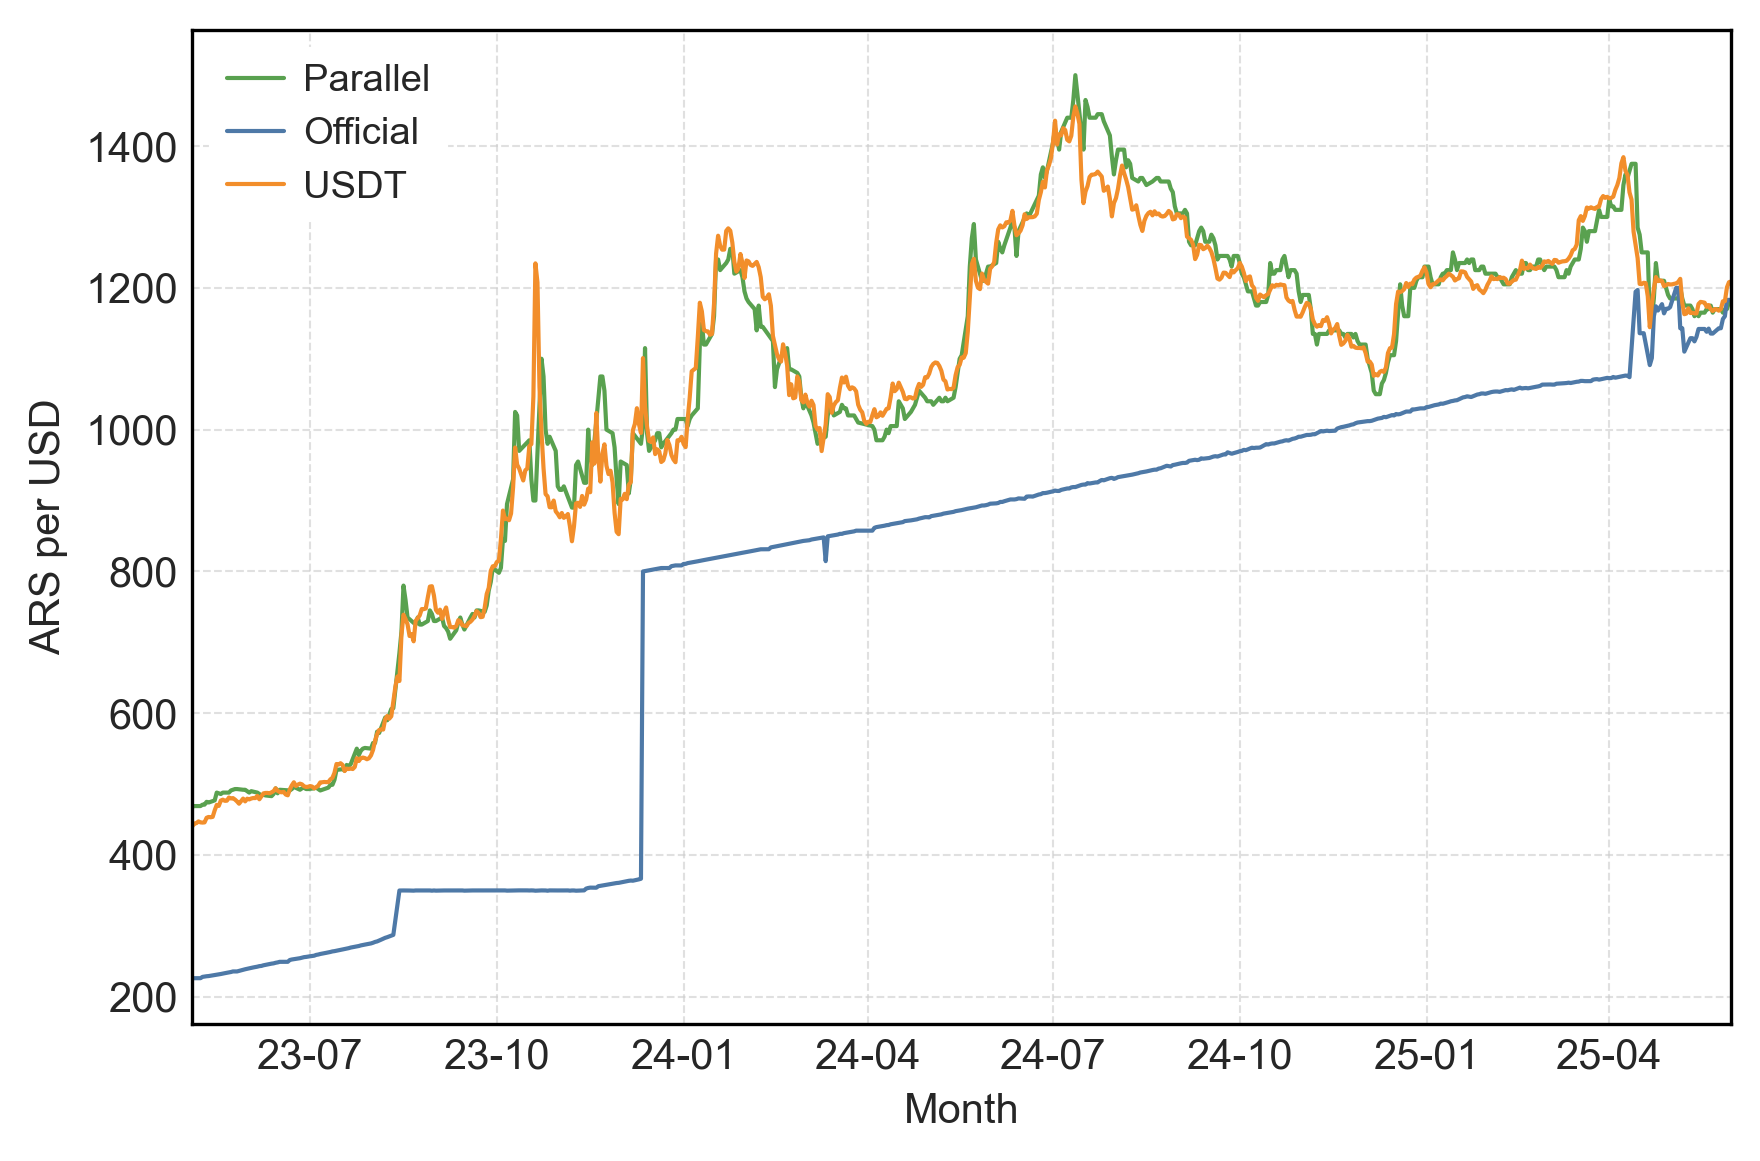

In [227]:
arg_df = full_df.copy()
arg_df = arg_df[['timestamp', 'USD_ARS_Parallel', 'USD_ARS_Official', 'USDT_ARS_TradingView']]
arg_df.set_index('timestamp', inplace=True)
arg_df['Parallel'] = arg_df['USD_ARS_Parallel'].apply(lambda x: x['sell_price'] if isinstance(x, dict) else None)
arg_df['Official'] = arg_df['USD_ARS_Official'].apply(lambda x: x['close'] if isinstance(x, dict) else None)
arg_df['USDT'] = arg_df['USDT_ARS_TradingView'].apply(lambda x: x['close'] if isinstance(x, dict) else None)
arg_df.drop(['USD_ARS_Parallel', 'USD_ARS_Official', 'USDT_ARS_TradingView'], axis=1, inplace=True)
arg_df = arg_df[arg_df.index > '2023-05-03']
arg_df = arg_df[arg_df.index < '2025-06-01']
arg_df[['Parallel', 'Official']] = arg_df[['Parallel', 'Official']].interpolate(method='time')

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

ax.plot(arg_df.index, arg_df['Parallel'], label='Parallel', linewidth=1, color='#59A14F')
ax.plot(arg_df.index, arg_df['Official'], label='Official', linewidth=1, color='#4E79A7')
ax.plot(arg_df.index, arg_df['USDT'], label='USDT', linewidth=1, color='#F28E2B')

# ax.yaxis.set_major_locator(ticker.MultipleLocator(1.5))

# X-axis: one tick every 3 months, formatted as YY-MM
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))

ax.set_ylabel('ARS per USD')
ax.set_xlabel('Month')
ax.margins(x=0, y=0.05)
ax.legend()
plt.tight_layout()

out_path = config.DATA_DIR / 'figures' / 'usd-ars-series.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')

plt.show()

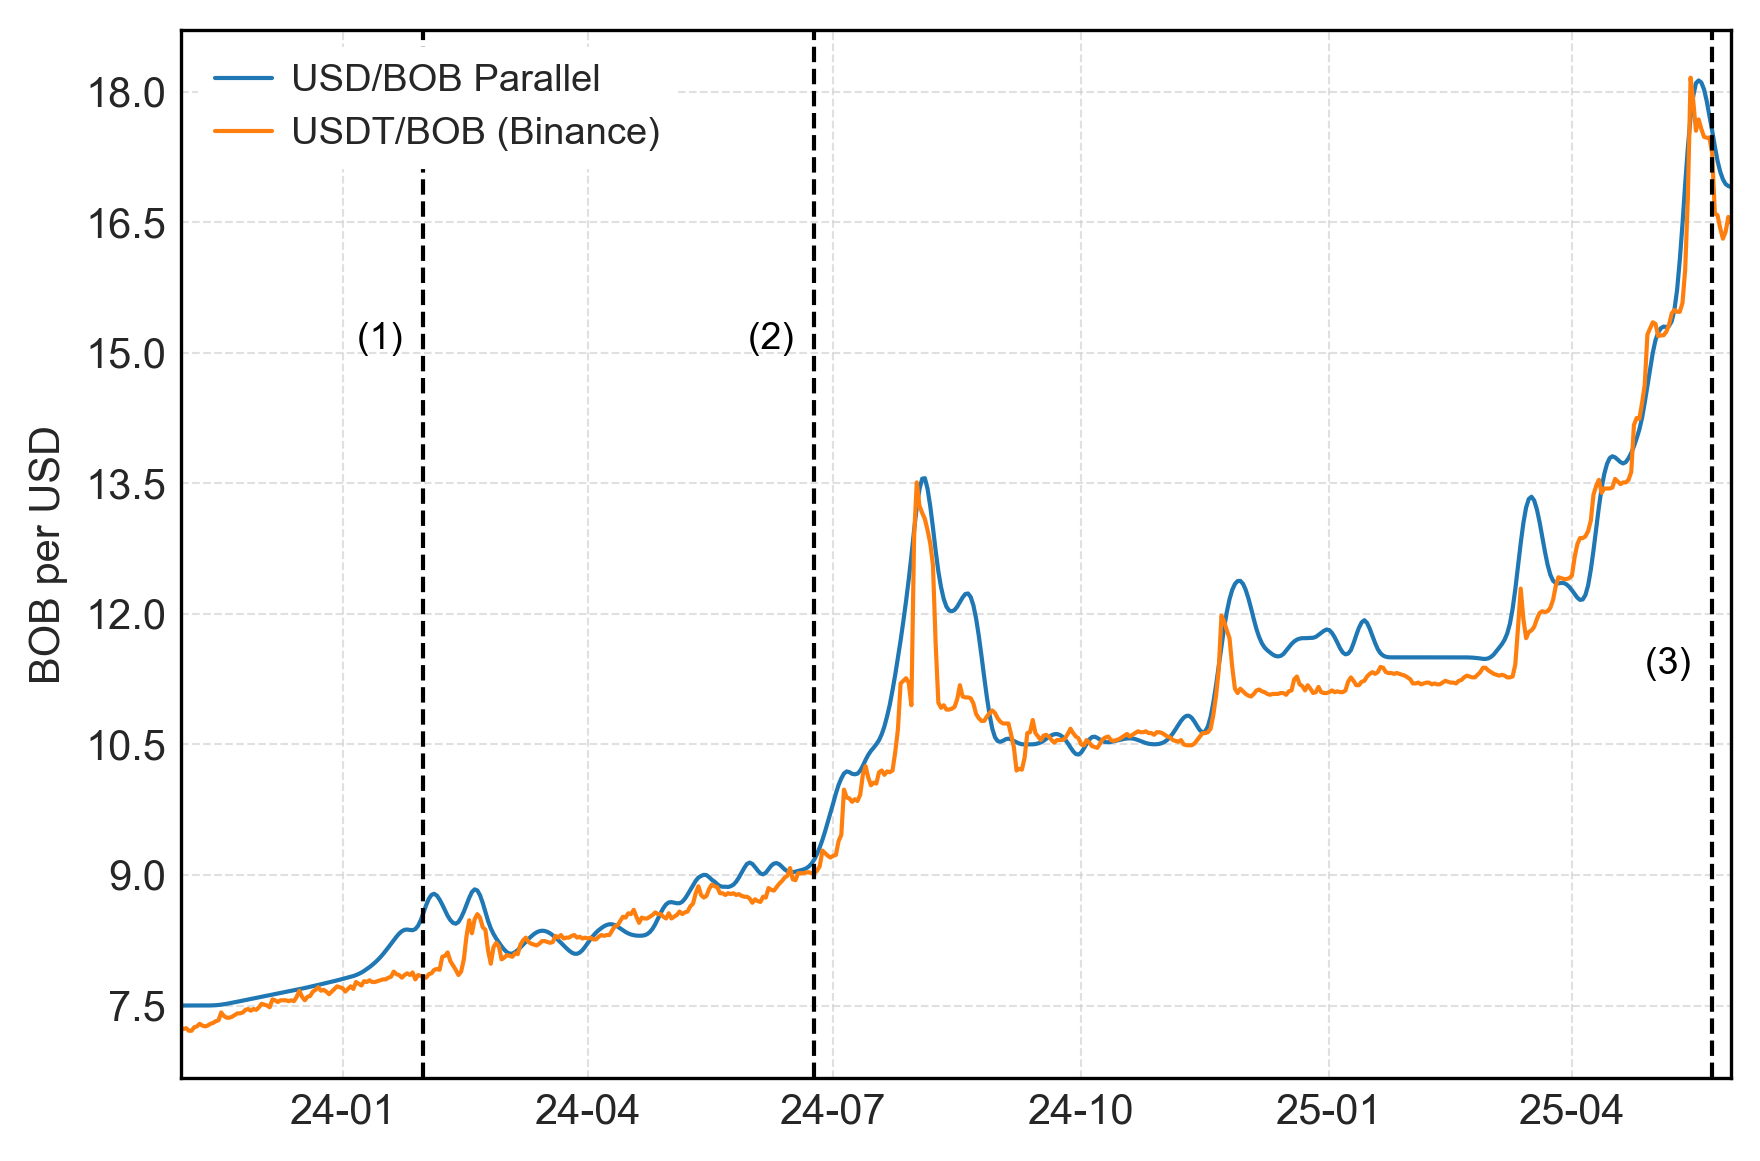

In [254]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
par_short = smoothed_curve[smoothed_curve.index > '2023-11-01']
cry_short = crypto_series[crypto_series.index > '2023-11-01']
ax.plot(par_short.index, par_short.values, label='USD/BOB Parallel', linewidth=1)
ax.plot(cry_short.index, cry_short.values, label='USDT/BOB (Binance)', linewidth=1)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.5))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
ax.set_ylabel('BOB per USD')
ax.margins(x=0, y=0.05)
y_top = ax.get_ylim()[1]
ax.axvline(x=pd.to_datetime('2024-01-31'), linestyle='--', color='black', linewidth=1)
ax.text(pd.to_datetime('2024-01-31'), y_top * 0.8, '(1)  ', ha='right', va='bottom', fontsize=9, color='k')
ax.axvline(x=pd.to_datetime('2024-06-24'), linestyle='--', color='black', linewidth=1)
ax.text(pd.to_datetime('2024-06-24'), y_top * 0.8, '(2)  ', ha='right', va='bottom', fontsize=9, color='k')
ax.axvline(x=pd.to_datetime('2025-05-23'), linestyle='--', color='black', linewidth=1)
ax.text(pd.to_datetime('2025-05-23'), y_top * 0.6, '(3)  ', ha='right', va='bottom', fontsize=9, color='k')

ax.legend(loc='upper left')
plt.tight_layout()

out_path = config.DATA_DIR / 'figures' / 'event_analysis.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')

plt.show()